In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Function for a quick glance
class Data_glance():
    def __init__(self, df, col):
        self.df = df
        self.col = col

    def g_unique(self):
        print("Unique Values: {}\n".format(self.df[self.col].unique()))

    def g_val_cnt(self):
        print("Value counts:\n{}\n".format(self.df[self.col].value_counts()))

    def g_hist(self):
        plt.rcParams['figure.figsize'] = (40,20)
        self.df[self.col].value_counts().plot(kind='bar')


In [3]:
# Numeric variable -> outlier inspection
def g_box(df, col):
    ax = sns.boxplot(y=col, data=df)
    #ax = sns.swarmplot(y=col, data=df, color=".25")

#### Data Loading: __CustomerDemographic__

In [4]:
custdemo = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic', 
                             skiprows = 1, header=0)
custdemo_bk = custdemo.copy()
custdemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


#### Data Loading: __transactions__

In [5]:
transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions', 
                             skiprows = 1, header=0)
transactions_bk = transactions.copy()
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


#### Data Loading: CustomerAddress

In [6]:
custadd = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress', 
                             skiprows = 1, header=0)
custadd_bk = custadd.copy()
custadd.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


---

# Data Cleaning

__1. CustomerDemographic__

In [7]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [8]:
custdemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

### * Drop the columns which we don't need in further analysis

In [9]:
# These columns are overwhelming to further analysis. I want to deliver precise and tidy result.
drop_col = ['first_name', 'last_name', 'job_title', 'default']
custdemo.drop(drop_col, axis = 1, inplace=True)

In [10]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   gender                               4000 non-null   object        
 2   past_3_years_bike_related_purchases  4000 non-null   int64         
 3   DOB                                  3913 non-null   datetime64[ns]
 4   job_industry_category                3344 non-null   object        
 5   wealth_segment                       4000 non-null   object        
 6   deceased_indicator                   4000 non-null   object        
 7   owns_car                             4000 non-null   object        
 8   tenure                               3913 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 281.4+ KB


### * Drop the rows which contain too many missing values

In [11]:
# I find out that when the row which missing DOB also lose tenure. I will drop it all since it only be 2.175% of the whole data
custdemo.query('DOB != DOB and tenure != tenure')

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,U,71,NaT,IT,Mass Customer,N,No,NaN
167,168,U,8,NaT,IT,Affluent Customer,N,Yes,NaN
266,267,U,53,NaT,IT,High Net Worth,N,No,NaN
289,290,U,42,NaT,IT,Mass Customer,N,No,NaN
450,451,U,37,NaT,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...
3778,3779,U,68,NaT,IT,Affluent Customer,N,No,NaN
3882,3883,U,35,NaT,IT,Mass Customer,N,No,NaN
3930,3931,U,19,NaT,IT,High Net Worth,N,Yes,NaN
3934,3935,U,72,NaT,IT,High Net Worth,N,Yes,NaN


In [12]:
# Missing values percentage
custdemo.DOB.isnull().sum() / (len(custdemo.DOB)) * 100

2.175

In [13]:
drop_row_index = custdemo.query('DOB != DOB and tenure != tenure').index.tolist()
custdemo.drop(custdemo.index[drop_row_index], inplace = True)

In [14]:
custdemo.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64

### * Assign Label "Unspecified" to null values in job_industry_category

In [15]:
custdemo.job_industry_category.fillna('Unspecified', inplace = True)

In [16]:
custdemo.job_industry_category.unique()

array(['Health', 'Financial Services', 'Property', 'IT', 'Unspecified',
       'Retail', 'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [17]:
custdemo.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

---

After handling missing values, let us dive into each column and inspect values.

__1. Gender__

In [18]:
custdemo.gender.value_counts()

Female    2037
Male      1872
F            1
Femal        1
M            1
U            1
Name: gender, dtype: int64

In [19]:
# Convert F & Femal to Female. And M to Male
custdemo.gender.replace(
    to_replace=['F', 'Femal'],
    value='Female',
    inplace=True
)

In [20]:
custdemo.gender.replace(
    to_replace='M',
    value='Male',
    inplace=True
)

In [21]:
custdemo.gender.value_counts()

Female    2039
Male      1873
U            1
Name: gender, dtype: int64

In [22]:
# The only 'U' label's name is Jephthah. It is a male name. Then, I will replace 'U' by "Male"
custdemo_bk.query("gender=='U' and tenure == tenure")

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0


In [23]:
custdemo.gender.replace(
    to_replace='U',
    value='Male',
    inplace=True
)

In [24]:
custdemo.gender.value_counts()

Female    2039
Male      1874
Name: gender, dtype: int64

__2. past_3_years_bike_related_purchases__

In [25]:
custdemo.past_3_years_bike_related_purchases.describe()

count    3913.000000
mean       49.041912
std        28.764990
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

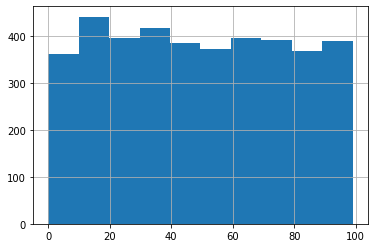

In [26]:
custdemo.past_3_years_bike_related_purchases.hist()

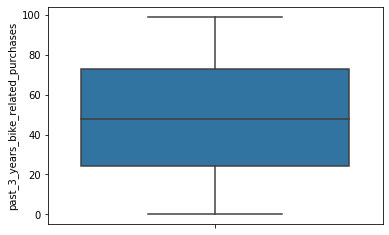

In [27]:
g_box(custdemo,'past_3_years_bike_related_purchases')

__3. DOB__

In [28]:
custdemo.DOB.describe()

count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

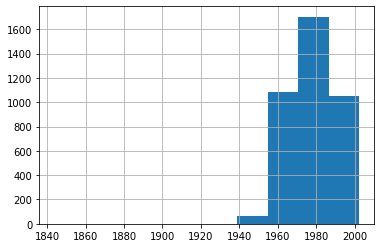

In [29]:
custdemo.DOB.hist()

#### Create a new age group column base on the last transations date minus DOB

<img src='age_group.png'>

In [30]:
tran_max = transactions.transaction_date.max()

In [31]:
custdemo['age'] = [(tran_max.year - x.year - ((tran_max.month, tran_max.day) < (x.month, x.day))) for x in custdemo.DOB]

In [32]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   gender                               3913 non-null   object        
 2   past_3_years_bike_related_purchases  3913 non-null   int64         
 3   DOB                                  3913 non-null   datetime64[ns]
 4   job_industry_category                3913 non-null   object        
 5   wealth_segment                       3913 non-null   object        
 6   deceased_indicator                   3913 non-null   object        
 7   owns_car                             3913 non-null   object        
 8   tenure                               3913 non-null   float64       
 9   age                                  3913 non-null   int64         
dtypes: datetime6

In [33]:
bins = [0, 16, 30, 45, 1000]
custdemo['age_group'] = pd.cut(custdemo['age'], bins)
labels = ["Child", "Young Adults", "Middle-aged Adults", "Old-aged Adults"]
custdemo['age_group'] = pd.cut(custdemo['age'], bins=bins, labels=labels)

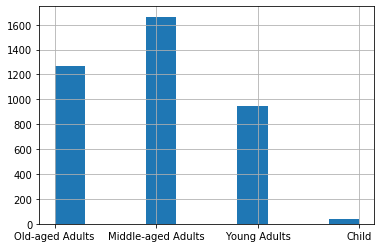

In [34]:
custdemo.age_group.hist()

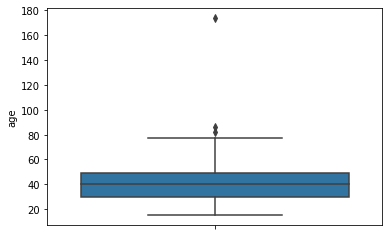

In [35]:
# 3 outliers 
g_box(custdemo, 'age')

__4. job_industry_category__

In [36]:
custdemo.job_industry_category.unique()

array(['Health', 'Financial Services', 'Property', 'IT', 'Unspecified',
       'Retail', 'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [37]:
custdemo.job_industry_category.value_counts()

Manufacturing         796
Financial Services    767
Unspecified           656
Health                596
Retail                358
Property              267
IT                    152
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

__5. wealth_segment__

Unique Values: ['Mass Customer' 'Affluent Customer' 'High Net Worth']

Value counts:
Mass Customer        1954
High Net Worth        996
Affluent Customer     963
Name: wealth_segment, dtype: int64



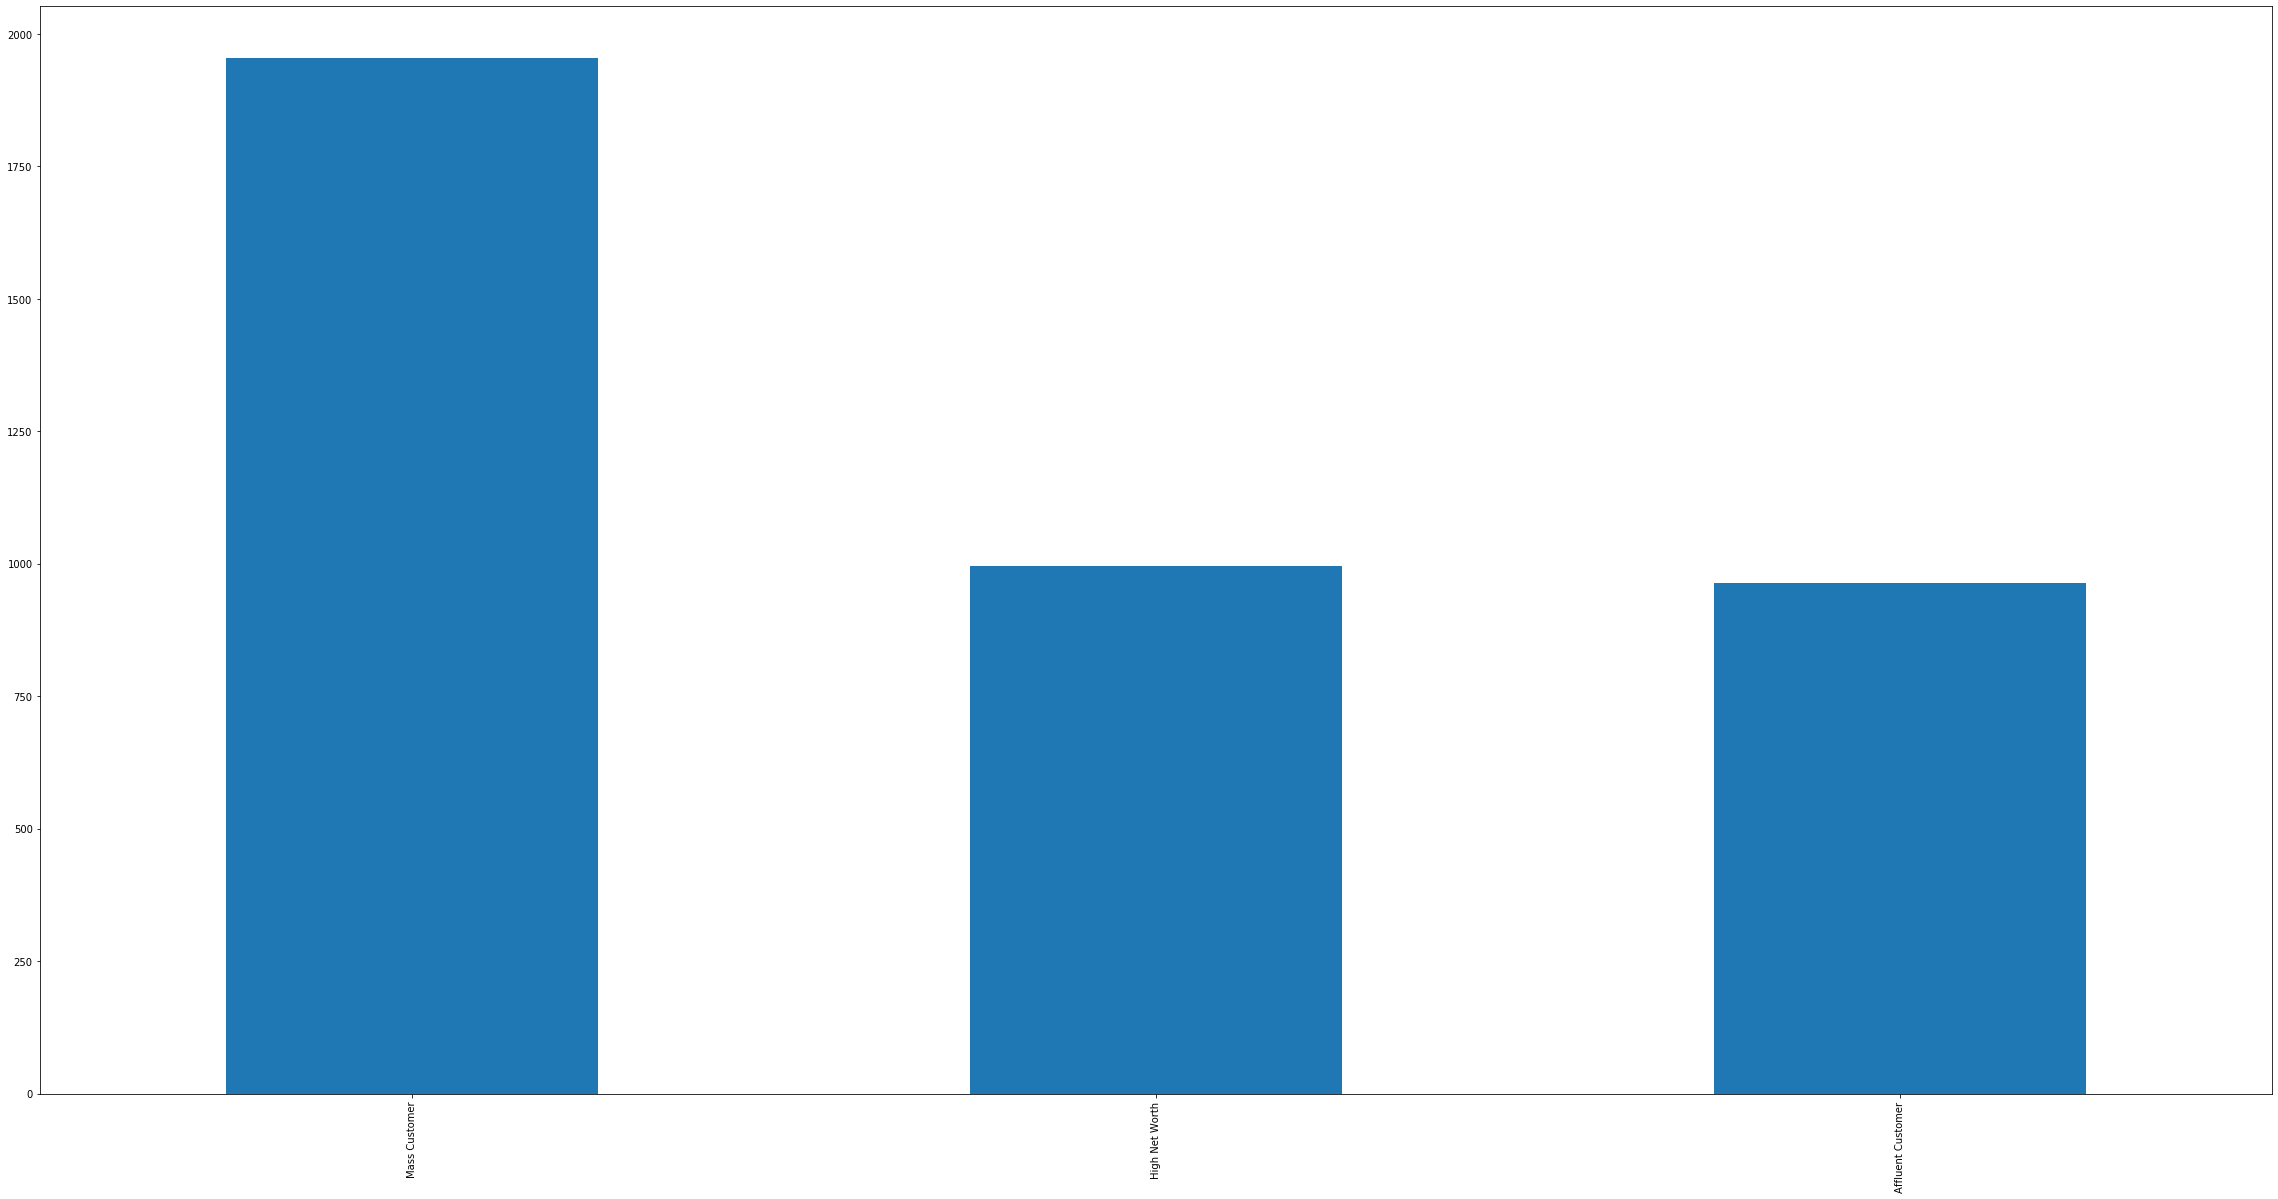

In [38]:
w_s = Data_glance(custdemo, 'wealth_segment')
public_method_names = [method for method in dir(w_s) if callable(getattr(w_s, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(w_s, method)()  # call

__6. deceased_indicator__

Unique Values: ['N' 'Y']

Value counts:
N    3911
Y       2
Name: deceased_indicator, dtype: int64



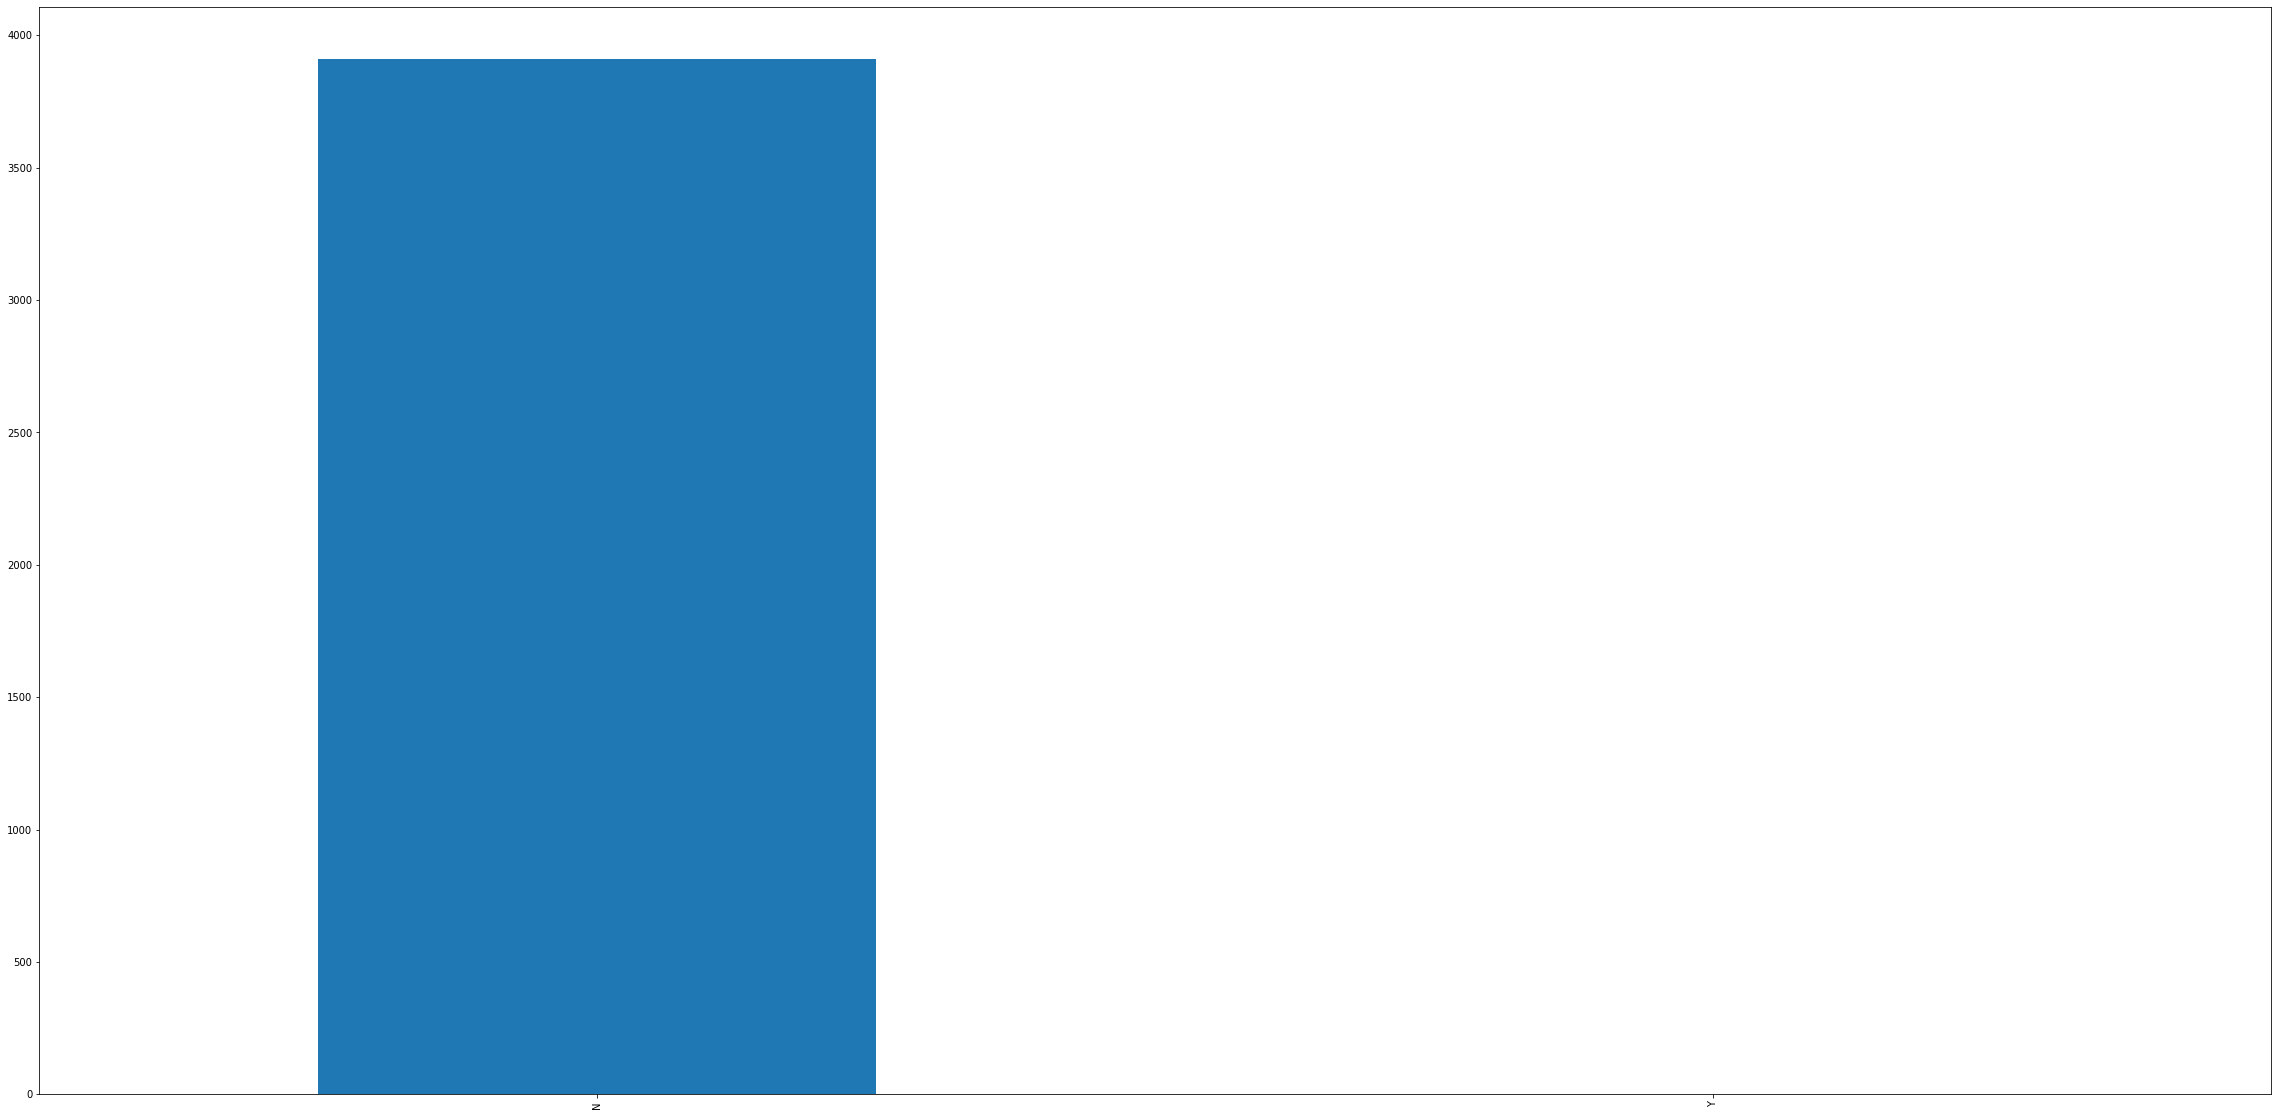

In [39]:
d_i = Data_glance(custdemo, 'deceased_indicator')
public_method_names = [method for method in dir(d_i) if callable(getattr(d_i, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(d_i, method)()  # call

__7. owns_car__

Unique Values: ['Yes' 'No']

Value counts:
Yes    1974
No     1939
Name: owns_car, dtype: int64



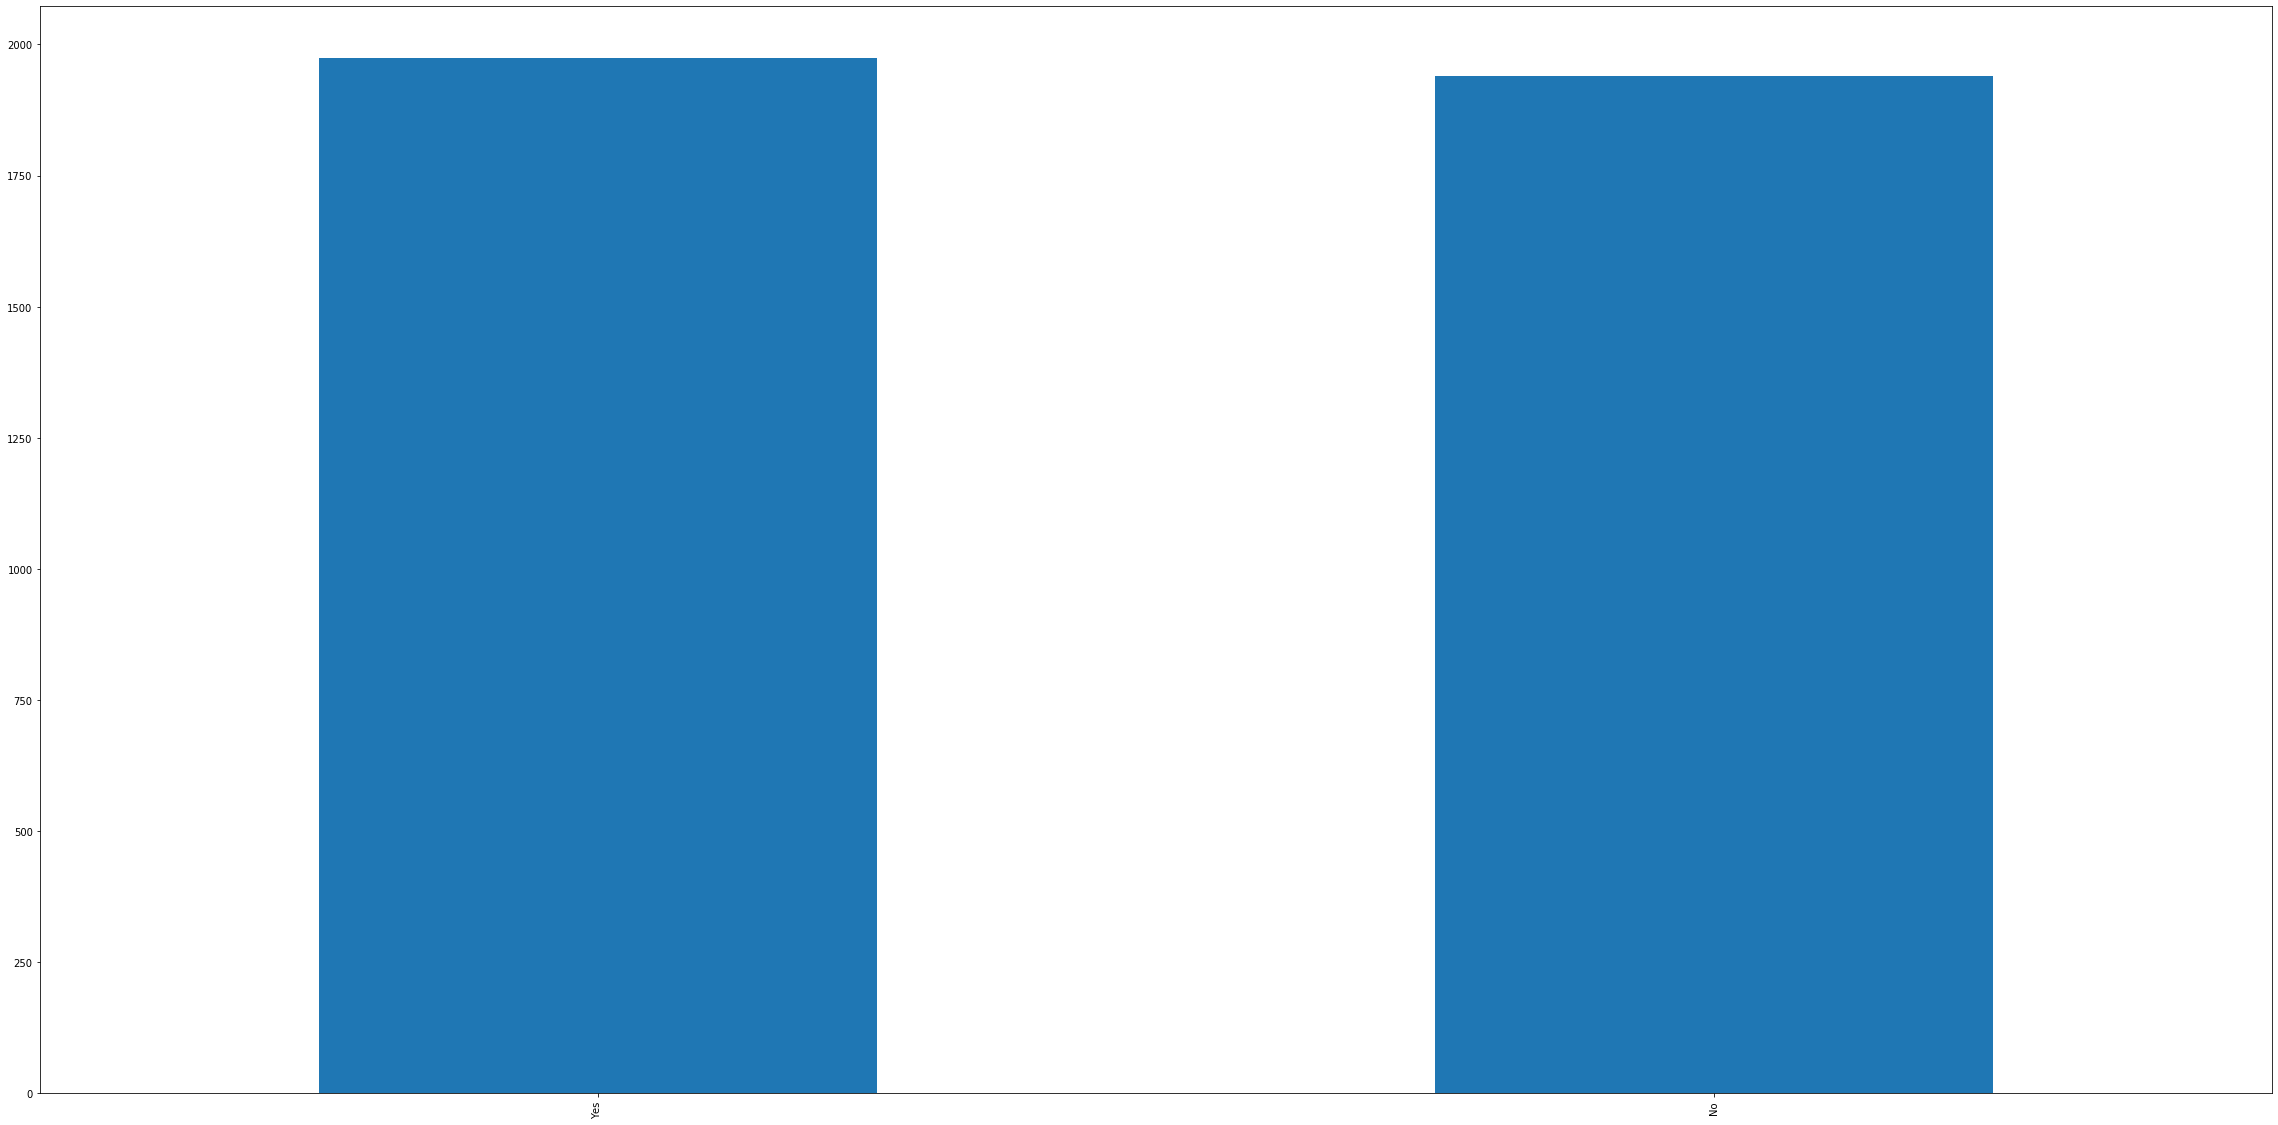

In [40]:
o_c = Data_glance(custdemo, 'owns_car')
public_method_names = [method for method in dir(o_c) if callable(getattr(o_c, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(o_c, method)()  # call

__8. tenure__

Unique Values: [11. 16. 15.  7.  8. 13. 20.  9.  6.  1. 18. 21. 12. 19. 14.  4. 22.  5.
 17.  2.  3. 10.]

Value counts:
7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64



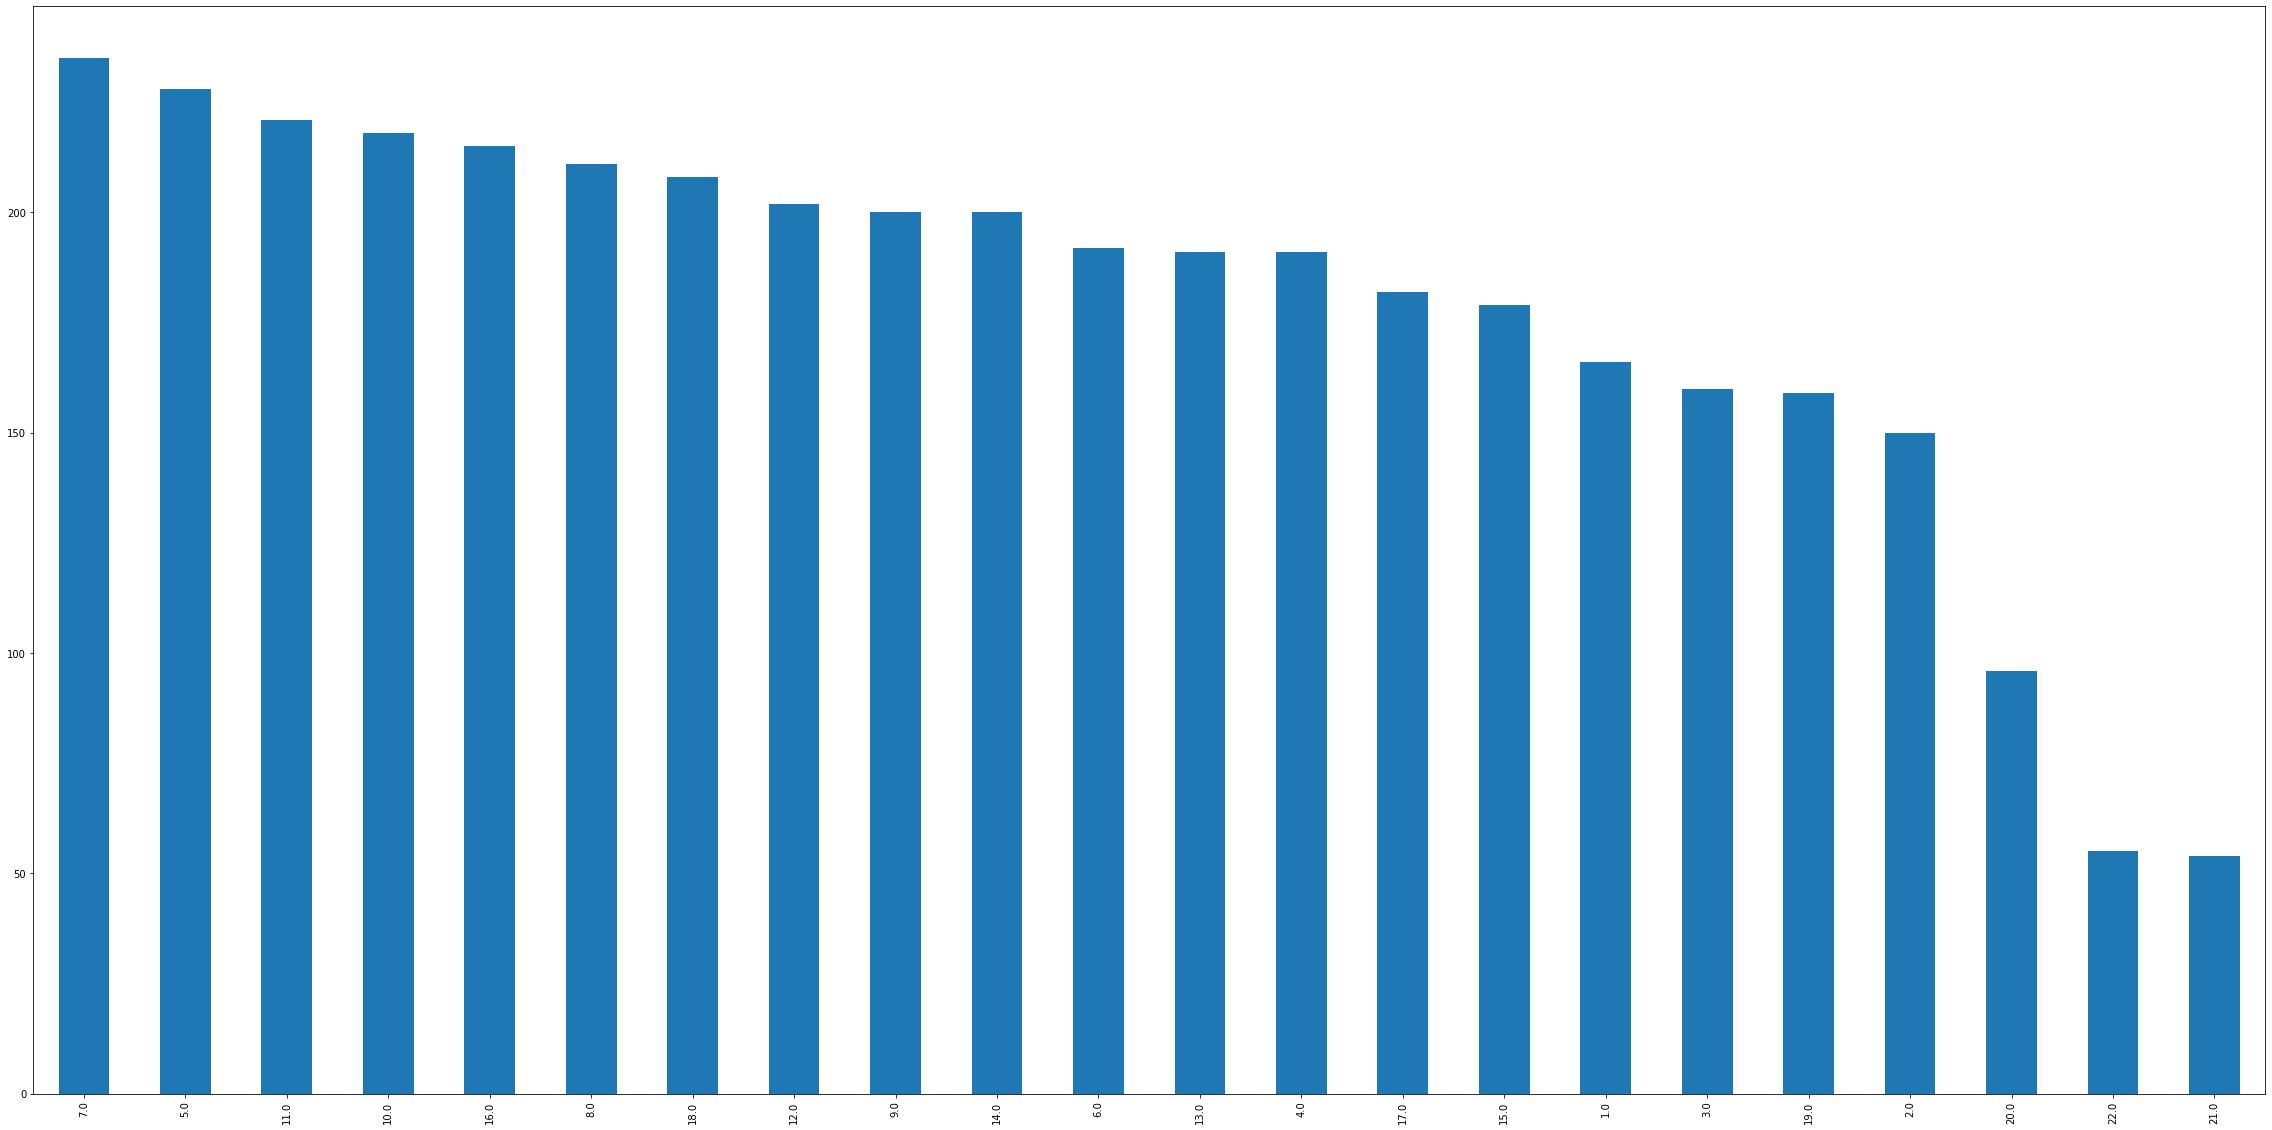

In [41]:
tenure = Data_glance(custdemo, 'tenure')
public_method_names = [method for method in dir(tenure) if callable(getattr(tenure, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(tenure, method)()  # call

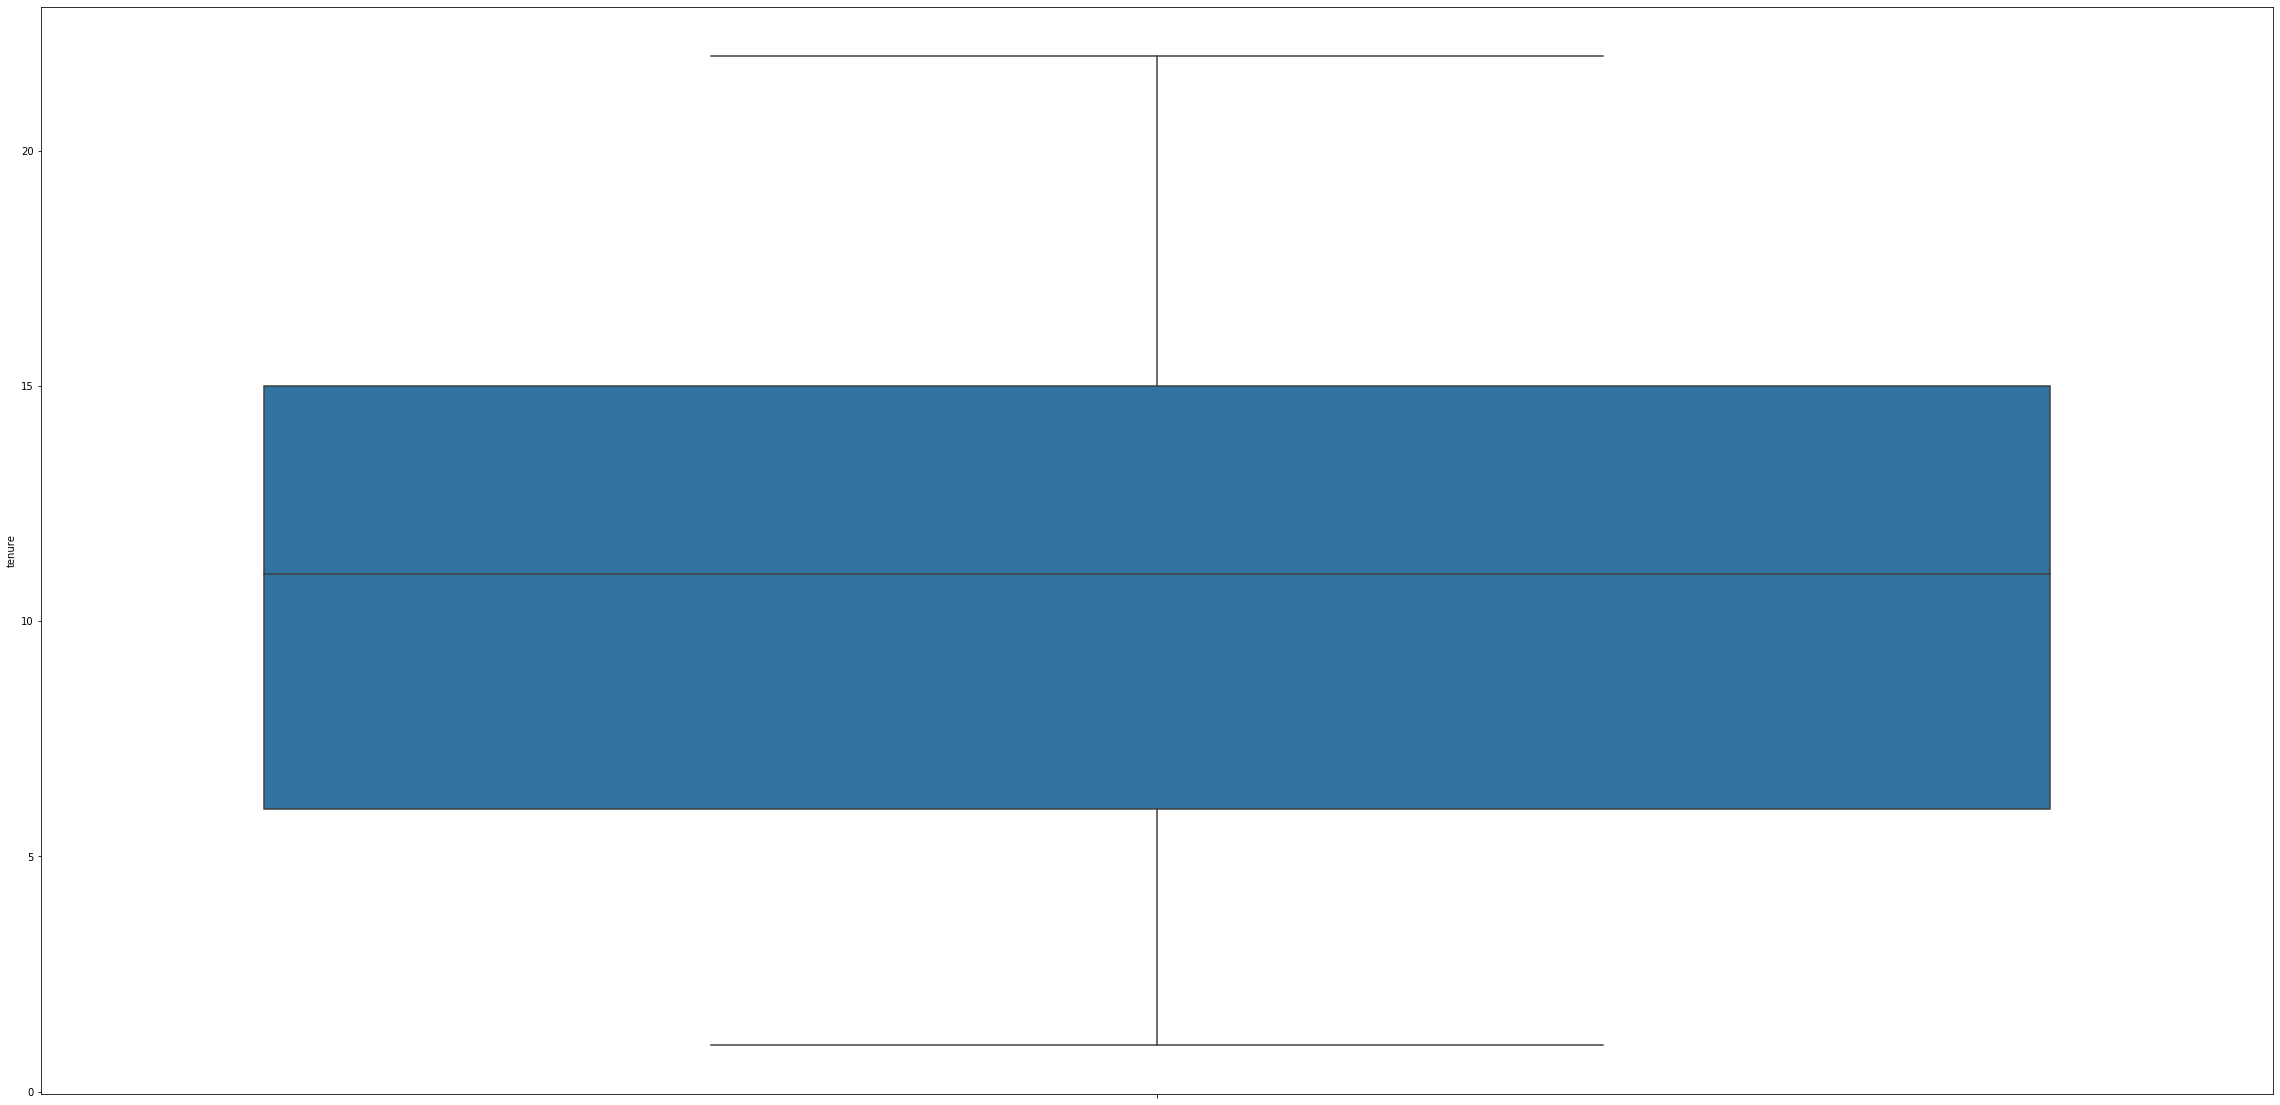

In [42]:
# Outliers inspection
g_box(custdemo, 'tenure')

In [43]:
custdemo.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
age_group                              0
dtype: int64

In [44]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   gender                               3913 non-null   object        
 2   past_3_years_bike_related_purchases  3913 non-null   int64         
 3   DOB                                  3913 non-null   datetime64[ns]
 4   job_industry_category                3913 non-null   object        
 5   wealth_segment                       3913 non-null   object        
 6   deceased_indicator                   3913 non-null   object        
 7   owns_car                             3913 non-null   object        
 8   tenure                               3913 non-null   float64       
 9   age                                  3913 non-null   int64         
 10  age_group   

In [45]:
custdemo.describe(include='all')

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
count,3913.000000,3913,3913.000000,3913,3913,3913,3913,3913,3913.000000,3913.000000,3913
unique,NaN,2,NaN,3448,10,3,2,2,NaN,NaN,4
top,NaN,Female,NaN,1978-01-30 00:00:00,Manufacturing,Mass Customer,N,Yes,NaN,NaN,Middle-aged Adults
freq,NaN,2039,NaN,7,796,1954,3911,1974,NaN,NaN,1664
first,NaN,NaN,NaN,1843-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1999.325837,NaN,49.041912,NaN,NaN,NaN,NaN,NaN,10.657041,39.967033,NaN
std,1155.183301,NaN,28.764990,NaN,NaN,NaN,NaN,NaN,5.660146,12.794474,NaN
min,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,15.000000,NaN
25%,1002.000000,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,6.000000,30.000000,NaN


---

# Data Cleaning

__2. CustomerAddress__

In [46]:
custadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [47]:
custadd.describe(include='all')

,customer_id,address,postcode,state,country,property_valuation
count,3999.000000,3999,3999.000000,3999,3999,3999.000000
unique,NaN,3996,NaN,5,1,NaN
top,NaN,64 Macpherson Junction,NaN,NSW,Australia,NaN
freq,NaN,2,NaN,2054,3999,NaN
mean,2003.987997,NaN,2985.755939,NaN,NaN,7.514379
std,1154.576912,NaN,844.878364,NaN,NaN,2.824663
min,1.000000,NaN,2000.000000,NaN,NaN,1.000000
25%,1004.500000,NaN,2200.000000,NaN,NaN,6.000000
50%,2004.000000,NaN,2768.000000,NaN,NaN,8.000000
75%,3003.500000,NaN,3750.000000,NaN,NaN,10.000000


__1. customer_id__

* Drop the ids which is not in customer demographic

In [48]:
custid_main = custdemo.customer_id.unique().tolist()
custid_add = custadd.customer_id.unique().tolist()
dropid = [x for x in custid_add if x not in custid_main]
dropid

[144,
 168,
 267,
 290,
 451,
 453,
 454,
 480,
 513,
 526,
 548,
 582,
 599,
 680,
 685,
 799,
 839,
 883,
 892,
 950,
 975,
 983,
 996,
 1038,
 1044,
 1082,
 1174,
 1210,
 1244,
 1351,
 1477,
 1509,
 1583,
 1628,
 1683,
 1740,
 1773,
 1780,
 1806,
 1918,
 1938,
 1990,
 2000,
 2021,
 2069,
 2165,
 2205,
 2252,
 2295,
 2335,
 2341,
 2414,
 2426,
 2469,
 2540,
 2642,
 2647,
 2696,
 2697,
 2854,
 2920,
 2963,
 2999,
 3012,
 3086,
 3151,
 3222,
 3223,
 3255,
 3288,
 3298,
 3312,
 3322,
 3343,
 3365,
 3473,
 3510,
 3513,
 3565,
 3654,
 3718,
 3727,
 3779,
 3883,
 3931,
 3935,
 3998,
 4001,
 4002,
 4003]

In [49]:
custadd = custadd[~custadd.customer_id.isin(dropid)]

In [50]:
custadd.customer_id.describe()

count    3909.000000
mean     2001.356869
std      1154.026797
min         1.000000
25%      1005.000000
50%      2002.000000
75%      2998.000000
max      4000.000000
Name: customer_id, dtype: float64

__2. address__

Drop this column

In [51]:
custadd.drop('address', axis=1, inplace=True)
custadd

,customer_id,postcode,state,country,property_valuation
0,1,2016,New South Wales,Australia,10
1,2,2153,New South Wales,Australia,10
2,4,4211,QLD,Australia,9
3,5,2448,New South Wales,Australia,4
4,6,3216,VIC,Australia,9
...,...,...,...,...,...
3990,3995,2088,NSW,Australia,12
3991,3996,3977,VIC,Australia,6
3992,3997,2350,NSW,Australia,2
3994,3999,3064,VIC,Australia,3


__3. state__

Unique Values: ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']

Value counts:
NSW                2004
VIC                 919
QLD                 822
New South Wales      85
Victoria             79
Name: state, dtype: int64



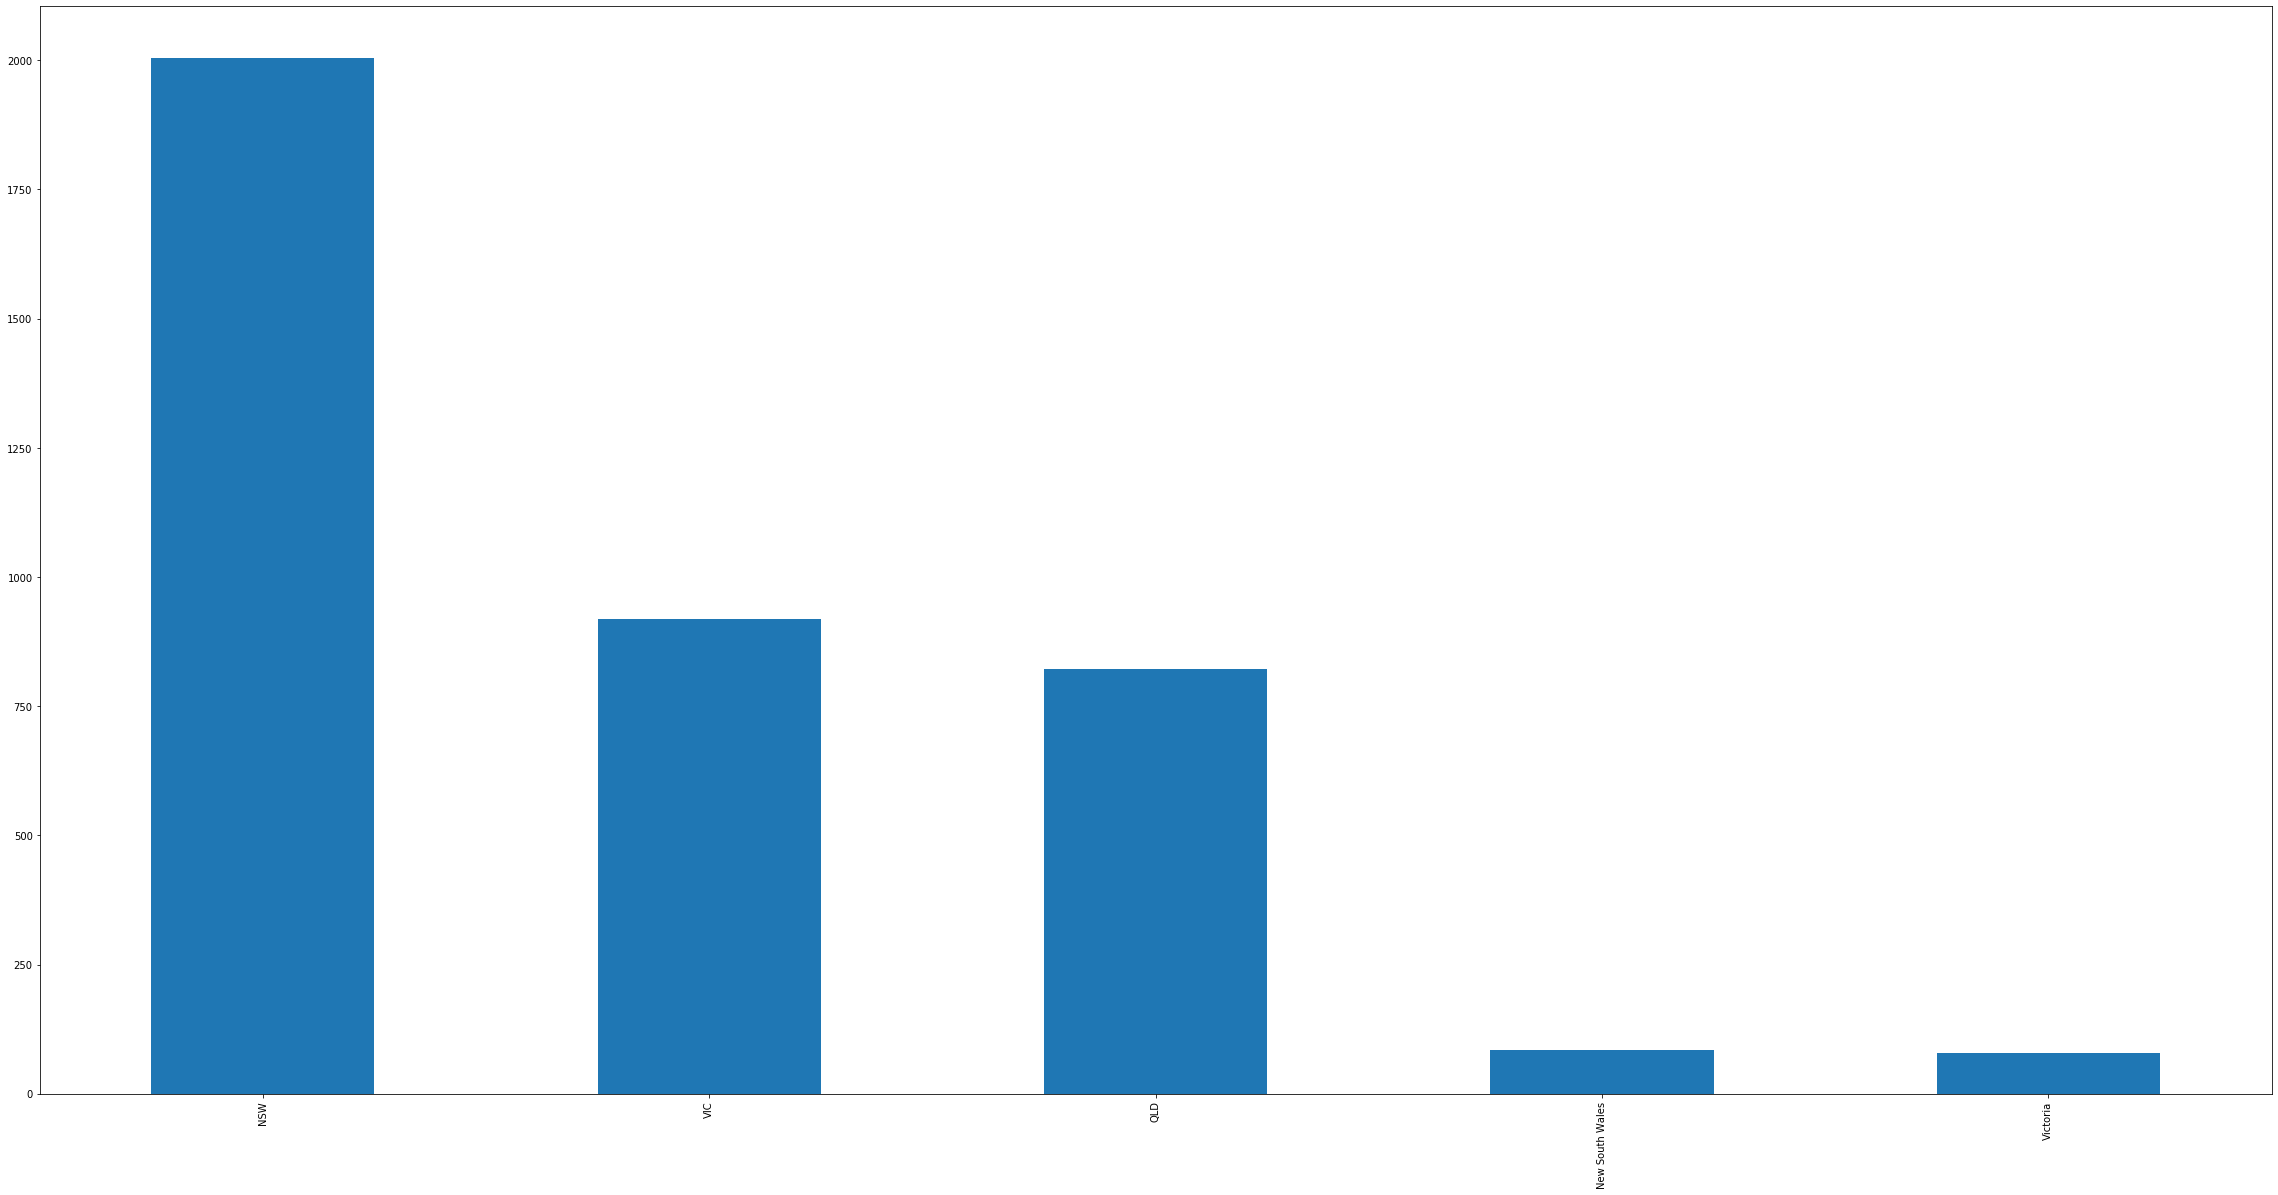

In [52]:
state = Data_glance(custadd, 'state')
public_method_names = [method for method in dir(state) if callable(getattr(state, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(state, method)()  # call

Convert Victoria to VIC and New South Wales to NSW

In [53]:
# Convert Victoria to VIC. And New South Wales to NSW
custadd.state.replace(
    to_replace='Victoria',
    value='VIC',
    inplace=True
)

custadd.state.replace(
    to_replace='New South Wales',
    value='NSW',
    inplace=True
)

Unique Values: ['NSW' 'QLD' 'VIC']

Value counts:
NSW    2089
VIC     998
QLD     822
Name: state, dtype: int64



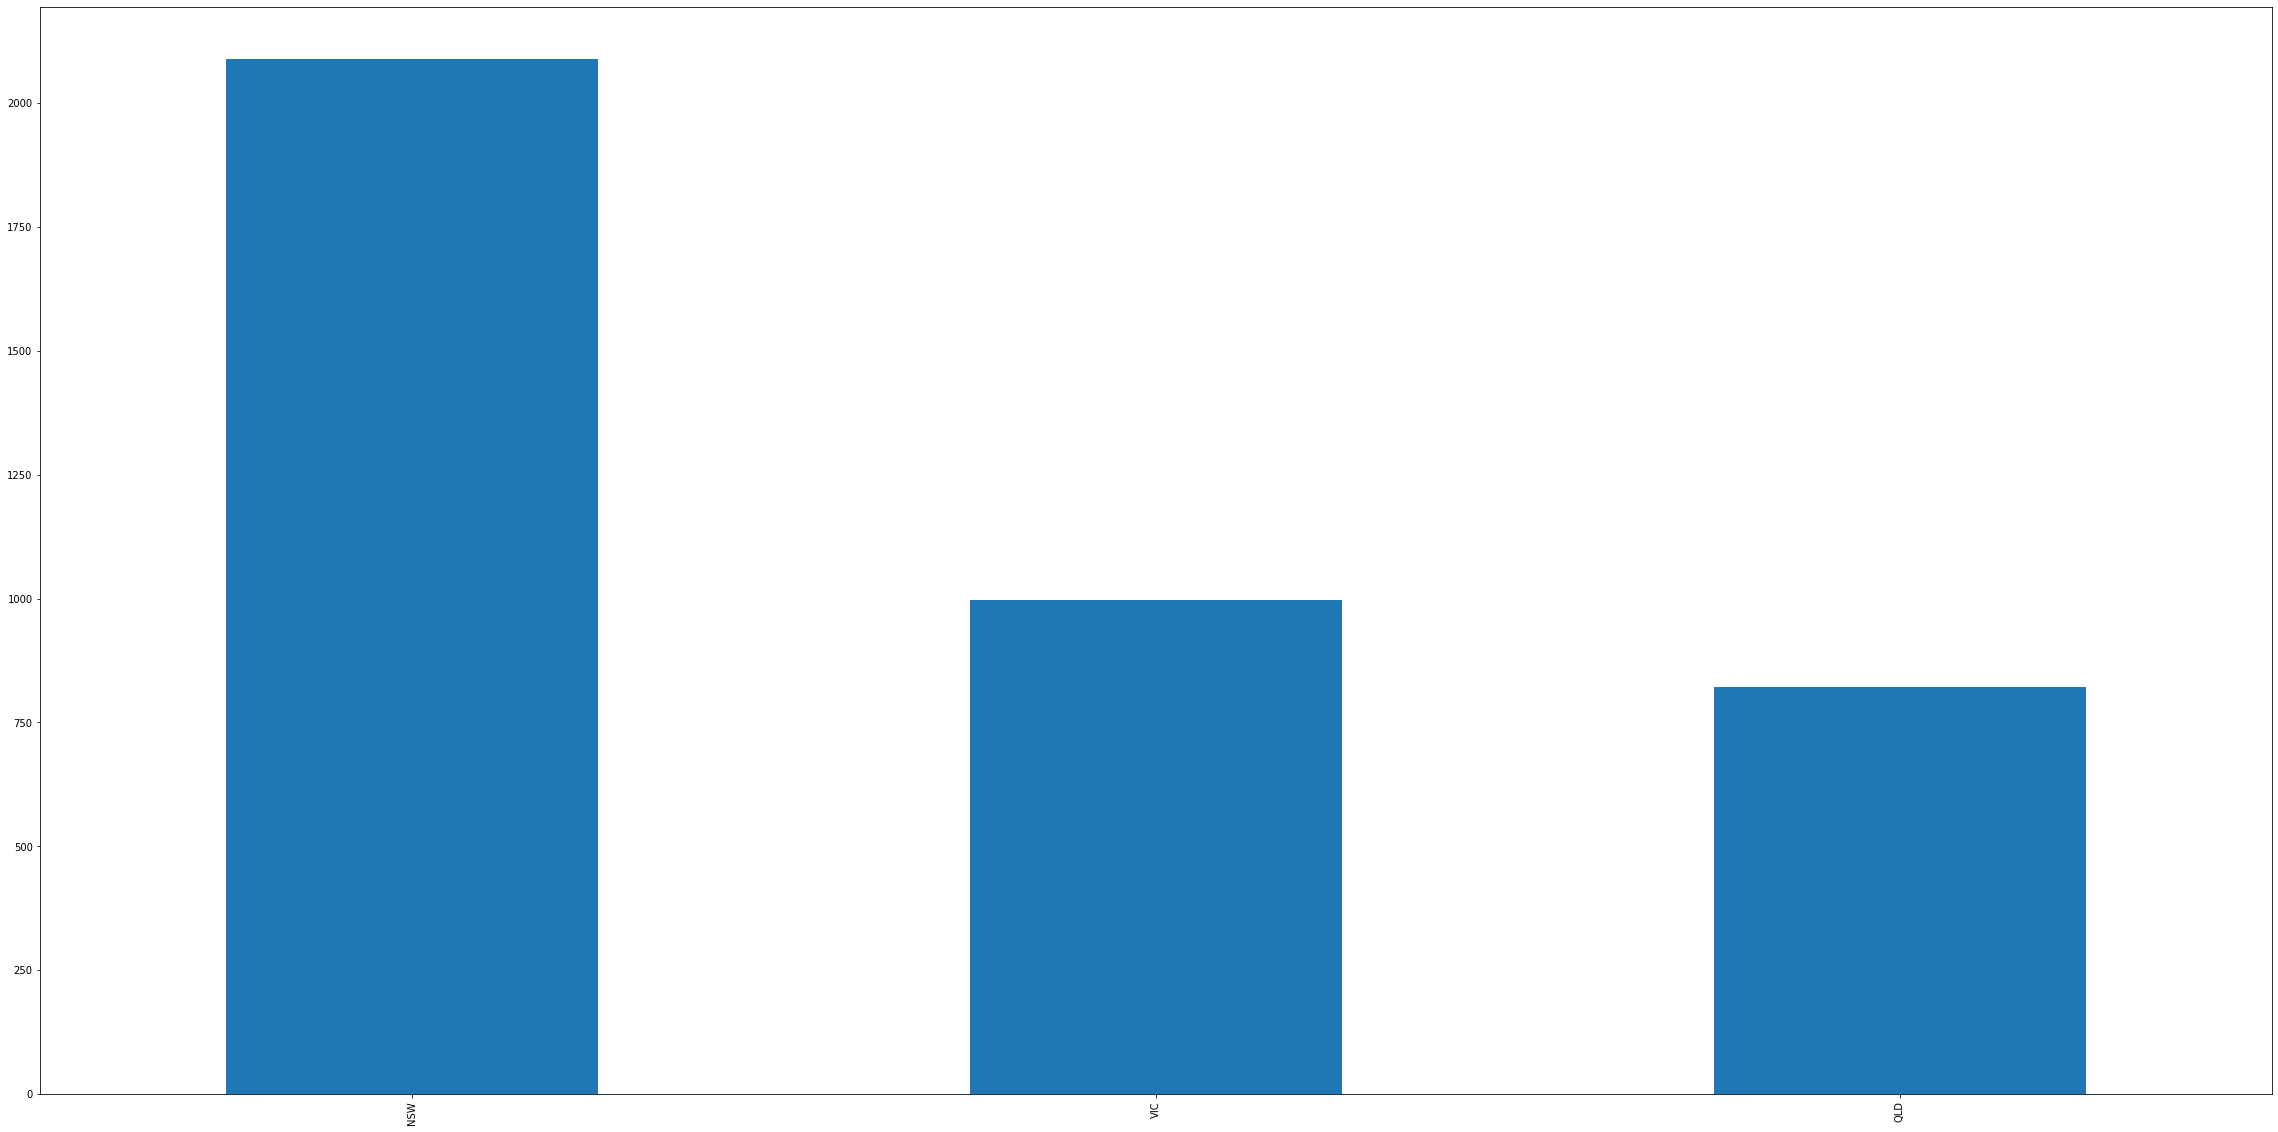

In [54]:
state = Data_glance(custadd, 'state')
public_method_names = [method for method in dir(state) if callable(getattr(state, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(state, method)()  # call

__4. postcode__

Convert postcode to object datatype

In [55]:
custadd.postcode = custadd.postcode.astype(object)

In [56]:
custadd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3995
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3909 non-null   int64 
 1   postcode            3909 non-null   object
 2   state               3909 non-null   object
 3   country             3909 non-null   object
 4   property_valuation  3909 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 183.2+ KB


__5. country__

Unique Values: ['Australia']

Value counts:
Australia    3909
Name: country, dtype: int64



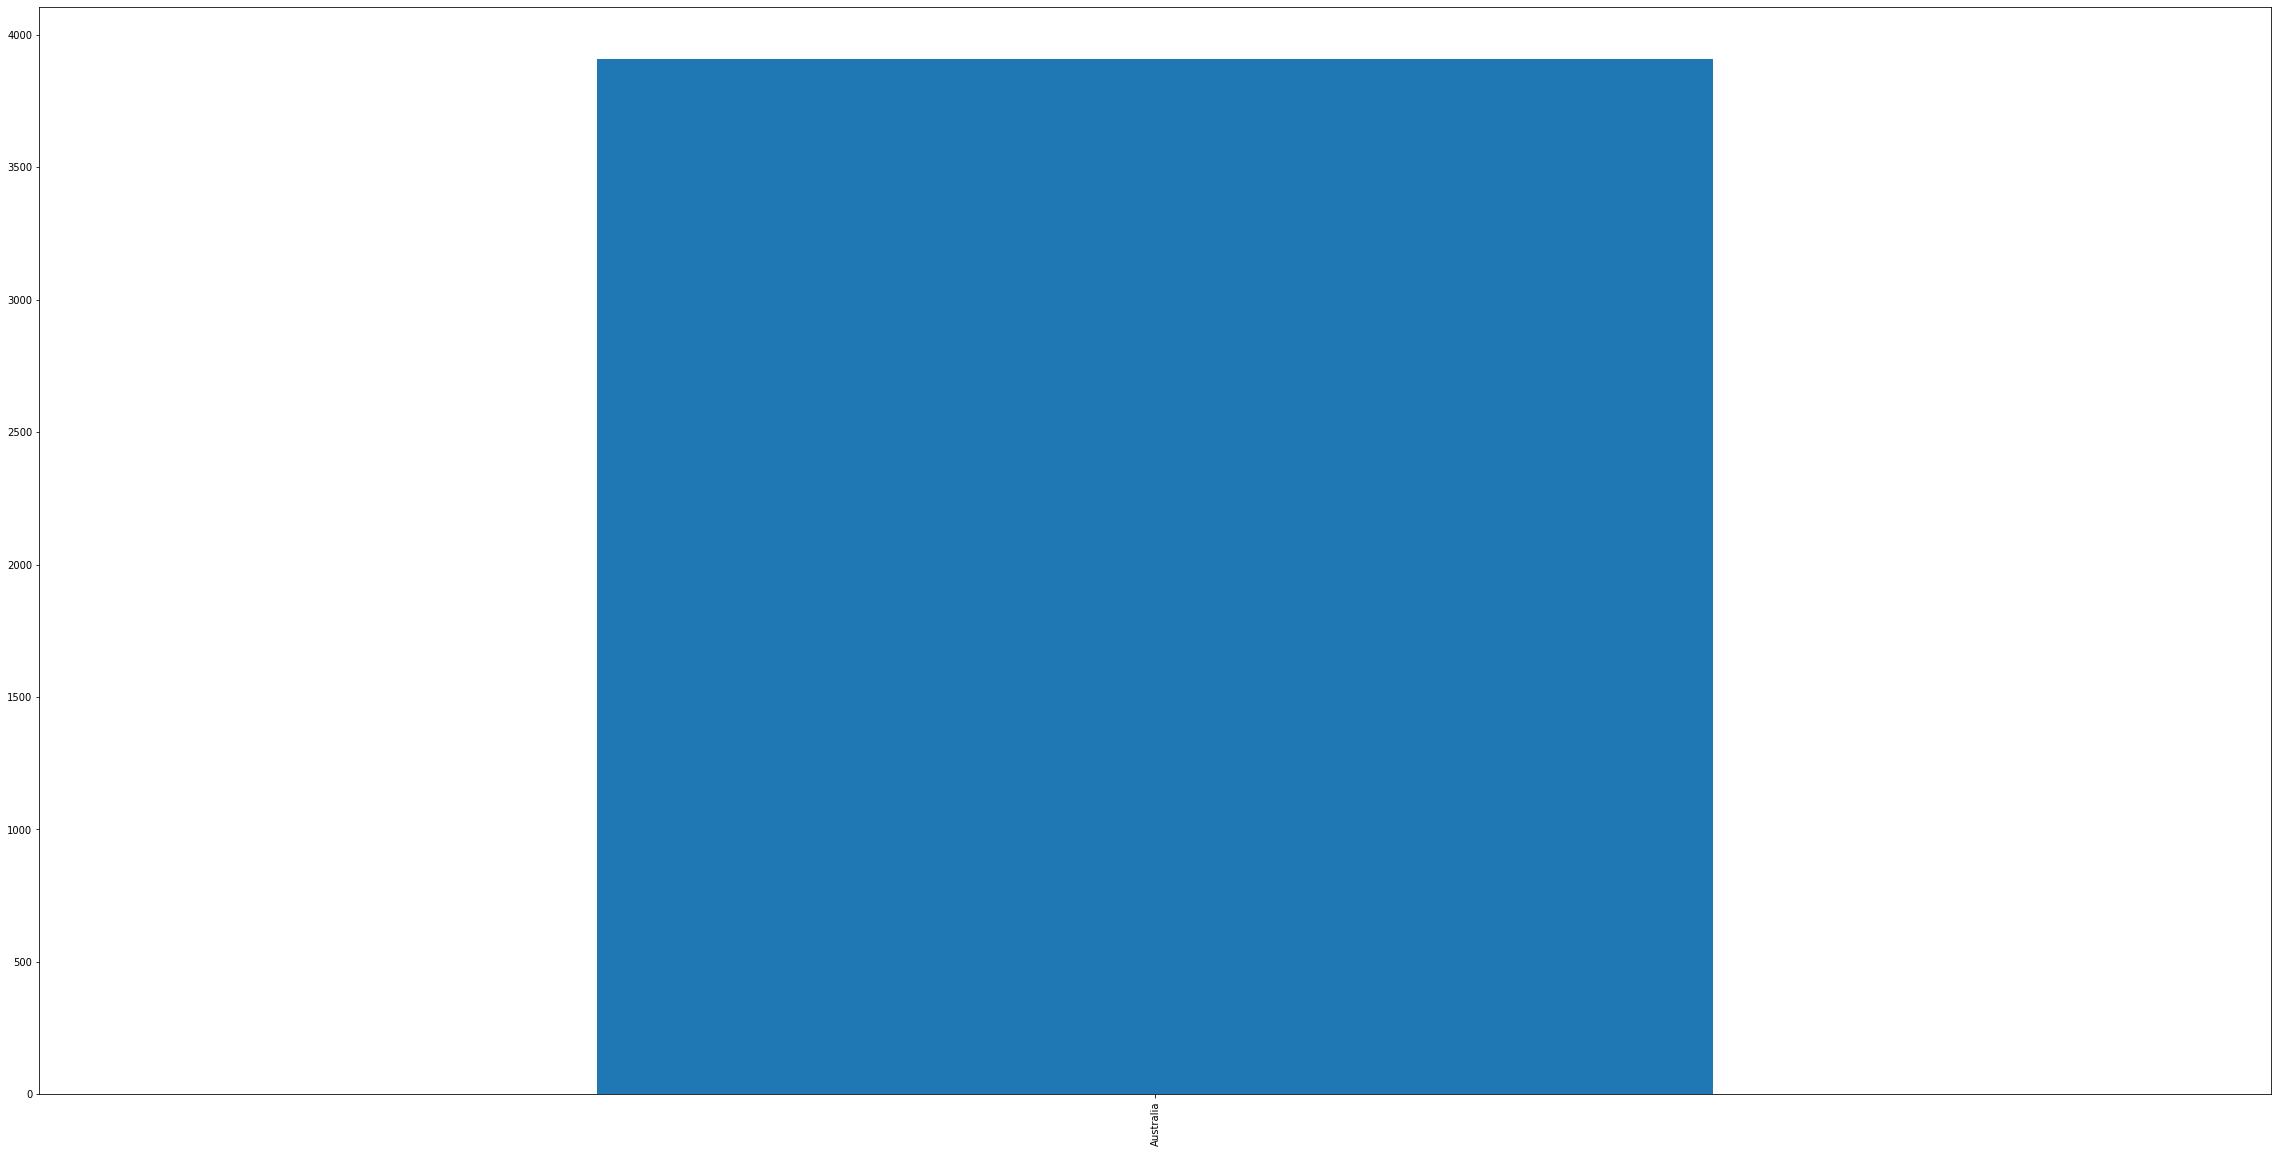

In [57]:
country = Data_glance(custadd, 'country')
public_method_names = [method for method in dir(country) if callable(getattr(country, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(country, method)()  # call

__6. property_valuation__

Unique Values: [10  9  4 12  8  6  7  3  5 11  1  2]

Value counts:
9     634
8     629
10    563
7     480
11    277
6     232
5     223
4     211
12    189
3     182
1     151
2     138
Name: property_valuation, dtype: int64



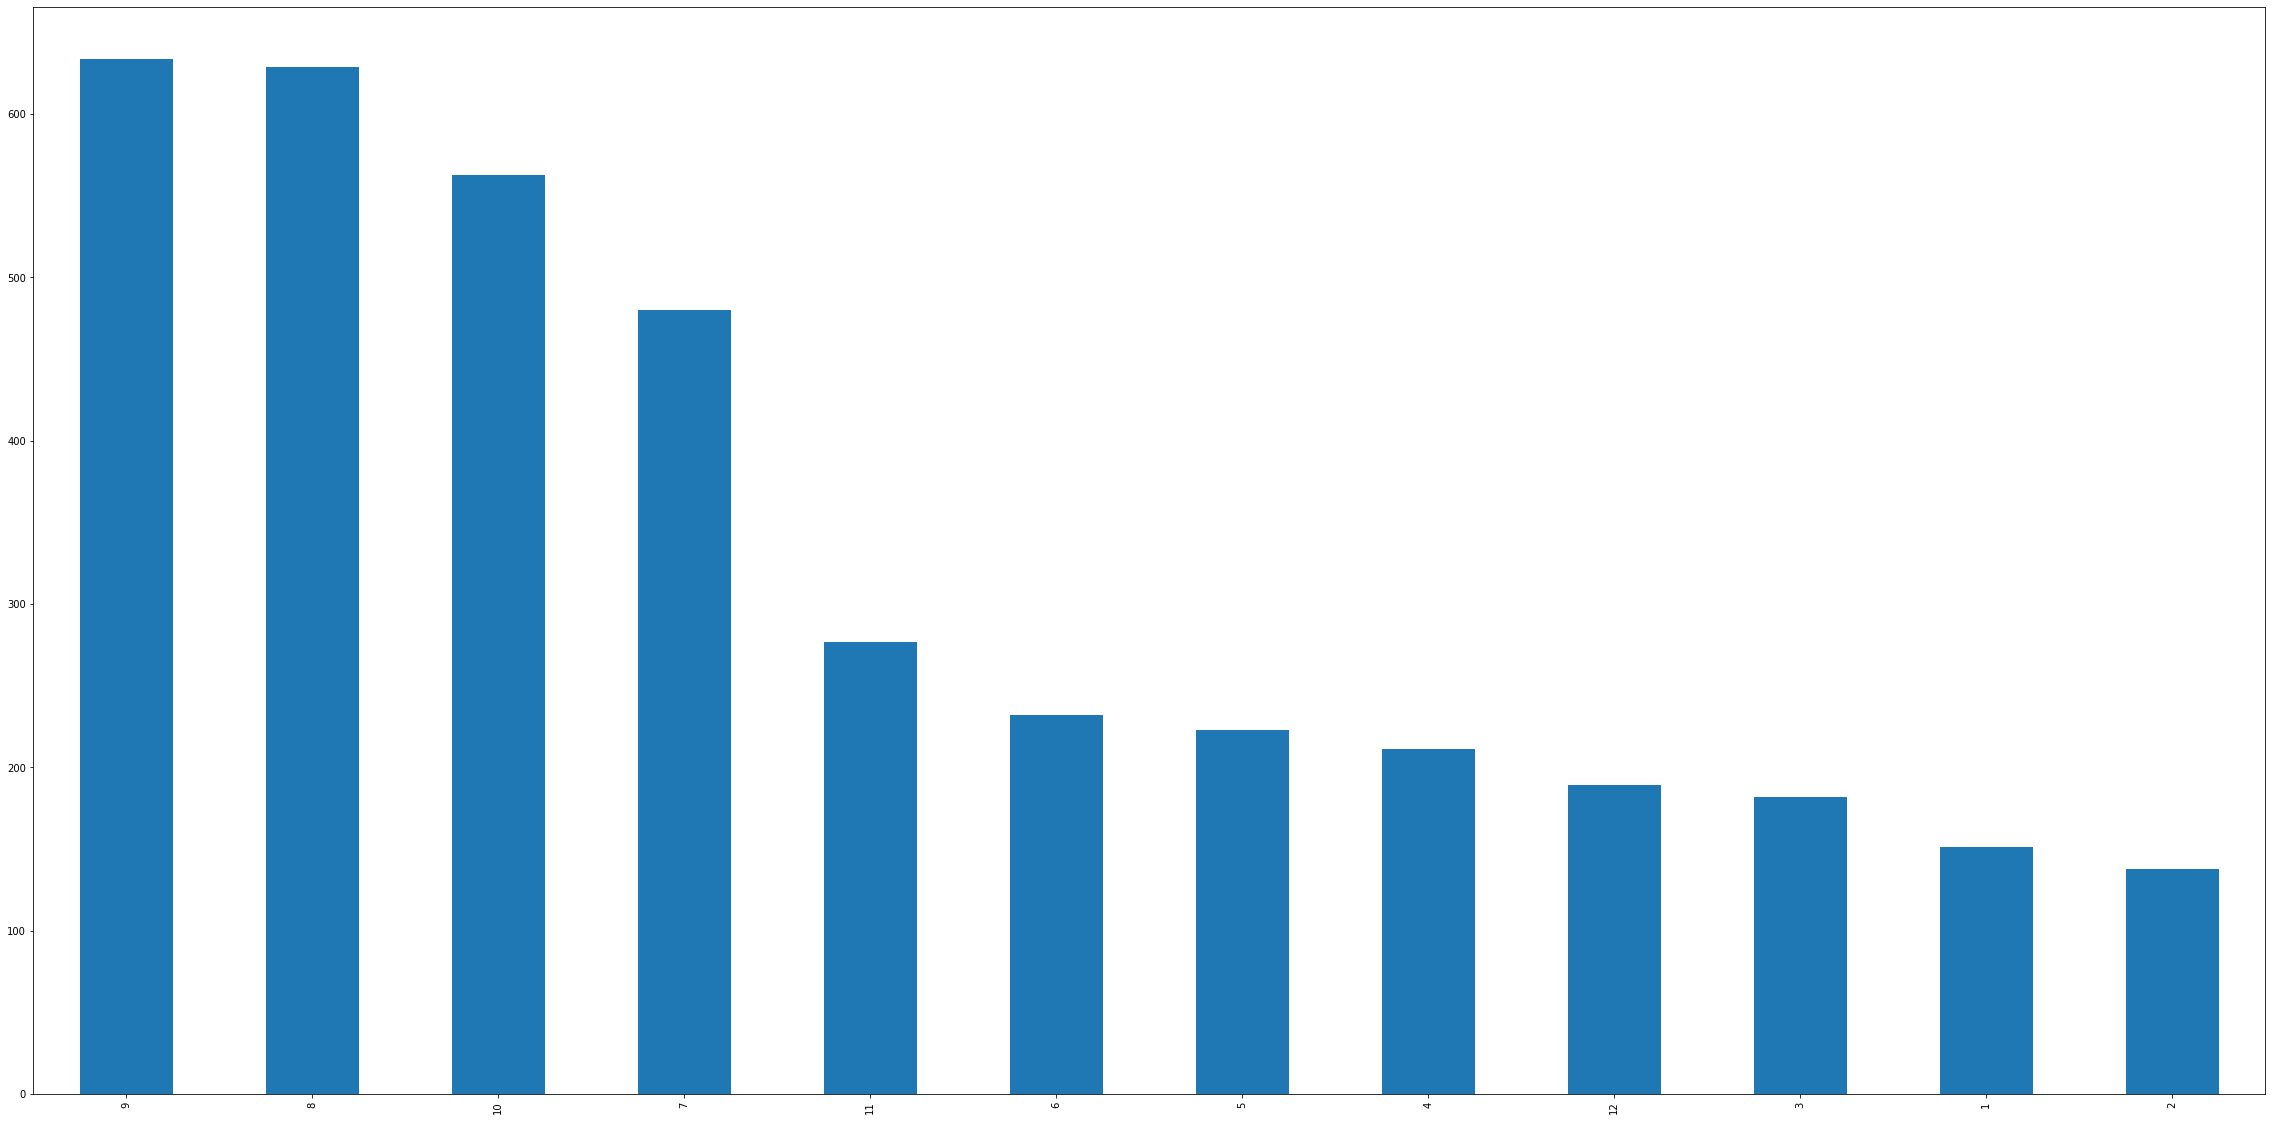

In [58]:
property_valuation = Data_glance(custadd, 'property_valuation')
public_method_names = [method for method in dir(property_valuation) if callable(getattr(property_valuation, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(property_valuation, method)()  # call

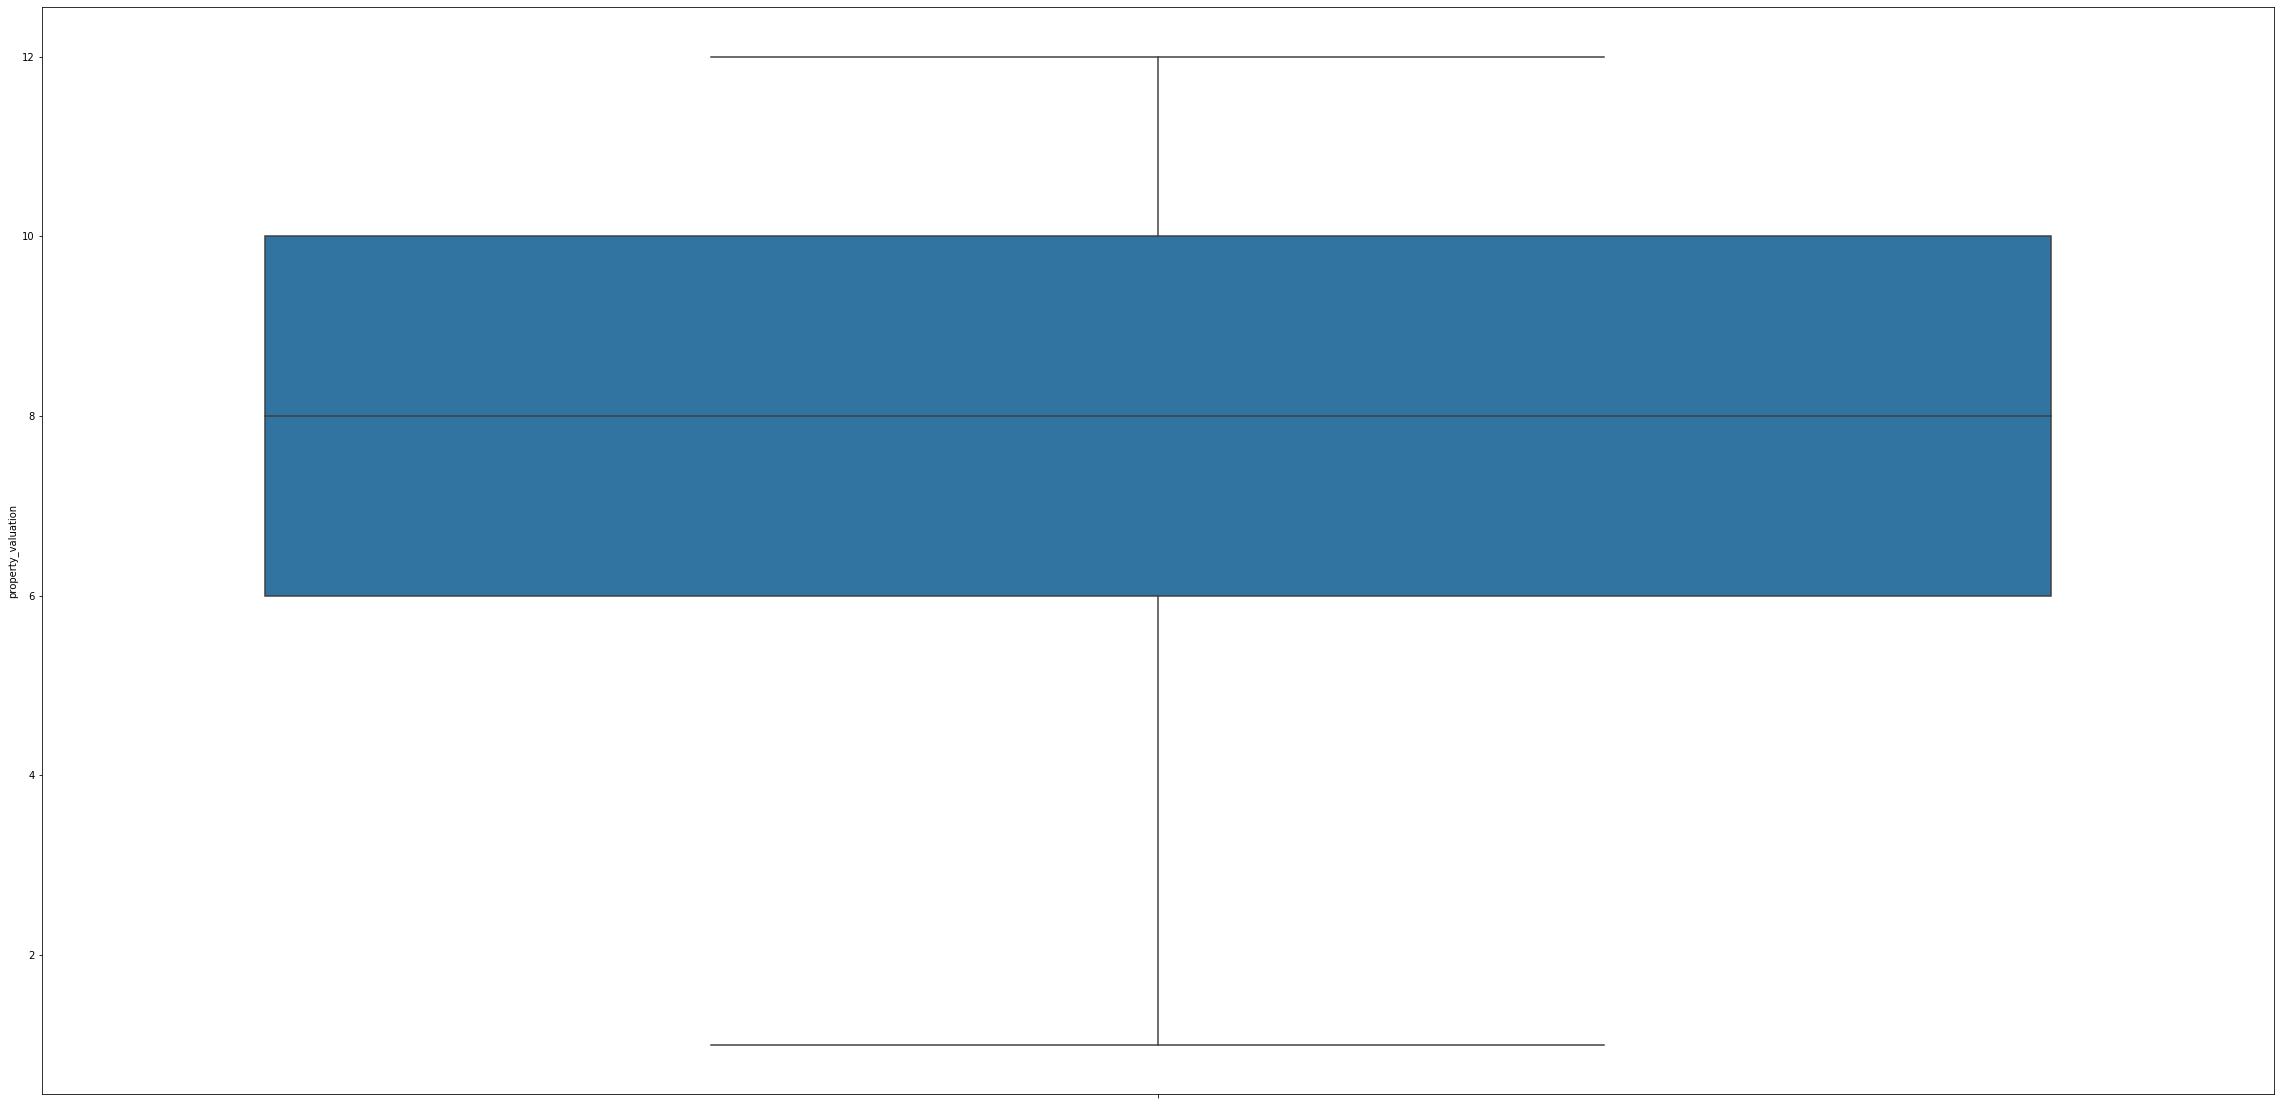

In [59]:
g_box(custadd, 'property_valuation')

In [60]:
custadd.describe(include='all')

,customer_id,postcode,state,country,property_valuation
count,3909.000000,3909.0,3909,3909,3909.000000
unique,NaN,865.0,3,1,NaN
top,NaN,2155.0,NSW,Australia,NaN
freq,NaN,30.0,2089,3909,NaN
mean,2001.356869,NaN,NaN,NaN,7.512663
std,1154.026797,NaN,NaN,NaN,2.824744
min,1.000000,NaN,NaN,NaN,1.000000
25%,1005.000000,NaN,NaN,NaN,6.000000
50%,2002.000000,NaN,NaN,NaN,8.000000
75%,2998.000000,NaN,NaN,NaN,10.000000


In [61]:
custadd.isnull().sum()

customer_id           0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

# Data Cleaning

__3. Transactions__

In [62]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [63]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

#### Handling the missing values (columns: brand, product_line, product_class, product_size, standard_cost, product_first_sold_date)

In [64]:
drop_ix = transactions.query("brand !=brand and \
                    product_line != product_line and \
                    product_class != product_class and \
                    product_size != product_size and \
                    standard_cost != standard_cost and \
                    product_first_sold_date != product_first_sold_date").index.tolist()

In [65]:
# the missing valus only around 1% of transactions, I will drop all to keey the data tidy and clean.
len(drop_ix)/len(transactions)*100

0.985

In [66]:
transactions.drop(transactions.index[drop_ix], inplace = True)

In [67]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

__1. customer_id__

Drop the ids that are not in customer demographic file.

In [68]:
trans_add = transactions.customer_id.unique().tolist()
dropid = [x for x in trans_add if x not in custid_main]
dropid

[2426,
 3473,
 2000,
 1038,
 3151,
 1477,
 2999,
 599,
 2252,
 2920,
 1683,
 892,
 290,
 1509,
 2069,
 1210,
 2414,
 513,
 3086,
 2341,
 1082,
 451,
 983,
 3365,
 685,
 1918,
 3255,
 2540,
 2205,
 2469,
 1244,
 453,
 883,
 1806,
 168,
 480,
 454,
 3343,
 1740,
 1583,
 680,
 2854,
 950,
 2696,
 2647,
 3312,
 1773,
 2697,
 799,
 548,
 3012,
 1351,
 1628,
 3288,
 1780,
 2963,
 3298,
 1174,
 839,
 144,
 2295,
 2642,
 3223,
 975,
 1990,
 267,
 2165,
 3222,
 1044,
 2335,
 5034,
 1938,
 526,
 996,
 582,
 3322,
 2021]

In [69]:
transactions = transactions[~transactions.customer_id.isin(dropid)]

In [70]:
transactions.query("customer_id=='5034'") # no 5034 data exist

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


__2. transaction_id__

Unique Values: [    1     2     3 ... 19998 19999 20000]

Value counts:
2047     1
645      1
4743     1
19084    1
17037    1
        ..
11567    1
17714    1
19763    1
7481     1
2049     1
Name: transaction_id, Length: 19362, dtype: int64



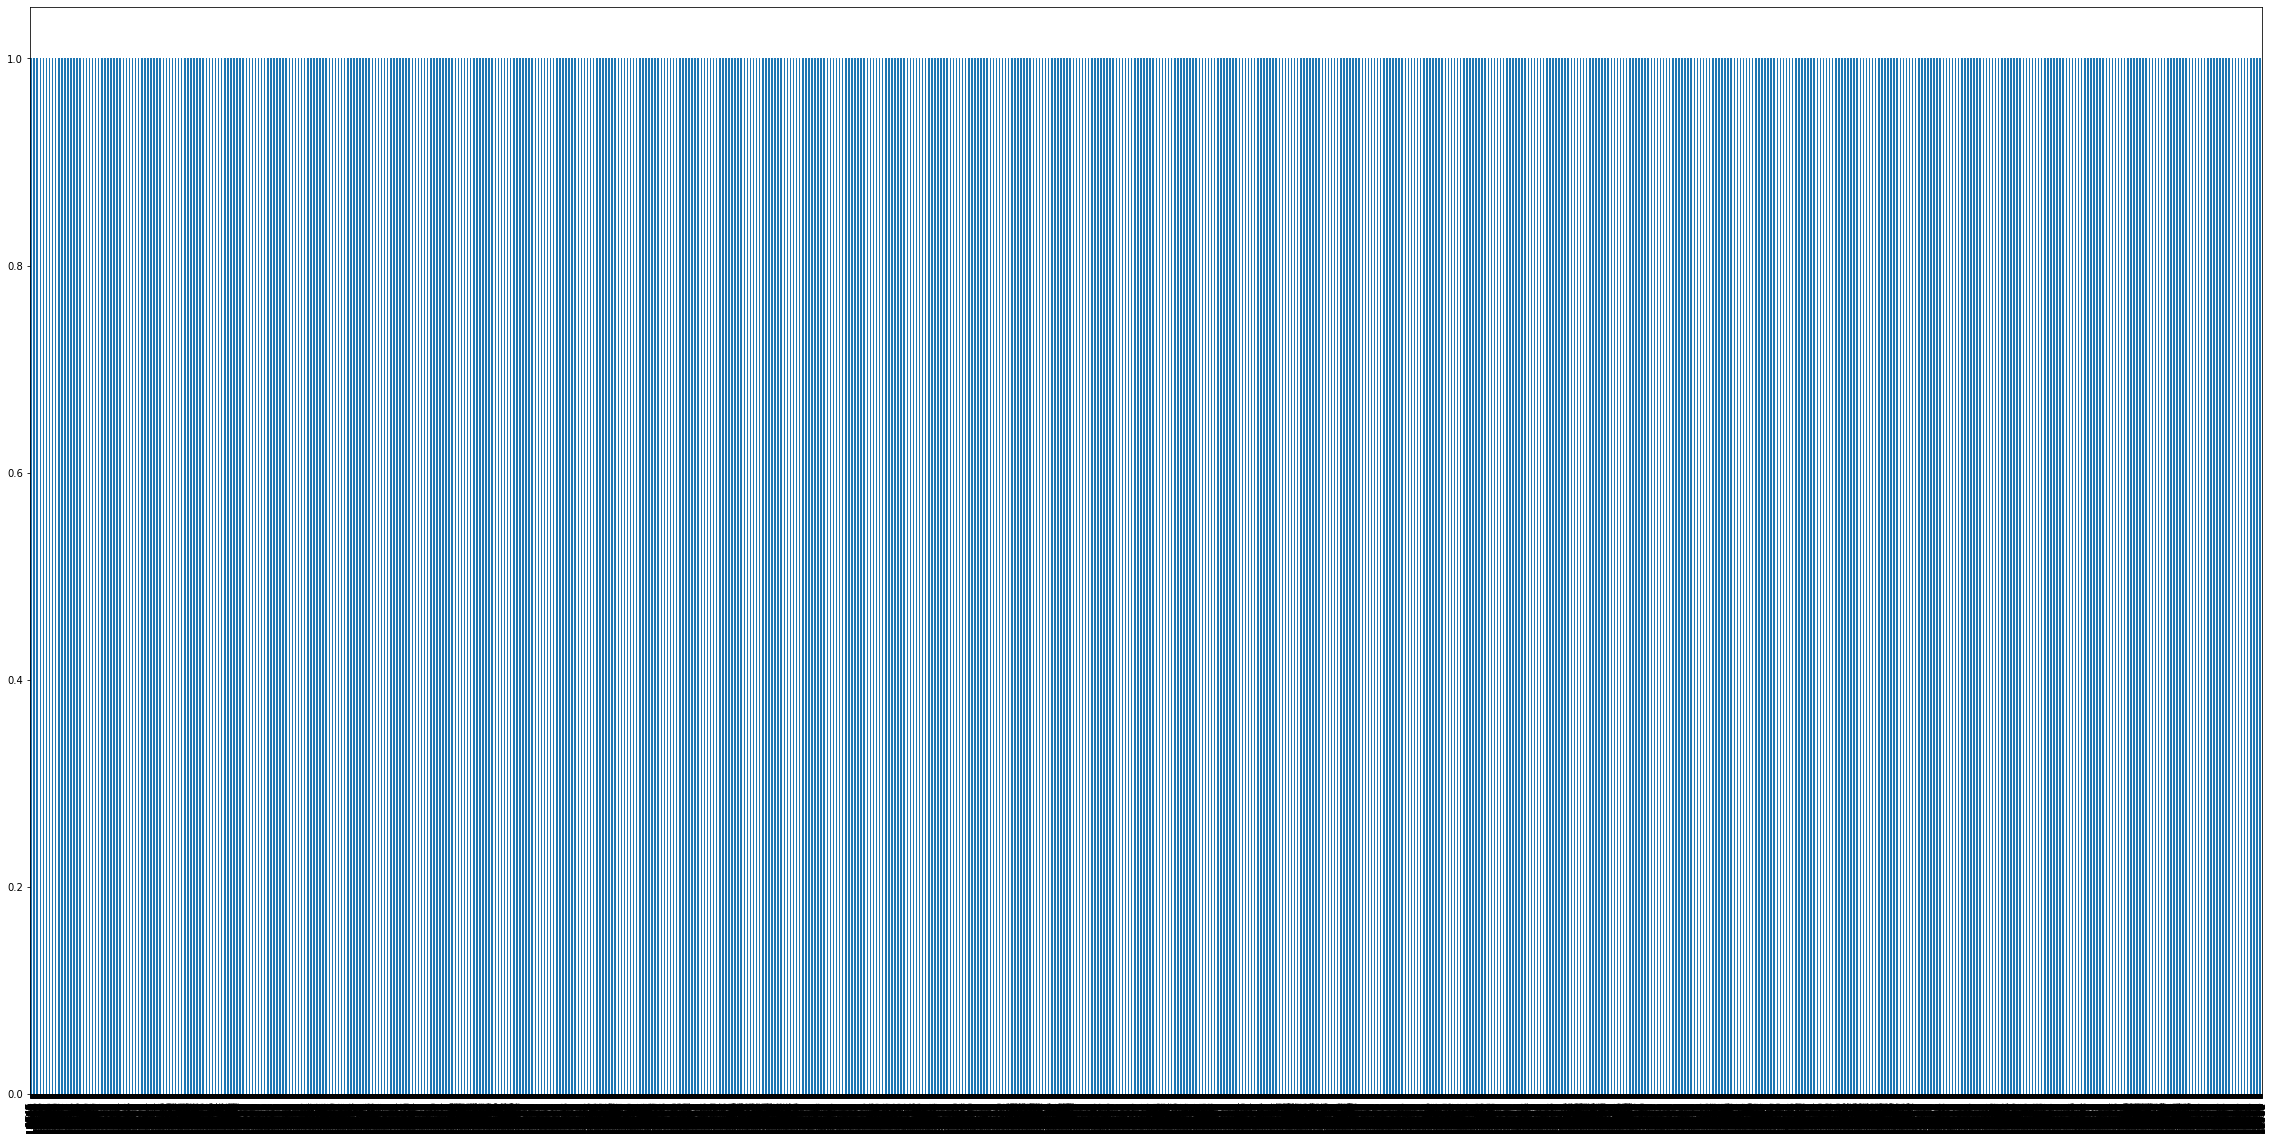

In [71]:
transaction_id = Data_glance(transactions, 'transaction_id')
public_method_names = [method for method in dir(transaction_id) if callable(getattr(transaction_id, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(transaction_id, method)()  # call

__3. product_id__

Unique Values: [  2   3  37  88  78  25  22  15  67  12   5  61  35  16  33  54  27  82
  89  64  19  72  91   1  99   0  92  14  44  79  76  46  55  66  81  86
  32  77  96   6  47  94  93  28   4  38  56  58  50  80  87  84  21  31
  62  17  73  45  49  95  18  70  26  39  36  98  75  42  20  53  65  29
  11  10  60   7  41   9  69  90  97 100  74  71  57  23  51  59  63  40
   8  13  30  48  68  24  34  83  43  52  85]

Value counts:
0      1149
3       345
1       306
38      266
35      265
       ... 
16      134
75      132
8       132
100     124
47      118
Name: product_id, Length: 101, dtype: int64



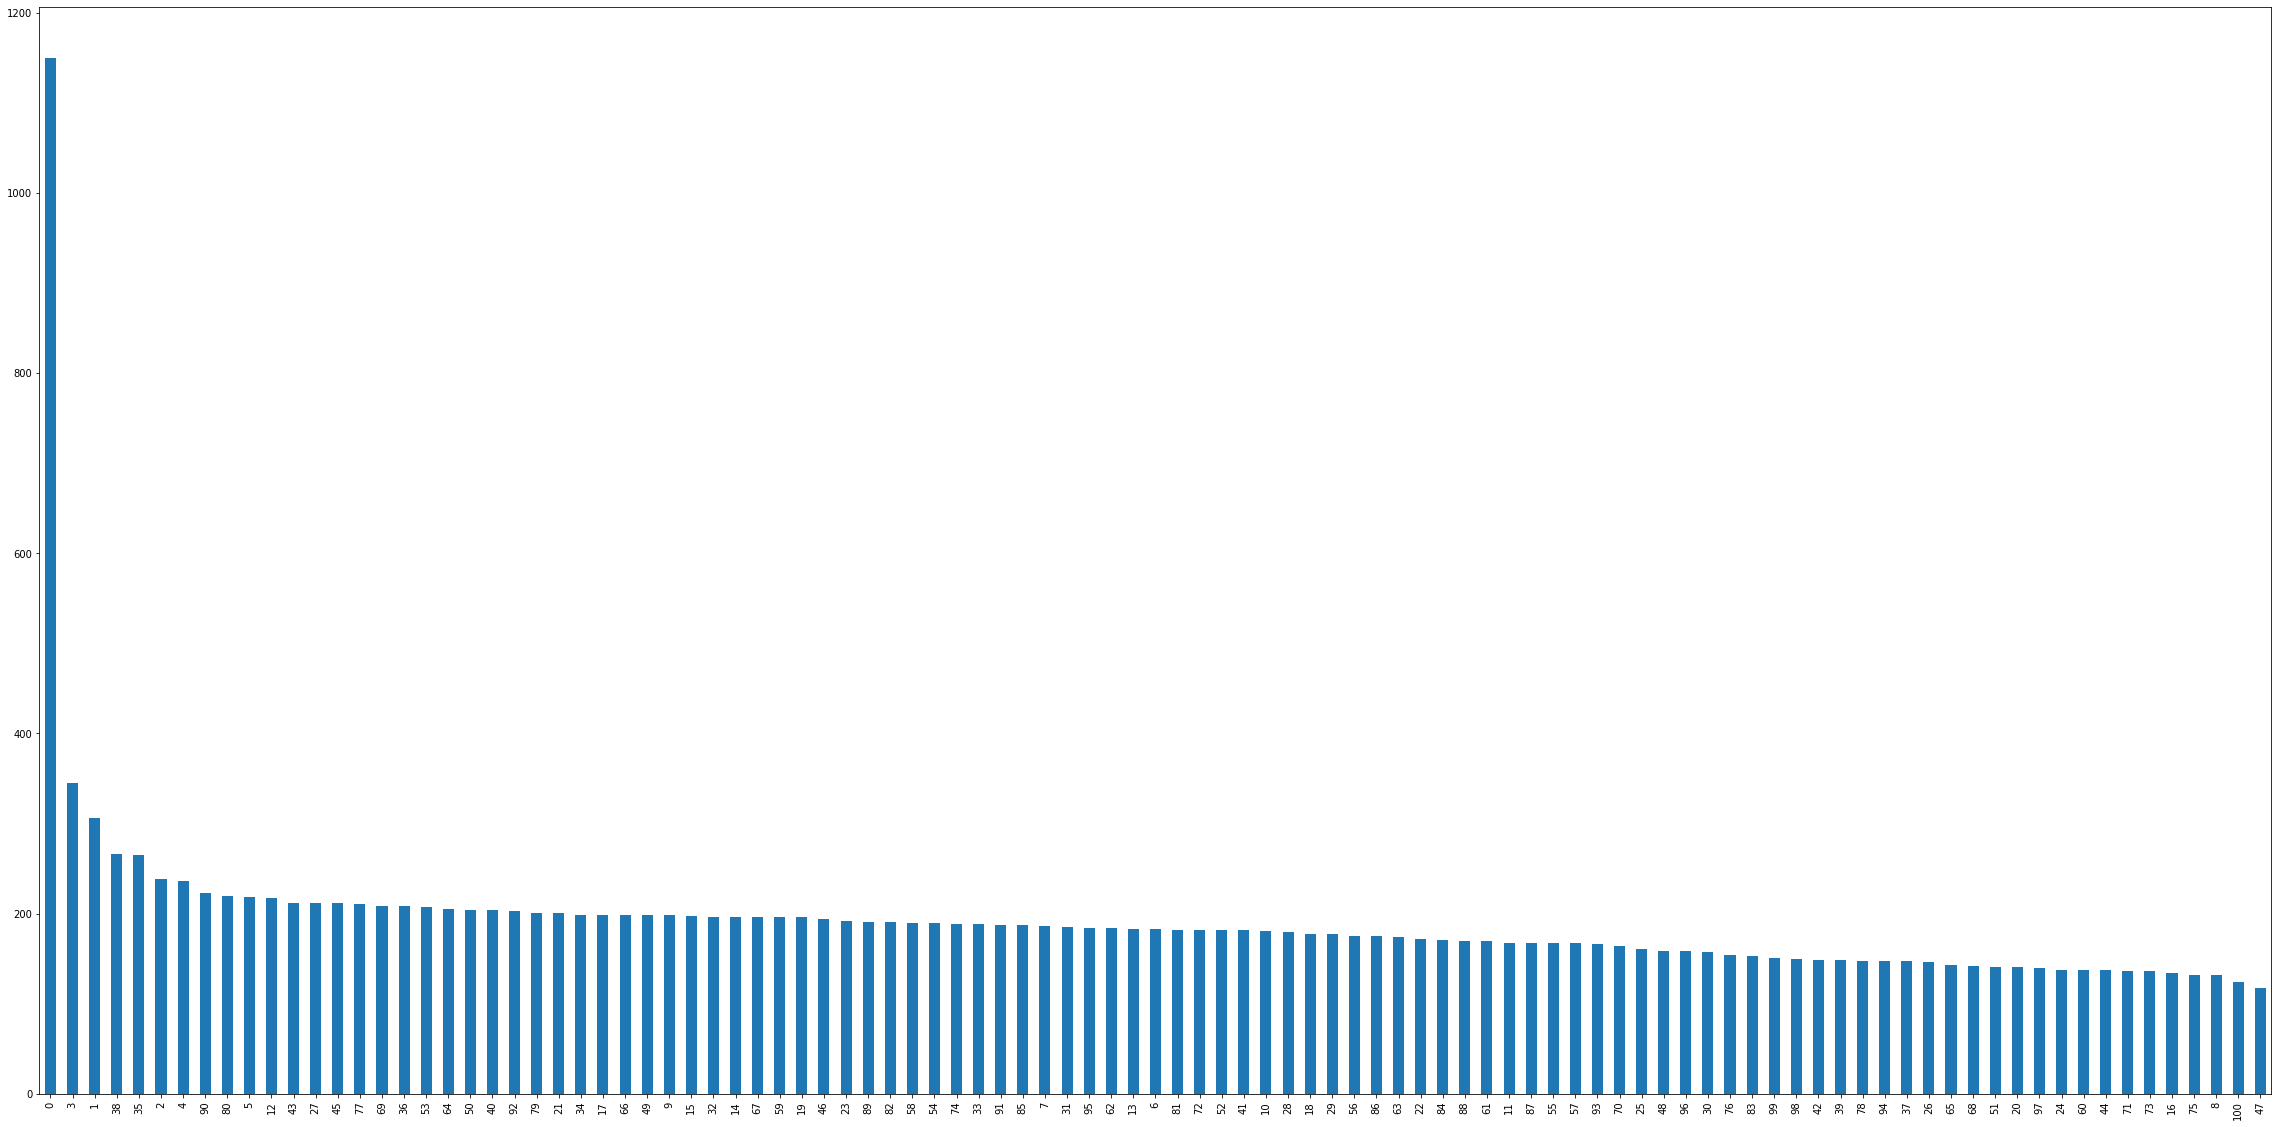

In [72]:
product_id = Data_glance(transactions, 'product_id')
public_method_names = [method for method in dir(product_id) if callable(getattr(product_id, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(product_id, method)()  # call

__4. transaction_date__

Unique Values: ['2017-02-25T00:00:00.000000000' '2017-05-21T00:00:00.000000000'
 '2017-10-16T00:00:00.000000000' '2017-08-31T00:00:00.000000000'
 '2017-10-01T00:00:00.000000000' '2017-03-08T00:00:00.000000000'
 '2017-04-21T00:00:00.000000000' '2017-07-15T00:00:00.000000000'
 '2017-08-10T00:00:00.000000000' '2017-08-30T00:00:00.000000000'
 '2017-01-17T00:00:00.000000000' '2017-01-05T00:00:00.000000000'
 '2017-02-26T00:00:00.000000000' '2017-09-10T00:00:00.000000000'
 '2017-06-11T00:00:00.000000000' '2017-10-10T00:00:00.000000000'
 '2017-06-02T00:00:00.000000000' '2017-04-06T00:00:00.000000000'
 '2017-01-28T00:00:00.000000000' '2017-10-09T00:00:00.000000000'
 '2017-06-29T00:00:00.000000000' '2017-04-08T00:00:00.000000000'
 '2017-10-18T00:00:00.000000000' '2017-01-10T00:00:00.000000000'
 '2017-04-11T00:00:00.000000000' '2017-12-23T00:00:00.000000000'
 '2017-10-13T00:00:00.000000000' '2017-03-15T00:00:00.000000000'
 '2017-09-05T00:00:00.000000000' '2017-02-18T00:00:00.000000000'
 '2017-03-

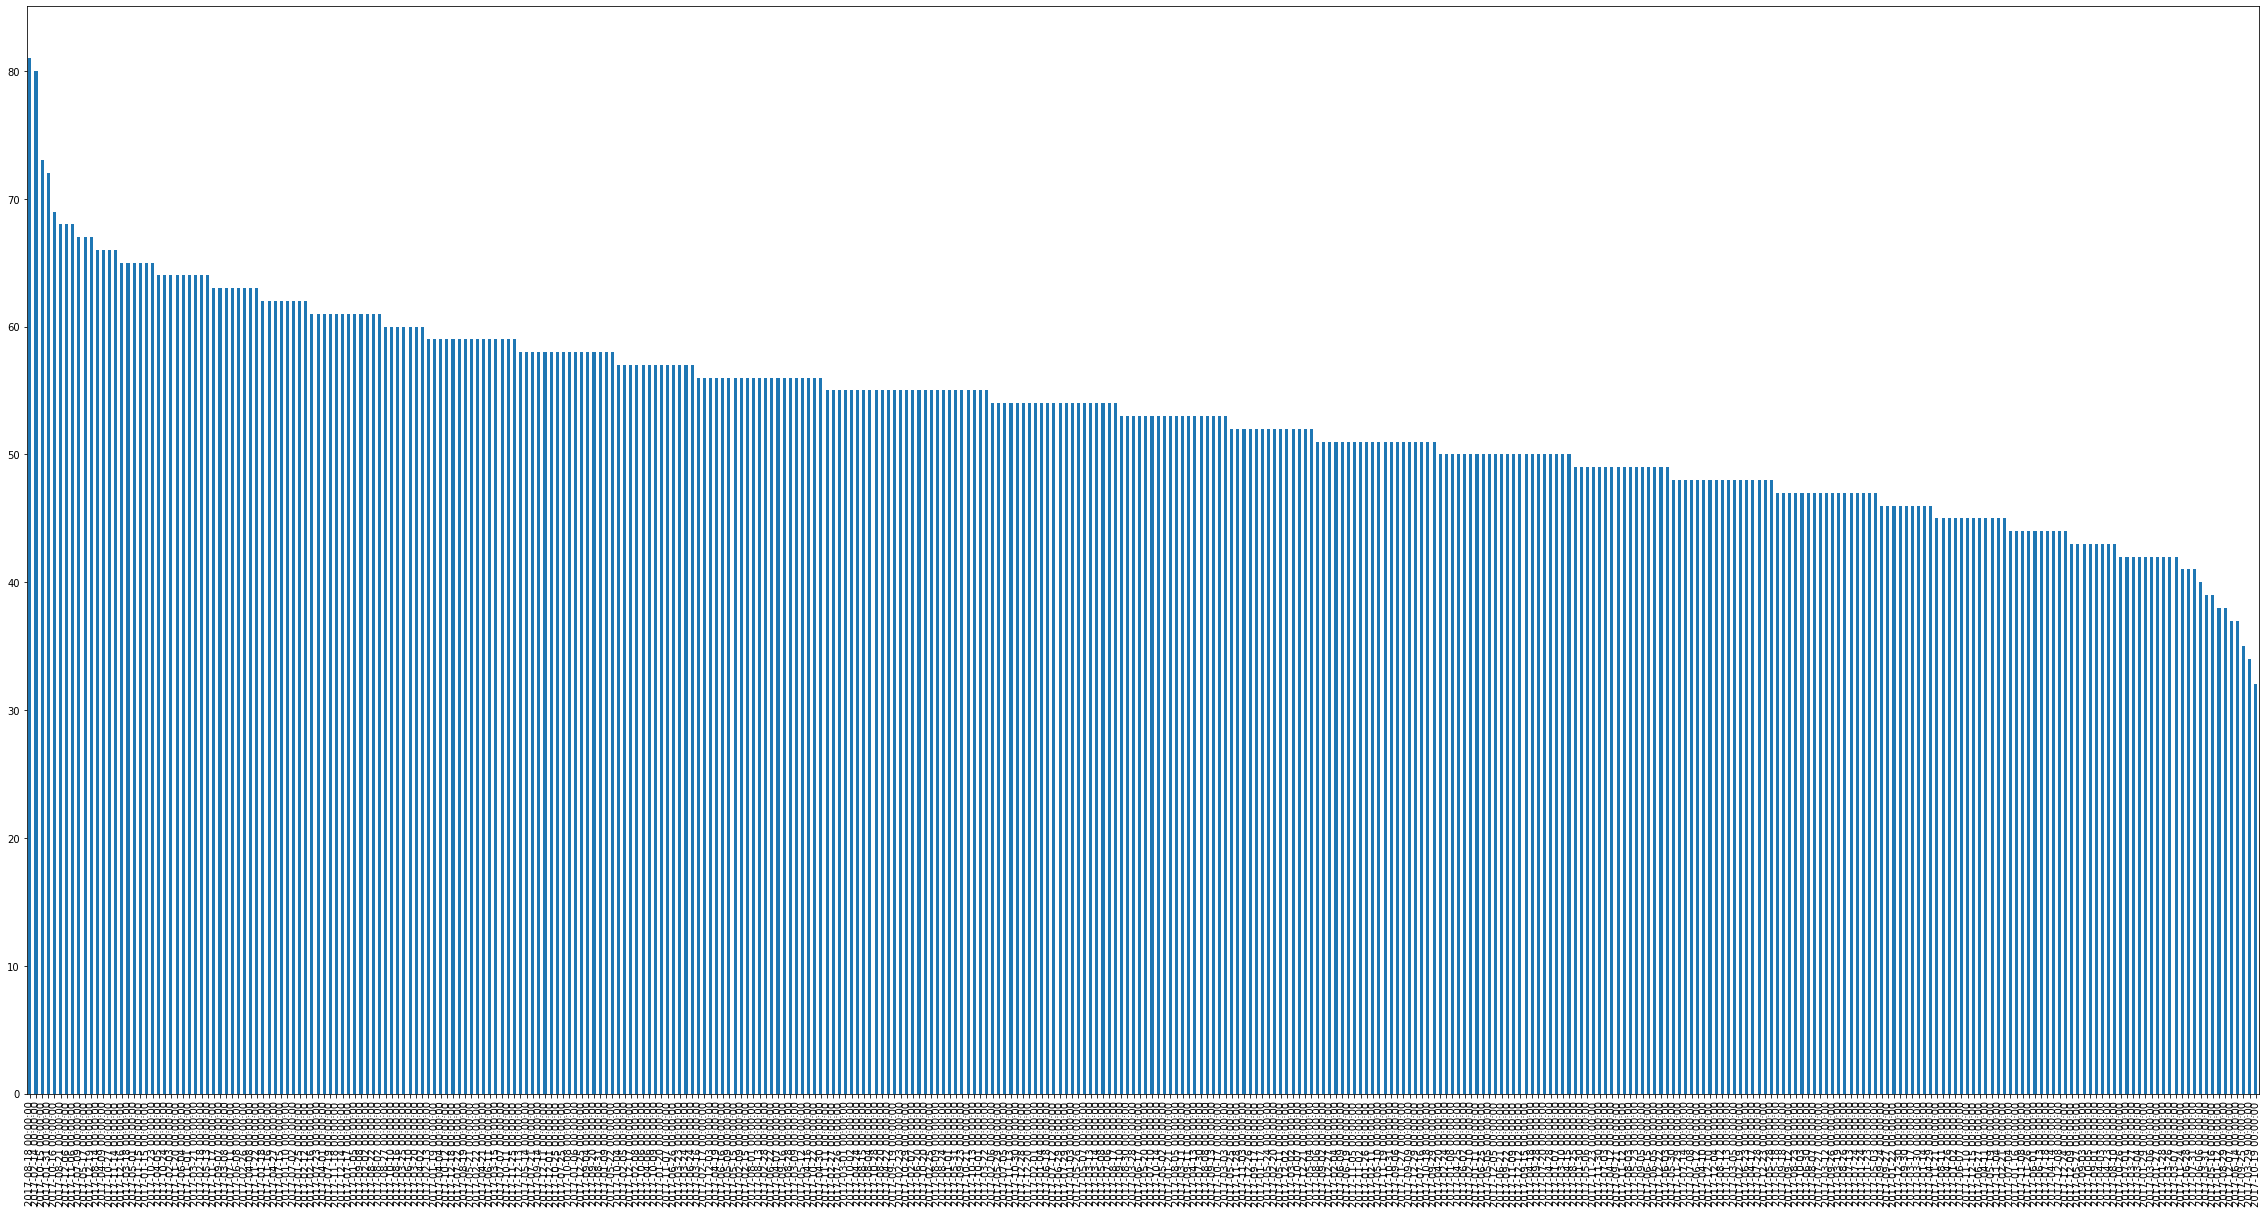

In [73]:
transaction_date = Data_glance(transactions, 'transaction_date')
public_method_names = [method for method in dir(transaction_date) if callable(getattr(transaction_date, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(transaction_date, method)()  # call

__5. online_order__

Unique Values: [ 0.  1. nan]

Value counts:
1.0    9515
0.0    9497
Name: online_order, dtype: int64



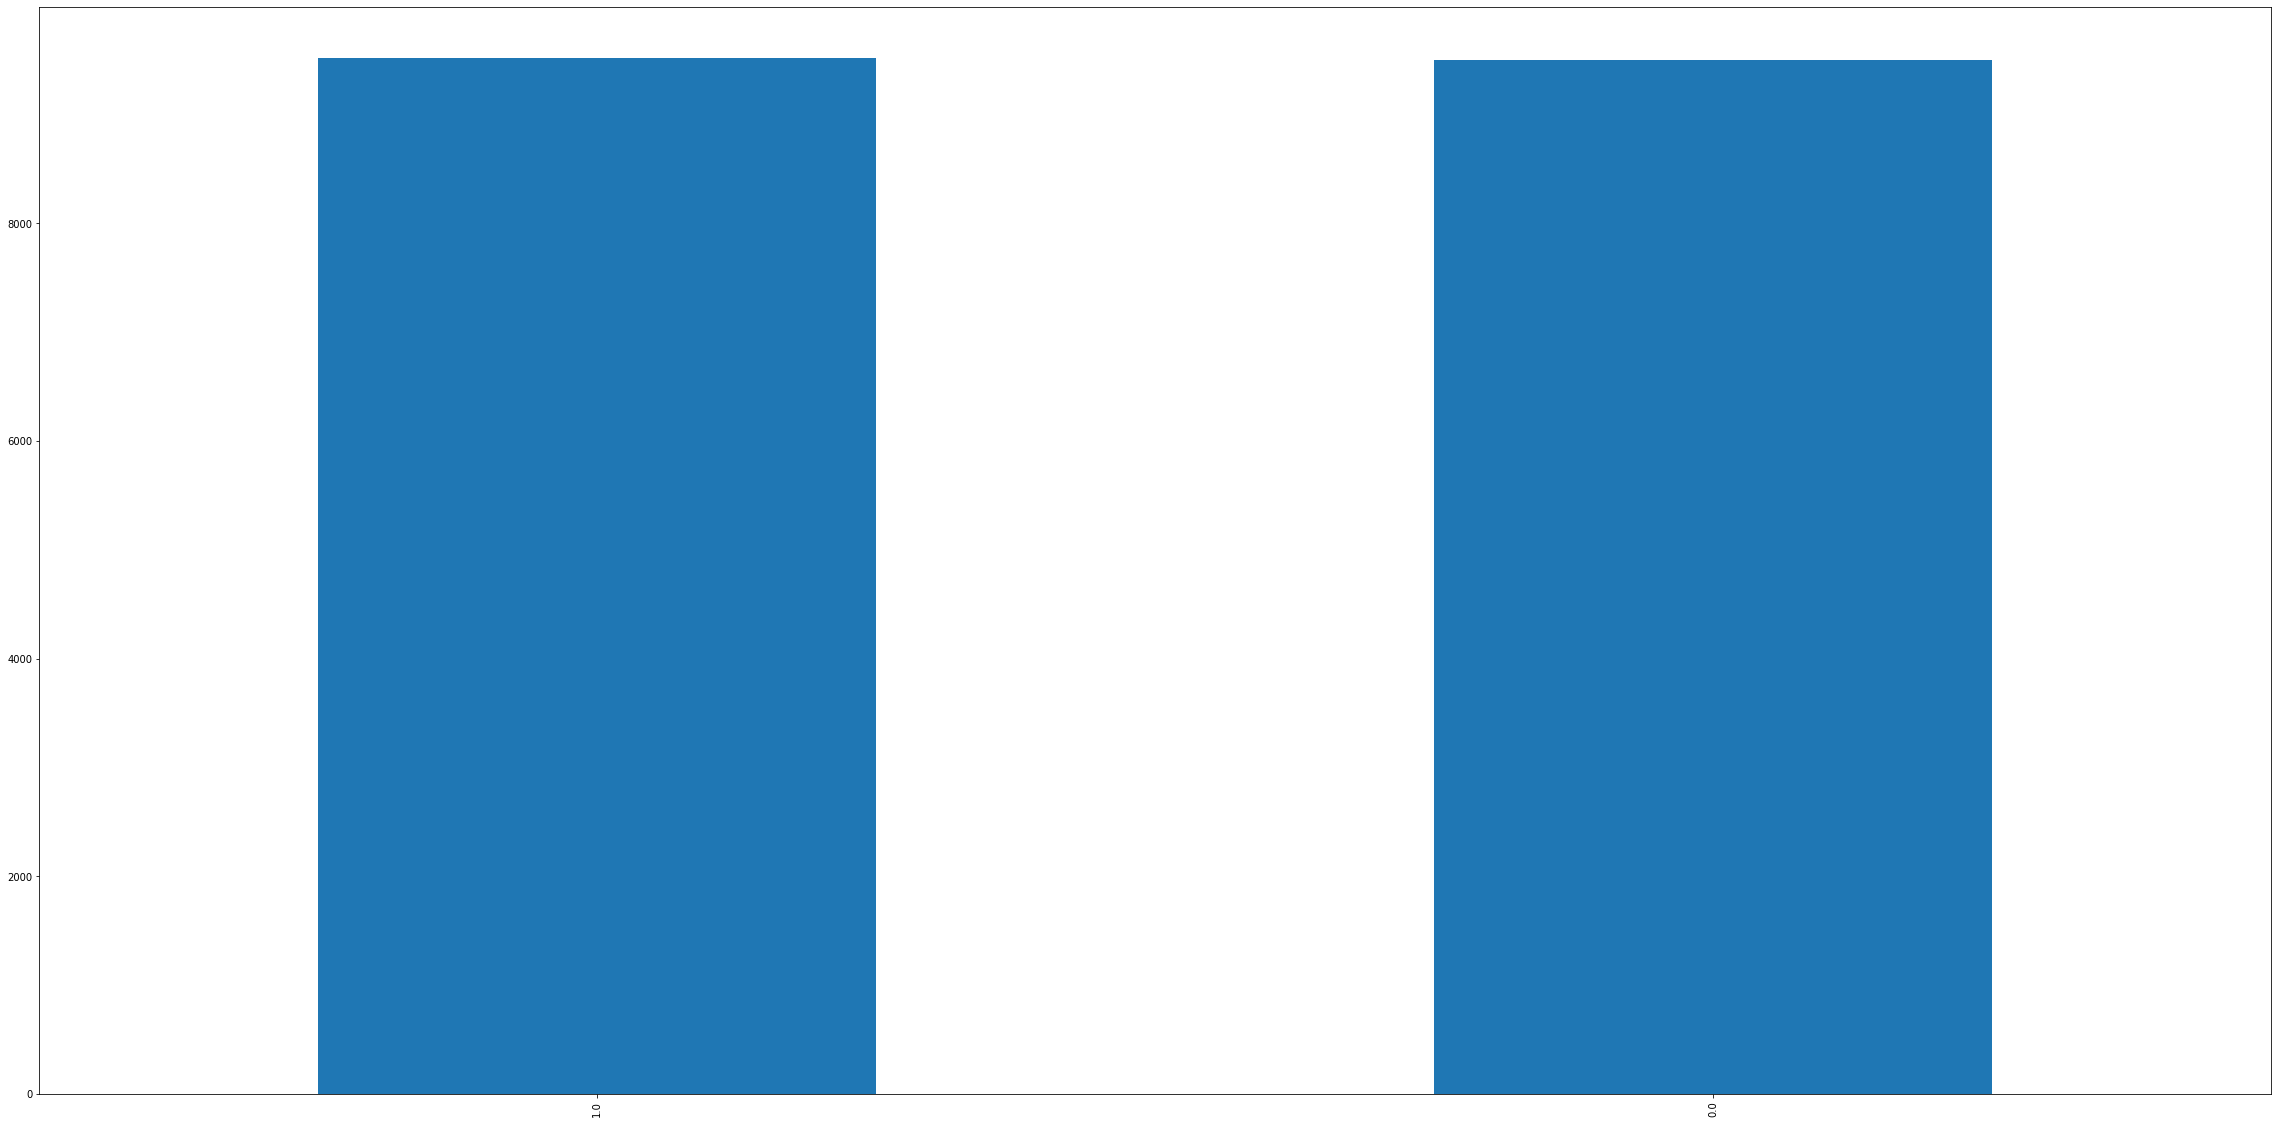

In [74]:
online_order = Data_glance(transactions, 'online_order')
public_method_names = [method for method in dir(online_order) if callable(getattr(online_order, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(online_order, method)()  # call

In [75]:
# assess the percentage of the missing value
transactions.online_order.isnull().sum()/len(transactions.online_order) * 100

1.8076644974692697

In [76]:
# Since the missing values only be 1.8% of transactions dataset, I will drop it.
transactions.dropna(subset=['online_order'], inplace=True)

In [77]:
transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

__6. order_status__

Unique Values: ['Approved' 'Cancelled']

Value counts:
Approved     18842
Cancelled      170
Name: order_status, dtype: int64



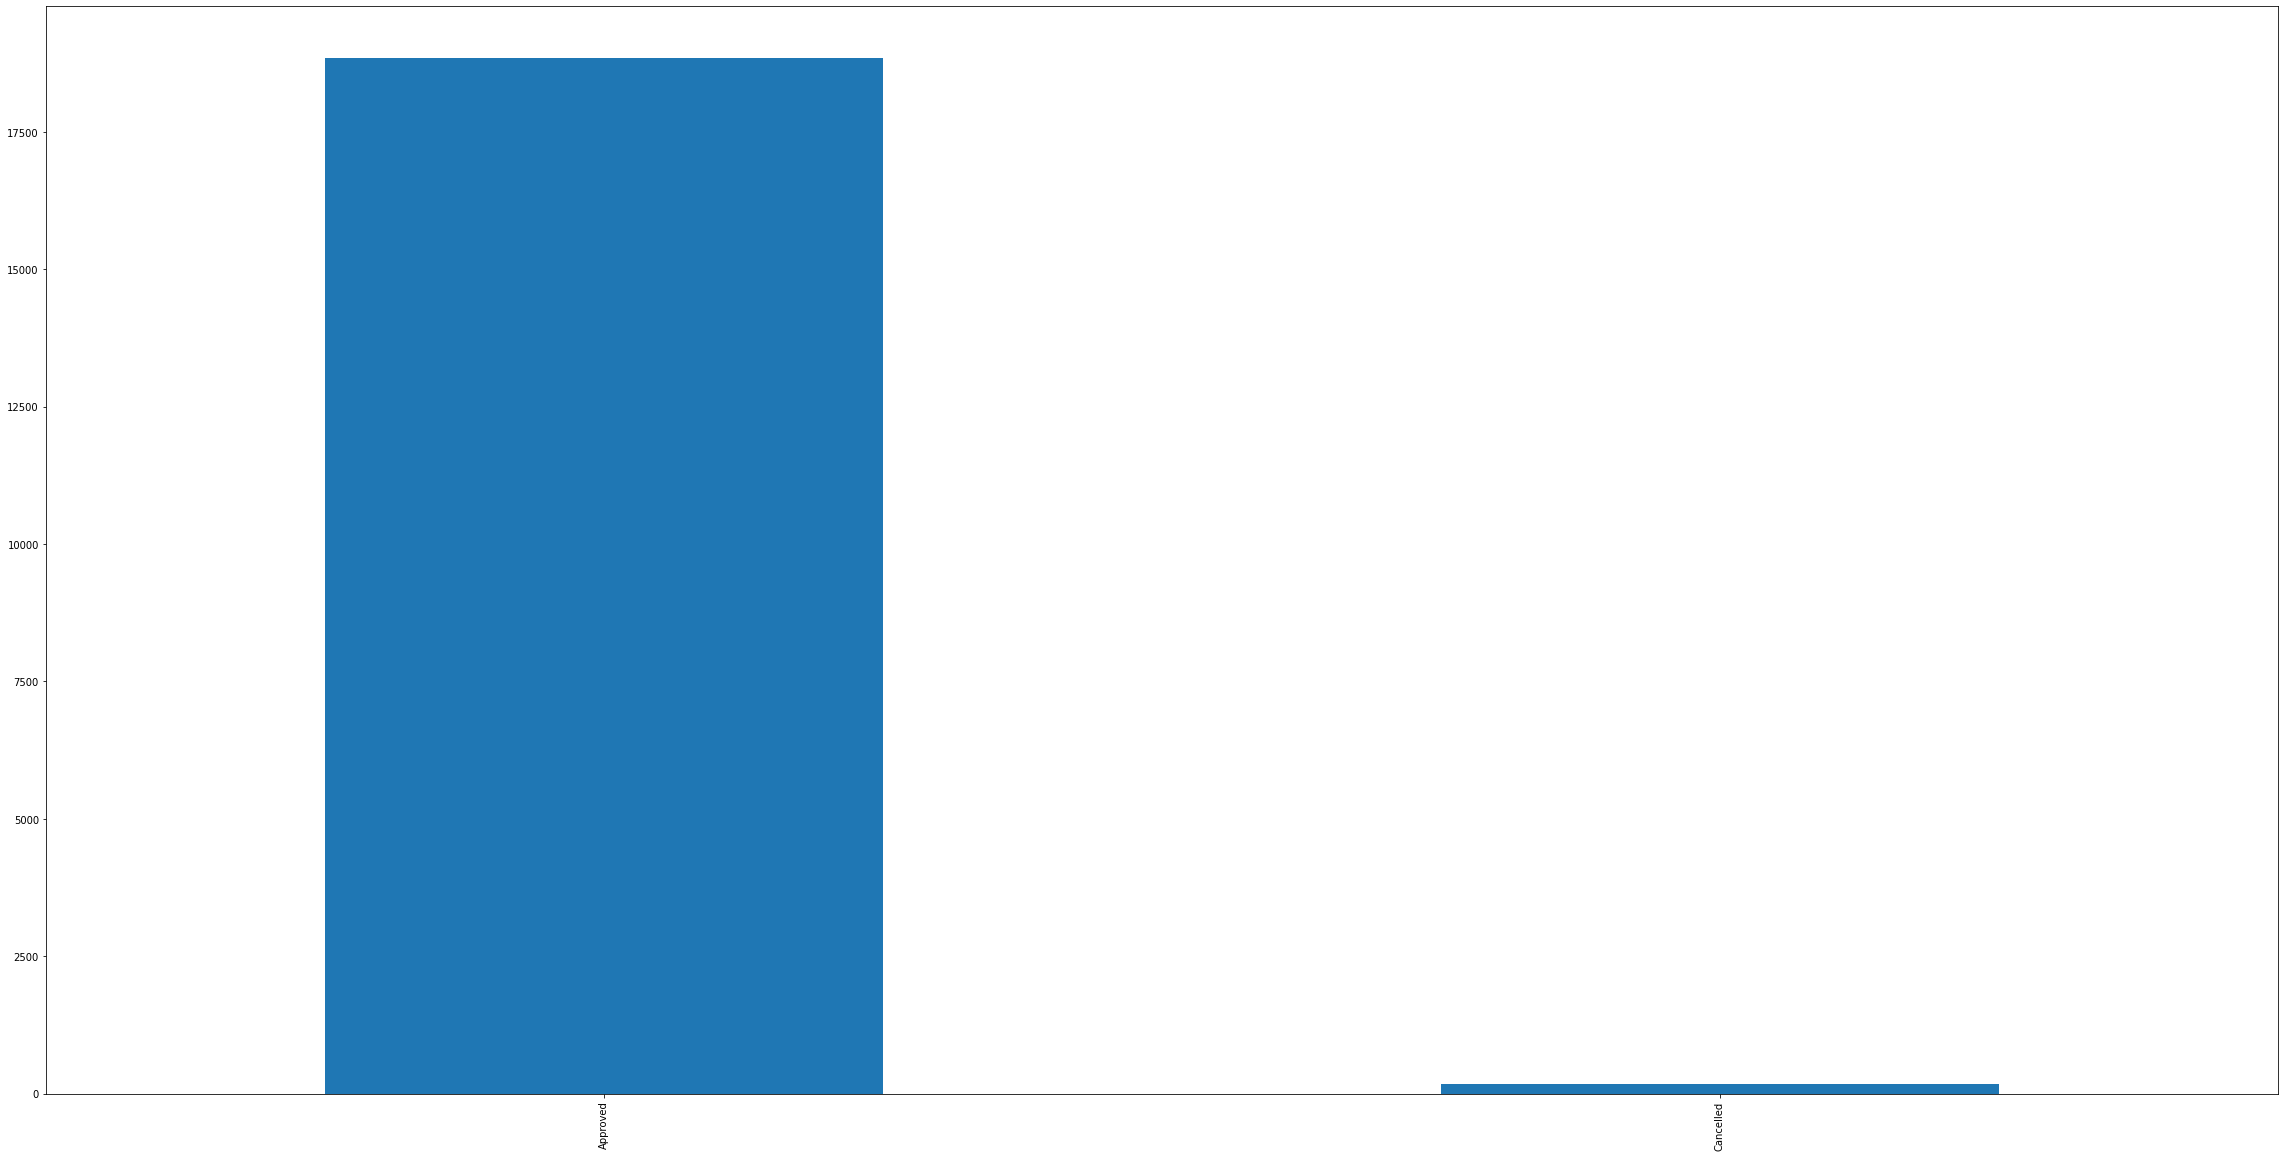

In [78]:
order_status = Data_glance(transactions, 'order_status')
public_method_names = [method for method in dir(order_status) if callable(getattr(order_status, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(order_status, method)()  # call

__7. order_status__

Unique Values: ['Approved' 'Cancelled']

Value counts:
Approved     18842
Cancelled      170
Name: order_status, dtype: int64



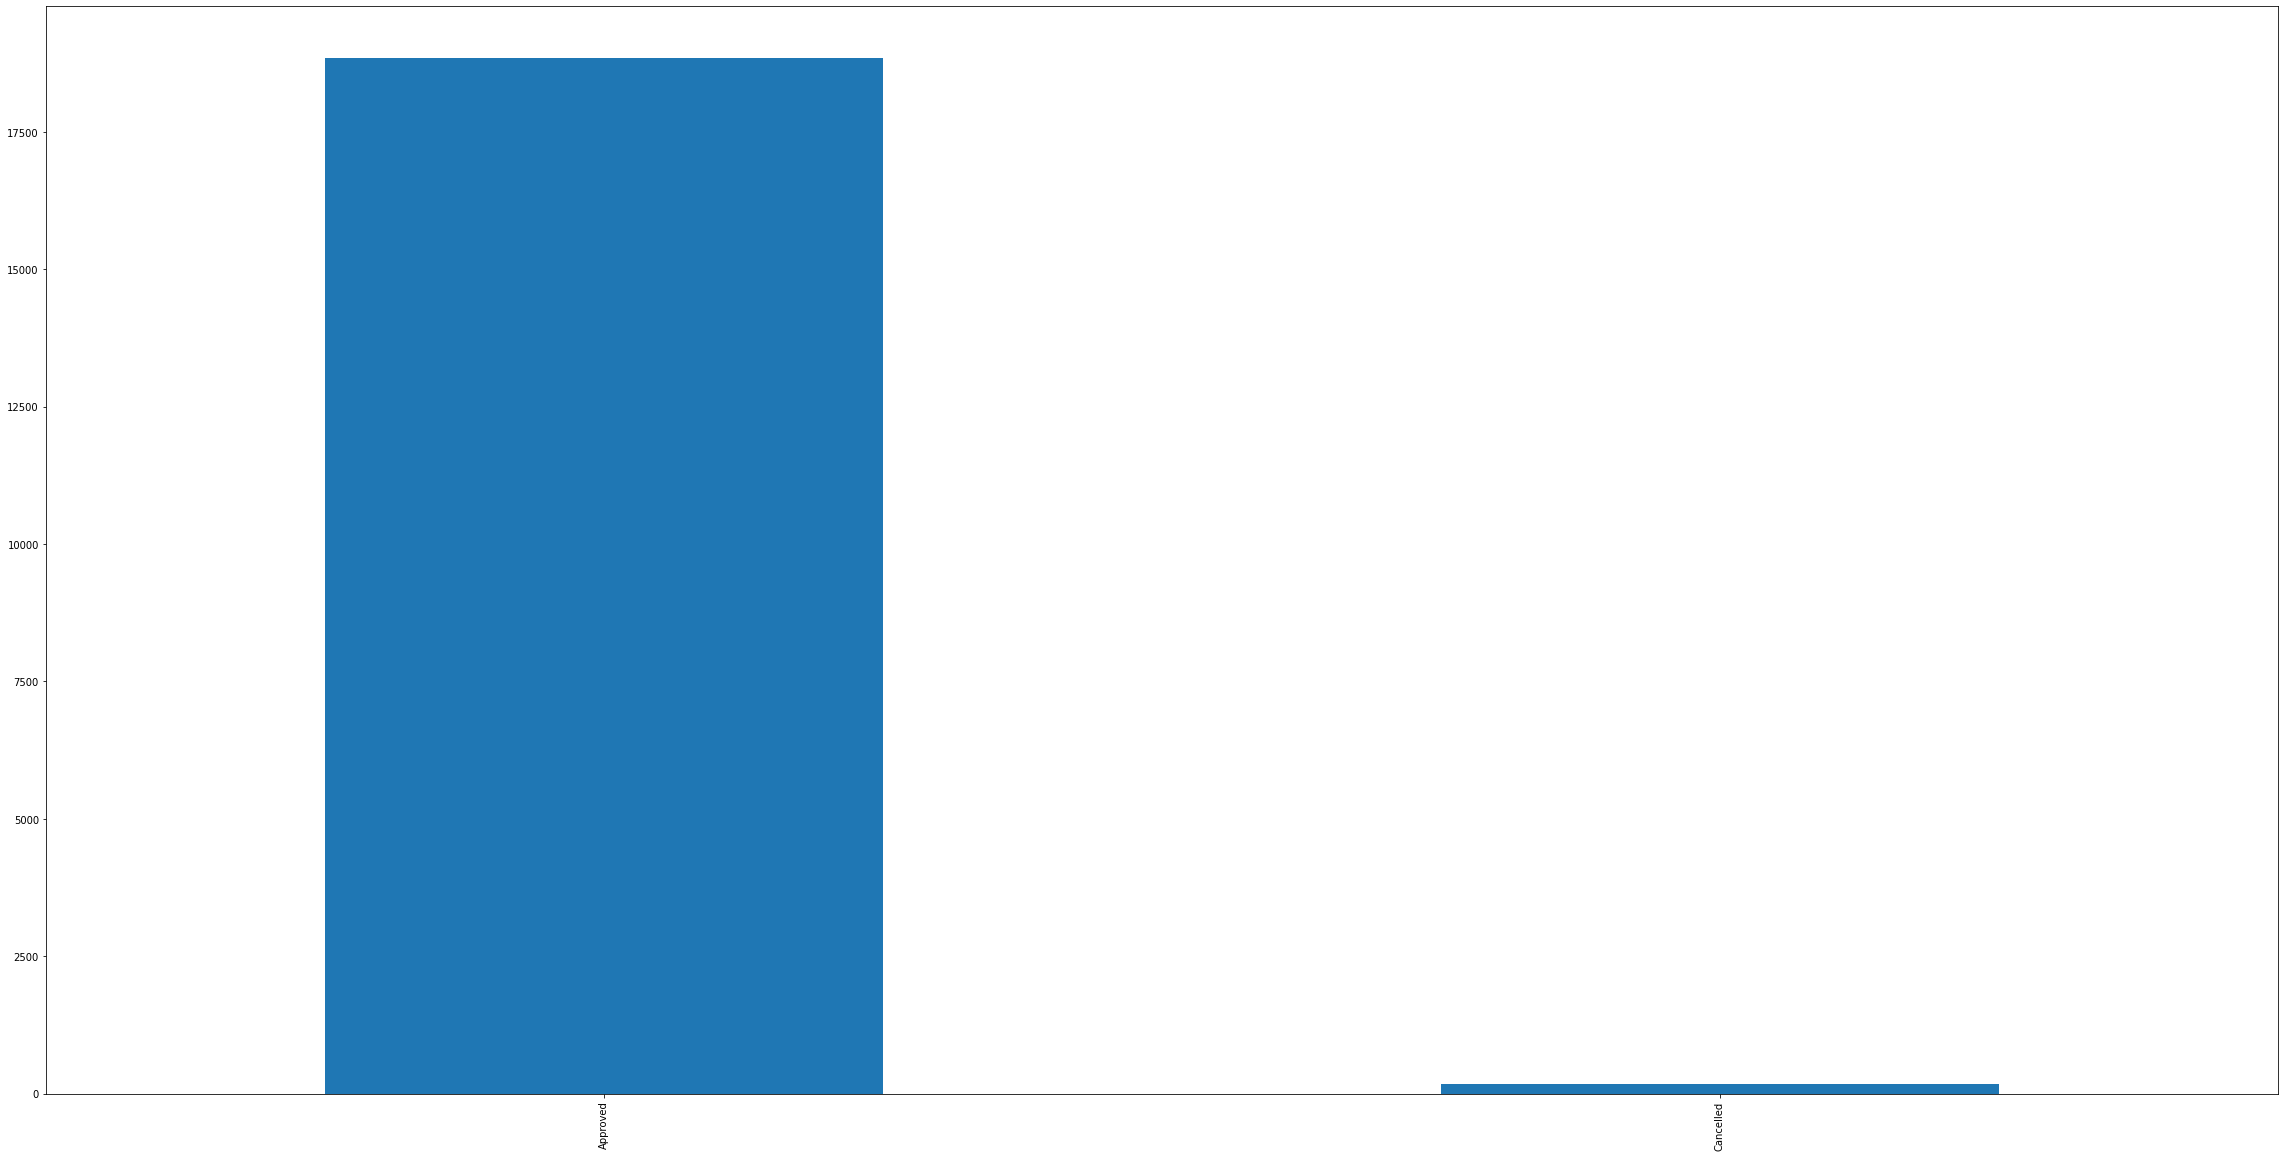

In [79]:
order_status = Data_glance(transactions, 'order_status')
public_method_names = [method for method in dir(order_status) if callable(getattr(order_status, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(order_status, method)()  # call

__8. brand__

Unique Values: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B']

Value counts:
Solex             4095
Giant Bicycles    3175
WeareA2B          3161
OHM Cycles        2930
Trek Bicycles     2864
Norco Bicycles    2787
Name: brand, dtype: int64



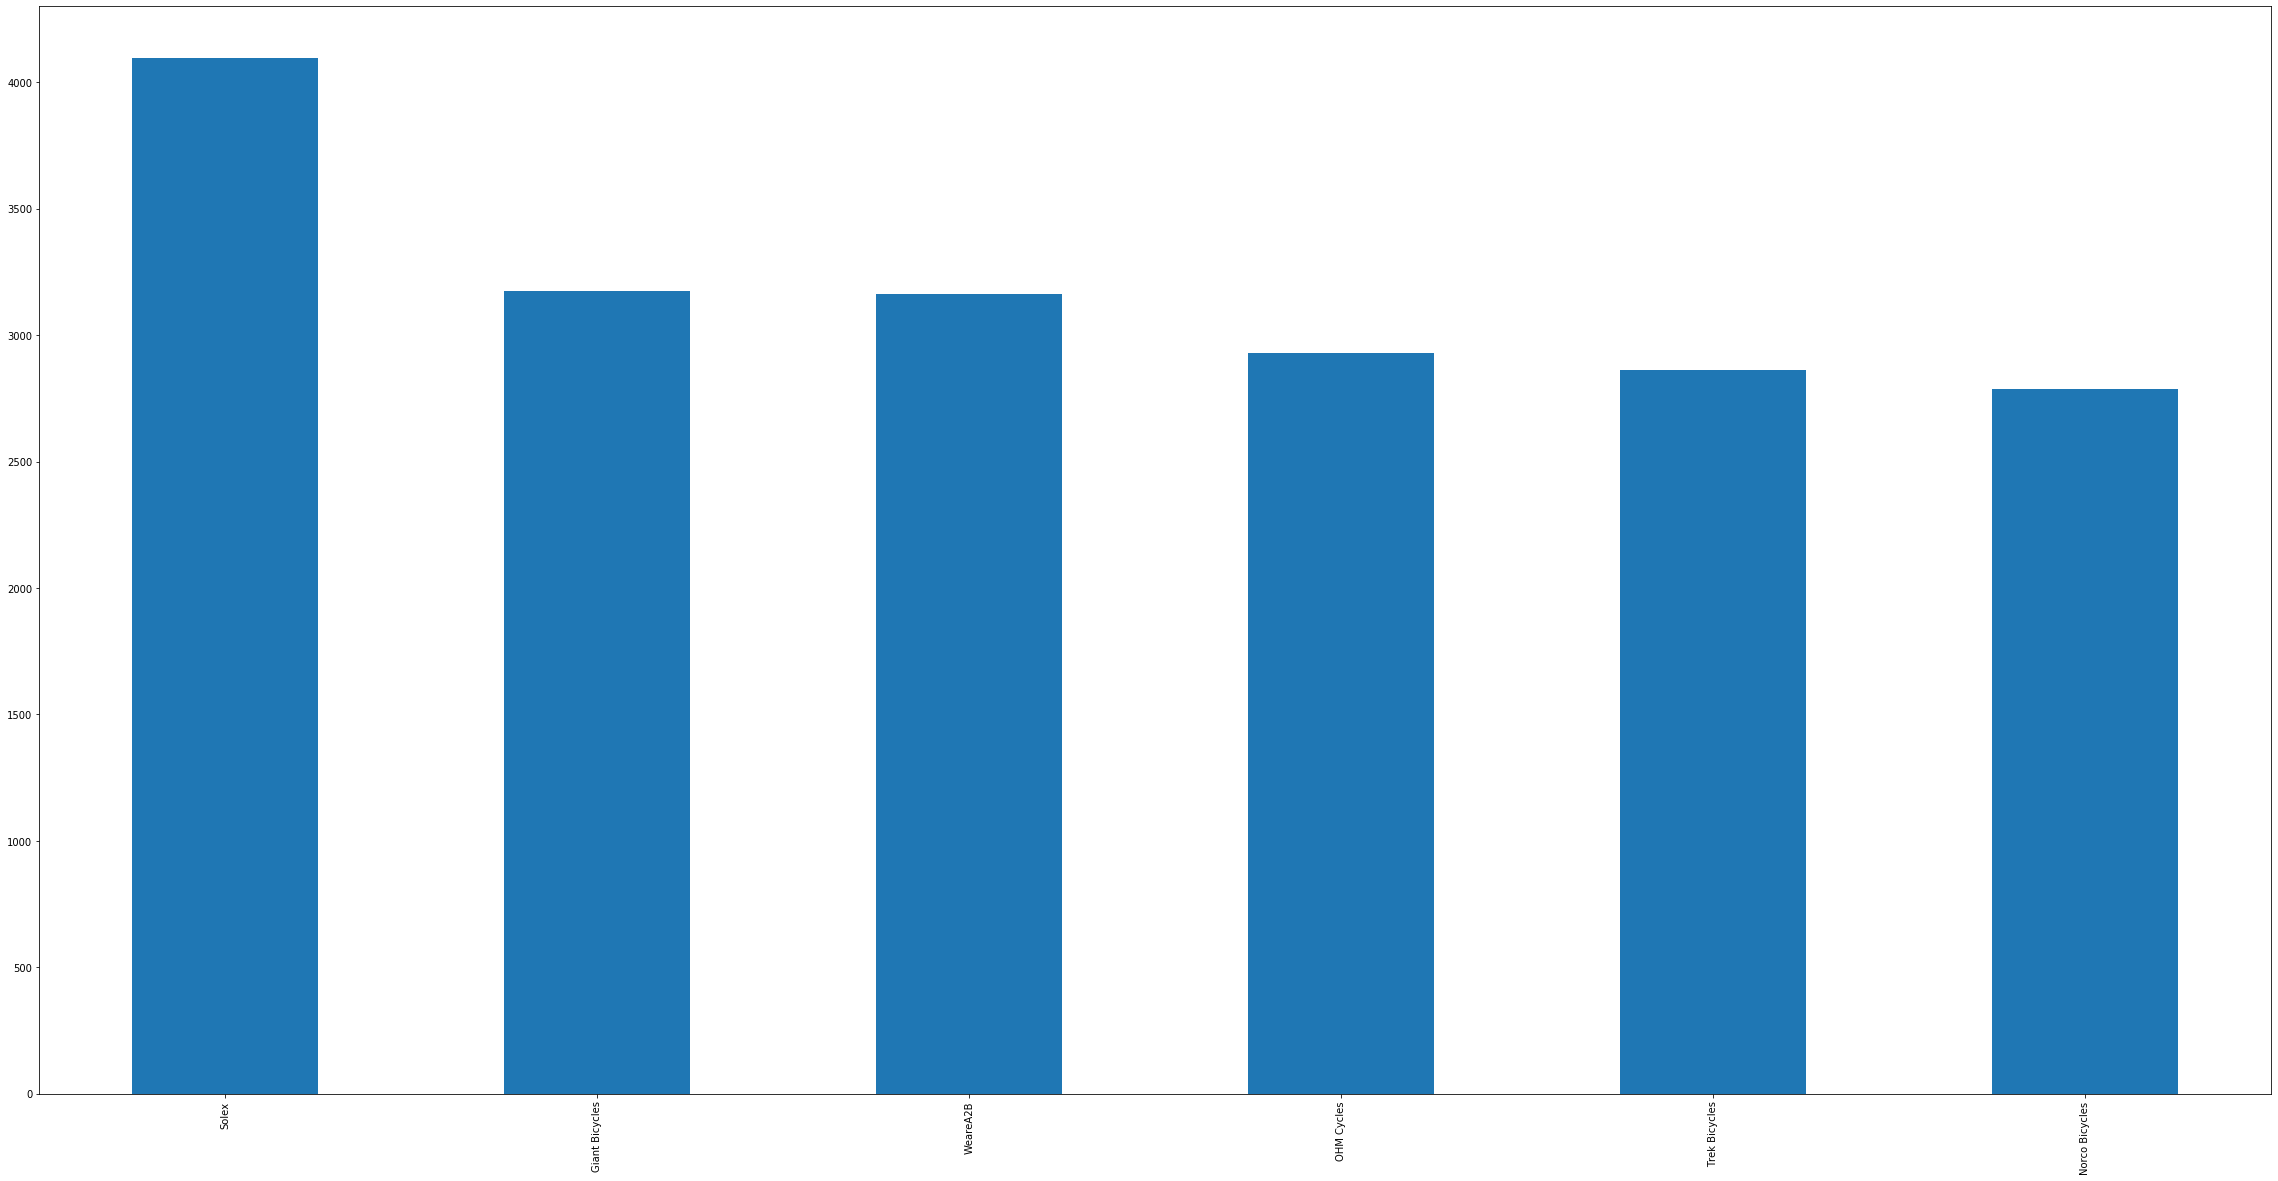

In [80]:
brand = Data_glance(transactions, 'brand')
public_method_names = [method for method in dir(brand) if callable(getattr(brand, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(brand, method)()  # call

__9. product_line__

Unique Values: ['Standard' 'Road' 'Mountain' 'Touring']

Value counts:
Standard    13625
Road         3804
Touring      1173
Mountain      410
Name: product_line, dtype: int64



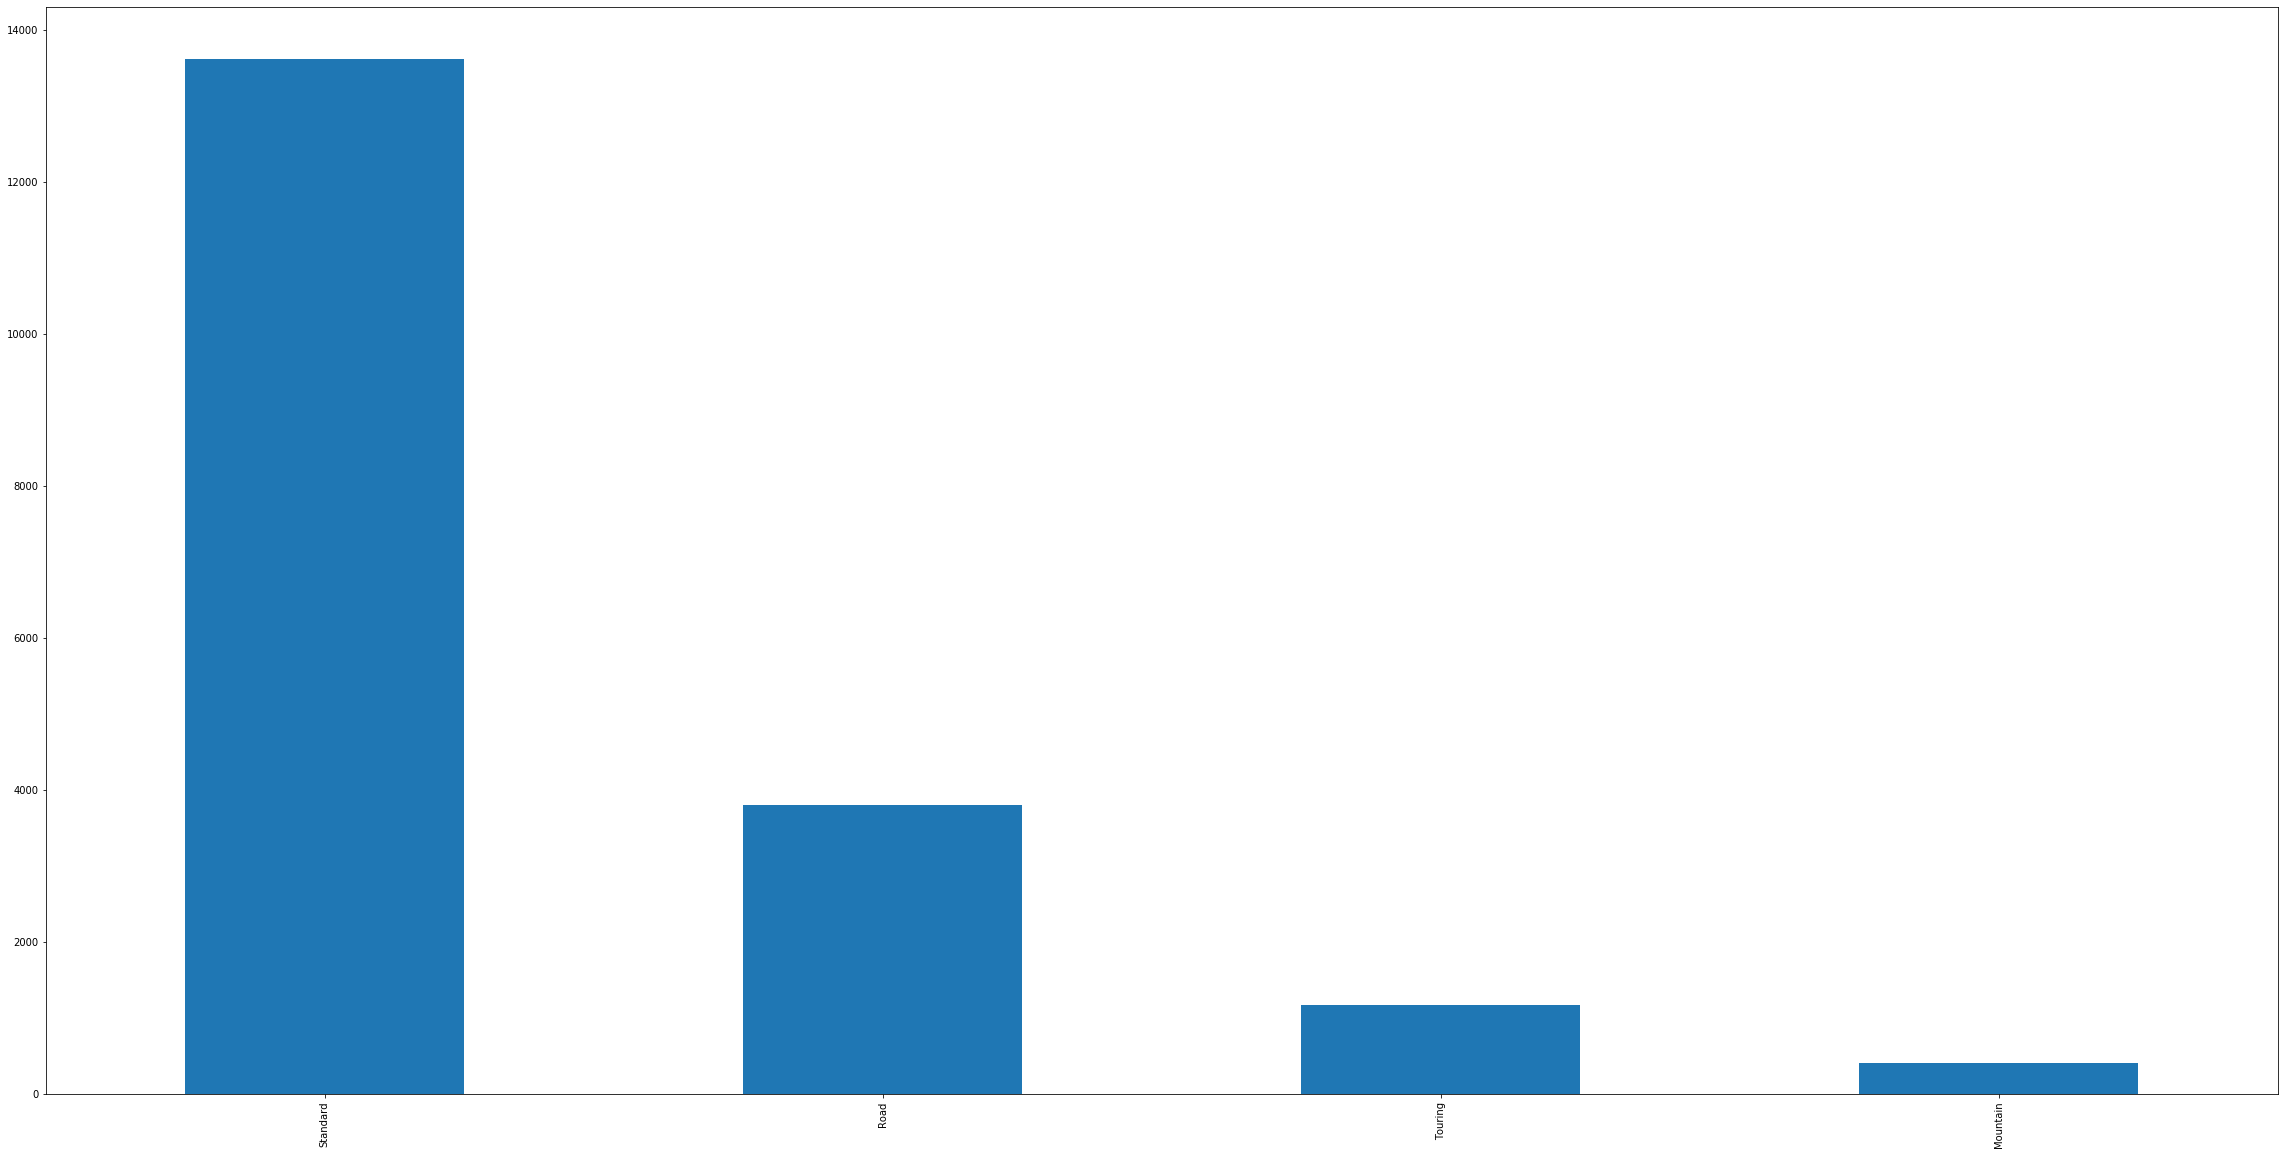

In [81]:
product_line = Data_glance(transactions, 'product_line')
public_method_names = [method for method in dir(product_line) if callable(getattr(product_line, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(product_line, method)()  # call

__10. product_line__

Unique Values: ['Standard' 'Road' 'Mountain' 'Touring']

Value counts:
Standard    13625
Road         3804
Touring      1173
Mountain      410
Name: product_line, dtype: int64



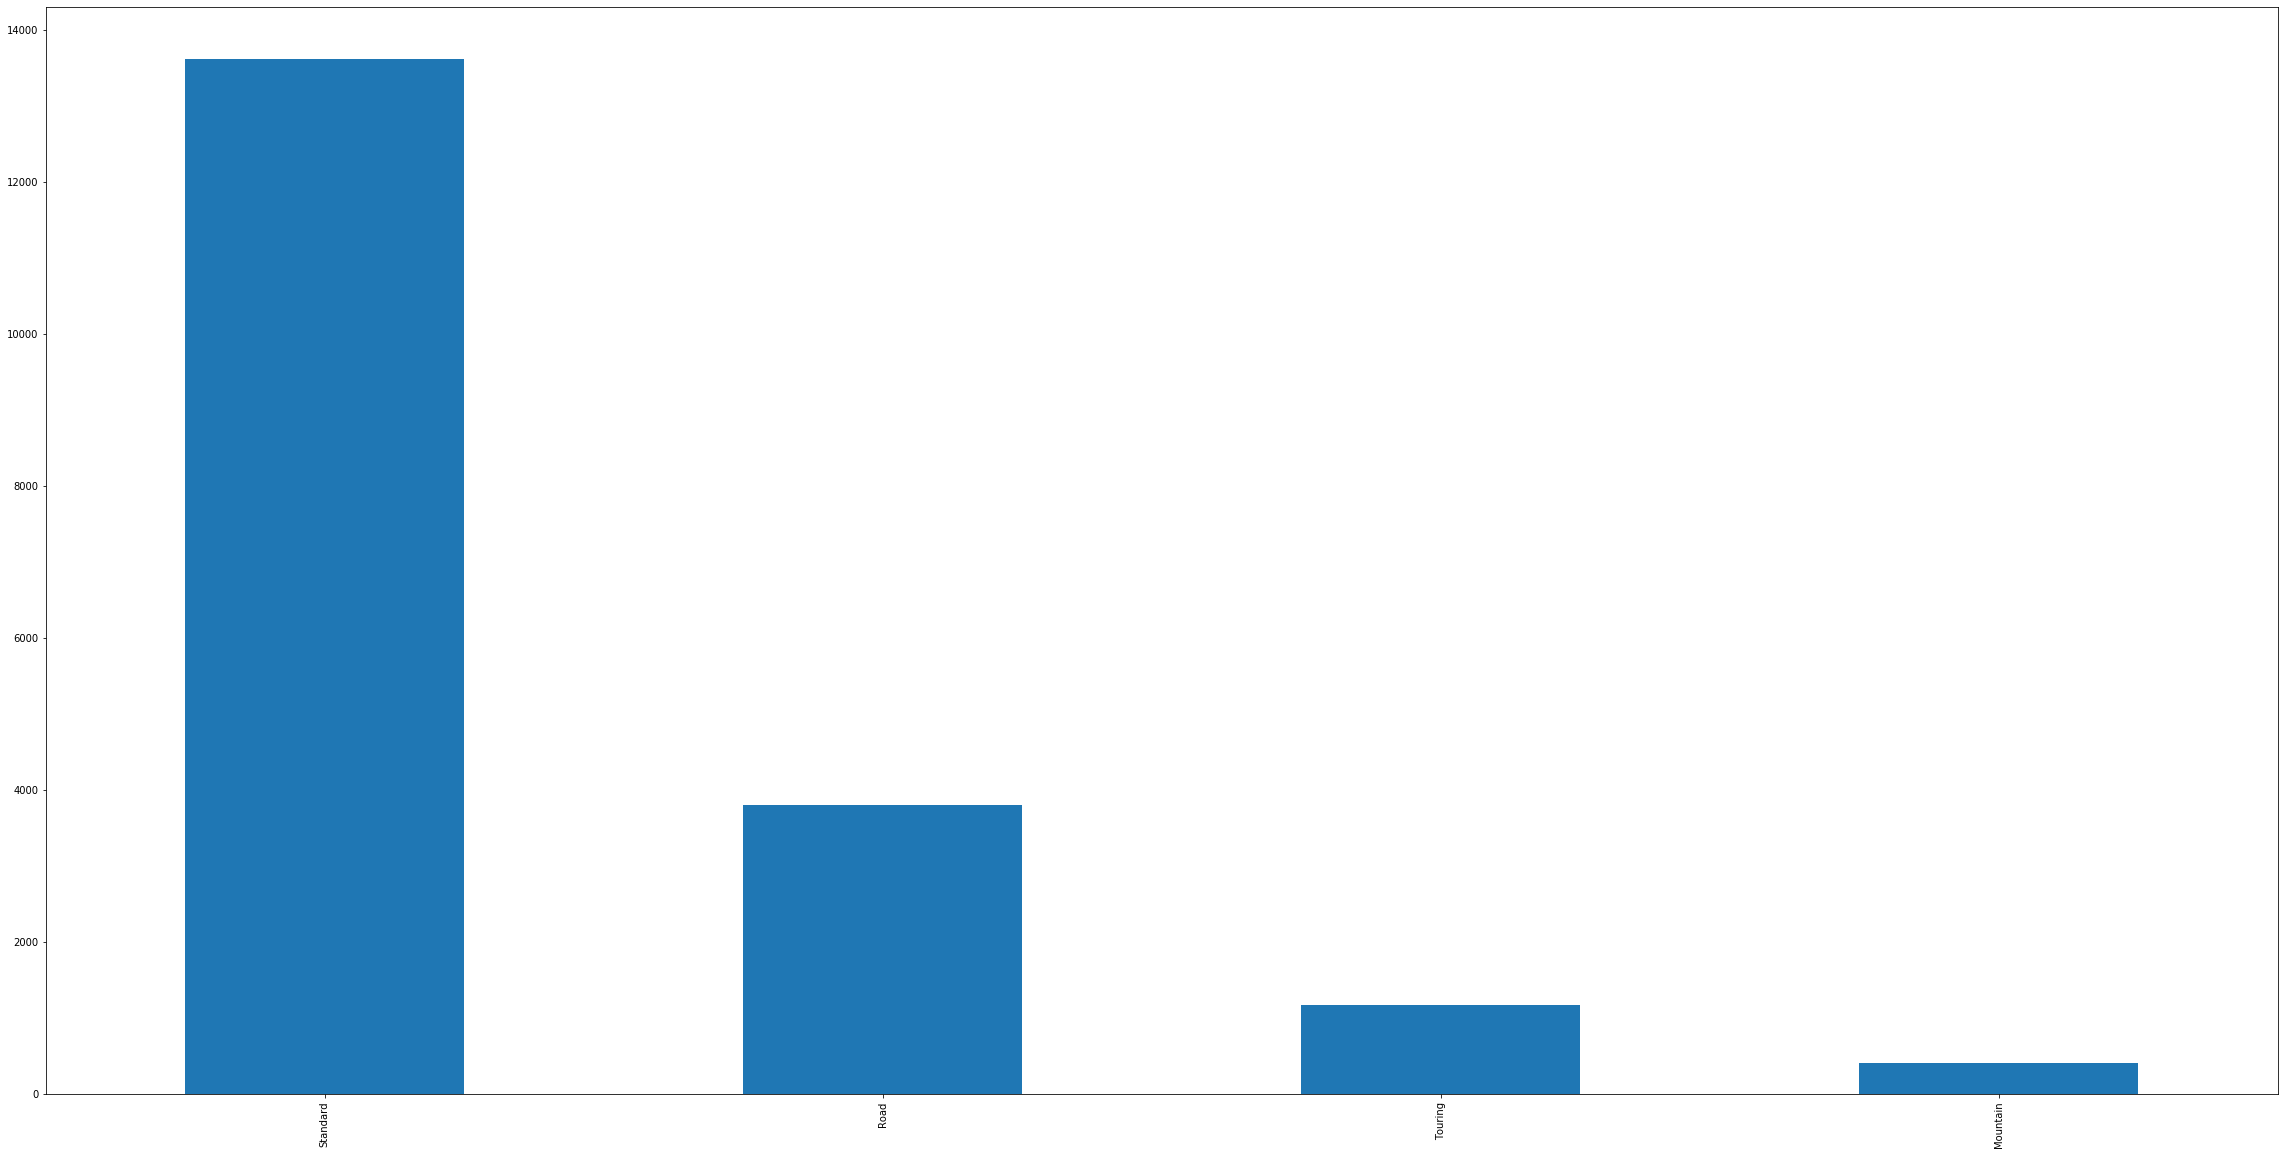

In [82]:
product_line = Data_glance(transactions, 'product_line')
public_method_names = [method for method in dir(product_line) if callable(getattr(product_line, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(product_line, method)()  # call

__11. product_class__

Unique Values: ['medium' 'low' 'high']

Value counts:
medium    13266
high       2890
low        2856
Name: product_class, dtype: int64



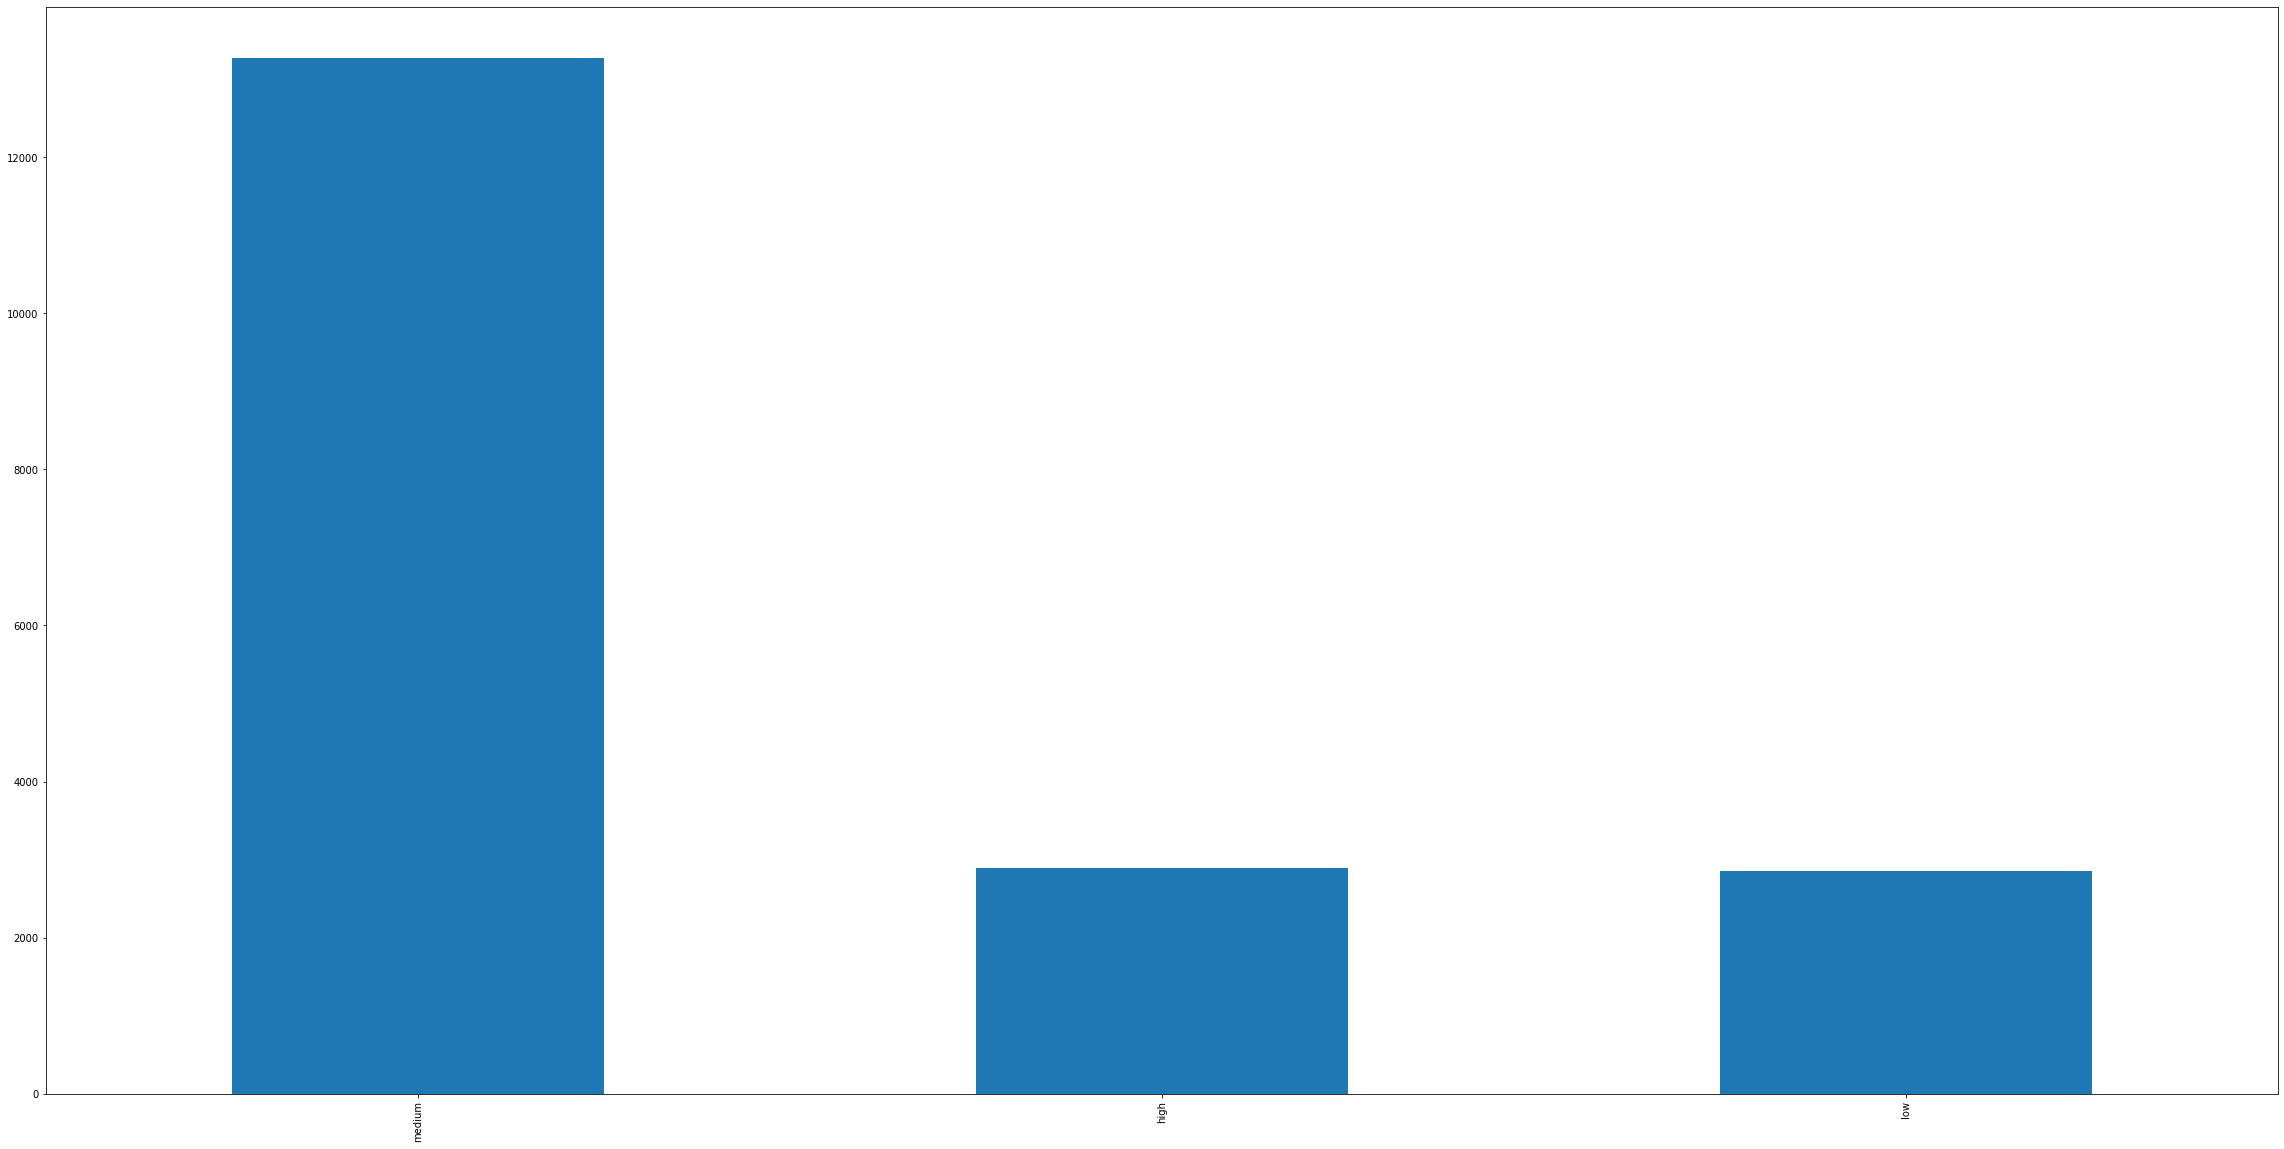

In [83]:
product_class = Data_glance(transactions, 'product_class')
public_method_names = [method for method in dir(product_class) if callable(getattr(product_class, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(product_class, method)()  # call

__12. product_size__

Unique Values: ['medium' 'large' 'small']

Value counts:
medium    12489
large      3811
small      2712
Name: product_size, dtype: int64



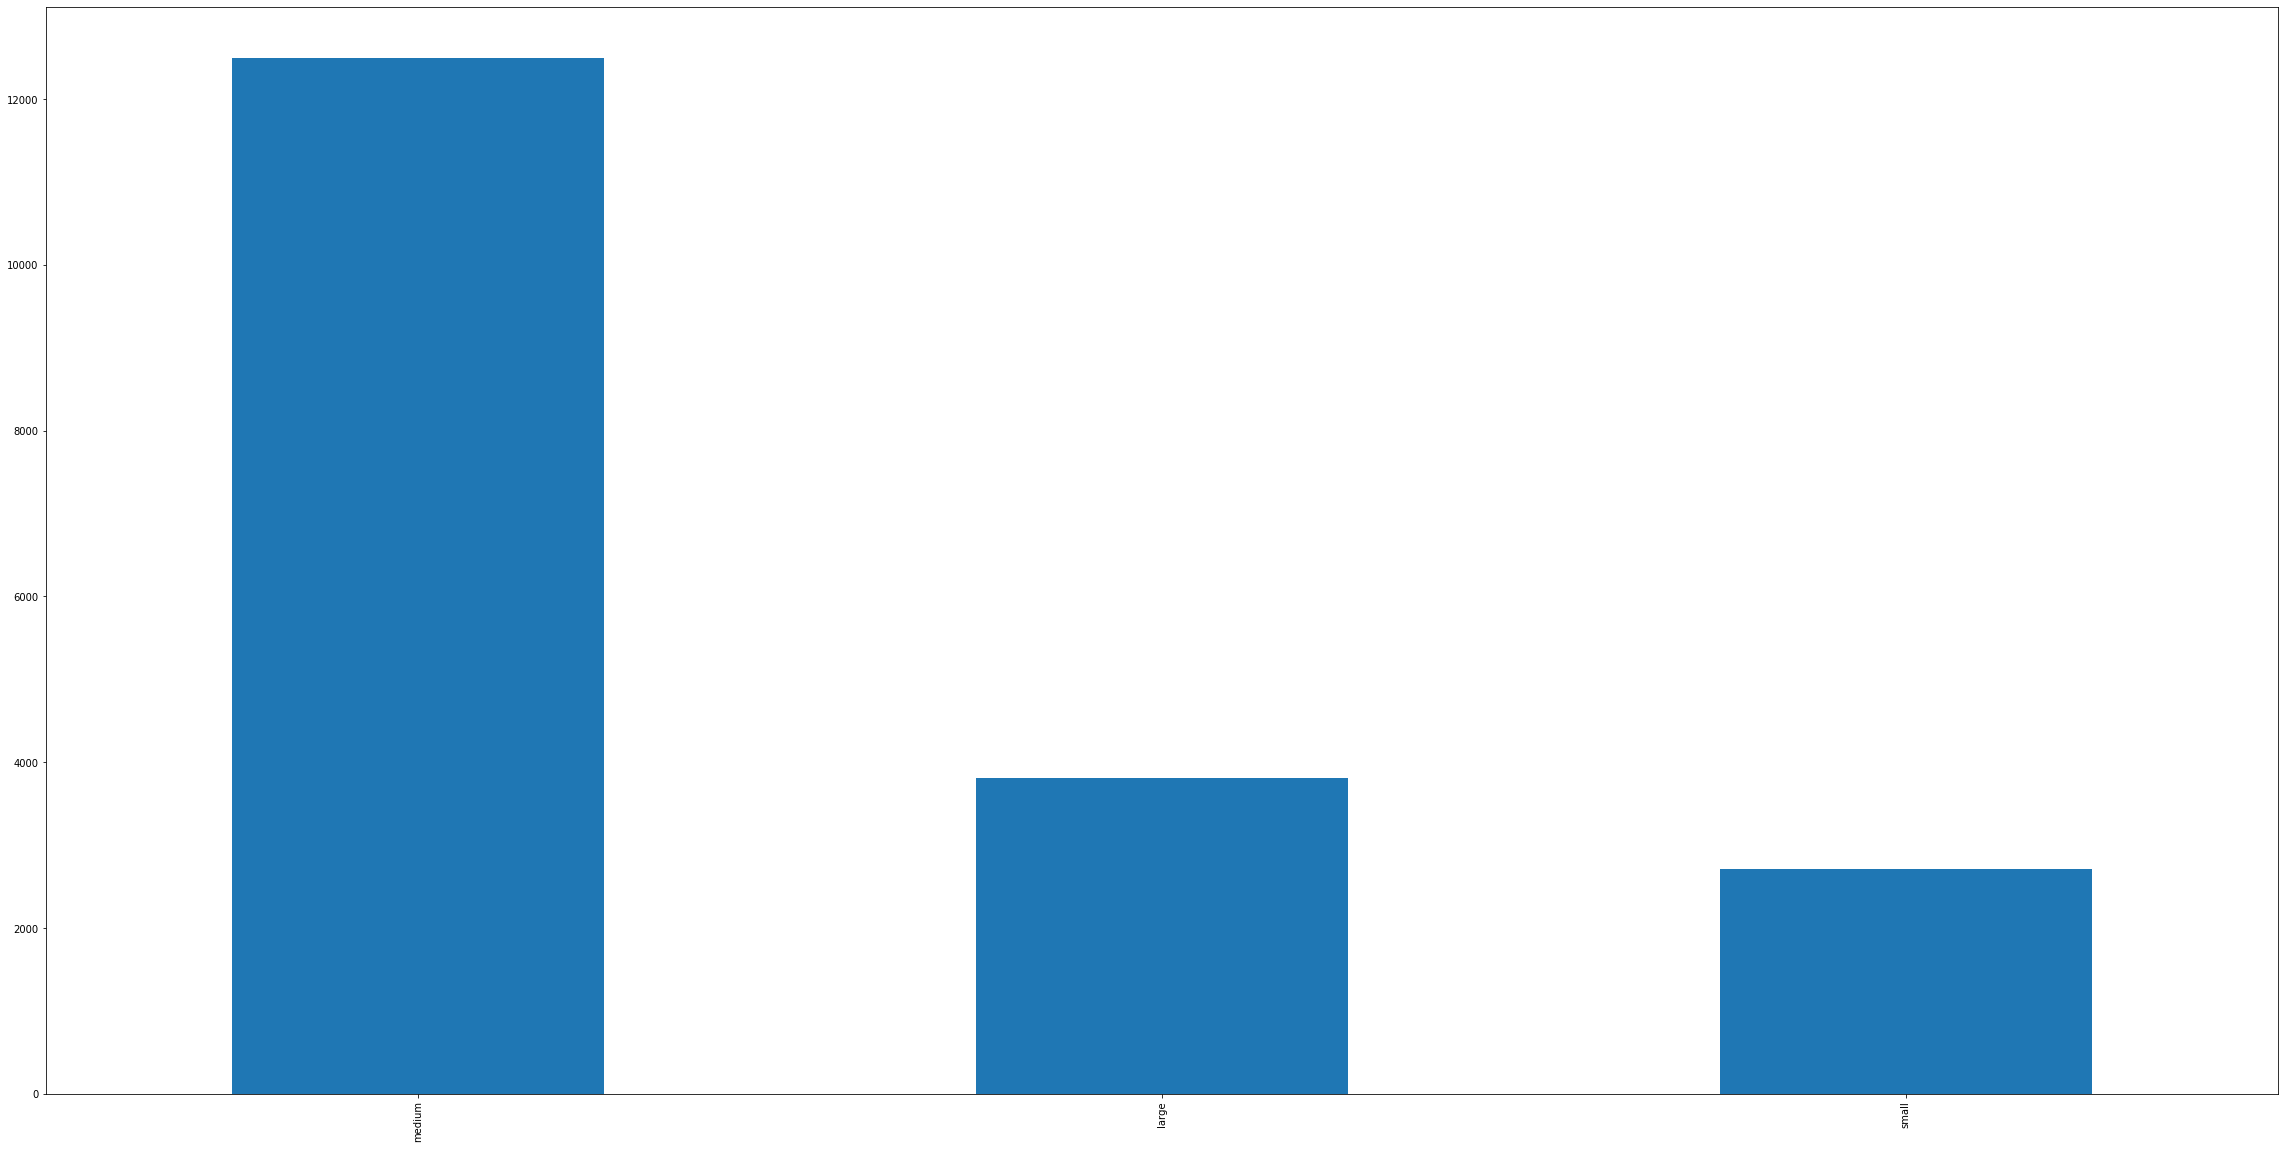

In [84]:
product_size = Data_glance(transactions, 'product_size')
public_method_names = [method for method in dir(product_size) if callable(getattr(product_size, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(product_size, method)()  # call

__13. list_price__

Unique Values: [  71.49 2091.47 1793.43 1198.46 1765.3  1538.99   60.34 1292.84 1071.23
 1231.15  574.64   71.16 1057.51 1661.92 1311.44  499.53 1362.99 1469.44
  360.4   642.31 1403.5  1720.7   544.05 1415.01 1842.92 1769.64 2083.94
 1289.85 1894.19 1163.89 1151.96  235.63  642.7  1240.31 1635.3   227.88
  363.01  100.35 1458.17   12.01 1216.14 1129.13  183.86  912.52  175.89
 1073.07 1179.    958.74  792.9   290.62  752.64  478.16 1024.66 1945.43
  441.49  569.56 1148.64  495.72 1555.58 1992.93 1812.75  945.04  358.39
 1873.97 1810.   1775.81  795.34  575.27 1172.78 1065.03 1807.45 1274.93
 1977.36 1890.39  980.37  416.98 1386.84  742.54  230.91  688.63  748.17
 1466.68  202.62 1036.59 1228.07  586.45 1762.96  533.51 2005.66 1483.2
  590.26 1703.52 1577.53 1636.9  1280.28 1777.8  1061.56  774.53  543.39
 1227.34]

Value counts:
2091.47    451
1403.50    384
71.49      267
1231.15    225
1129.13    224
          ... 
1172.78    151
358.39     132
1227.34    125
202.62     119
1036.59 

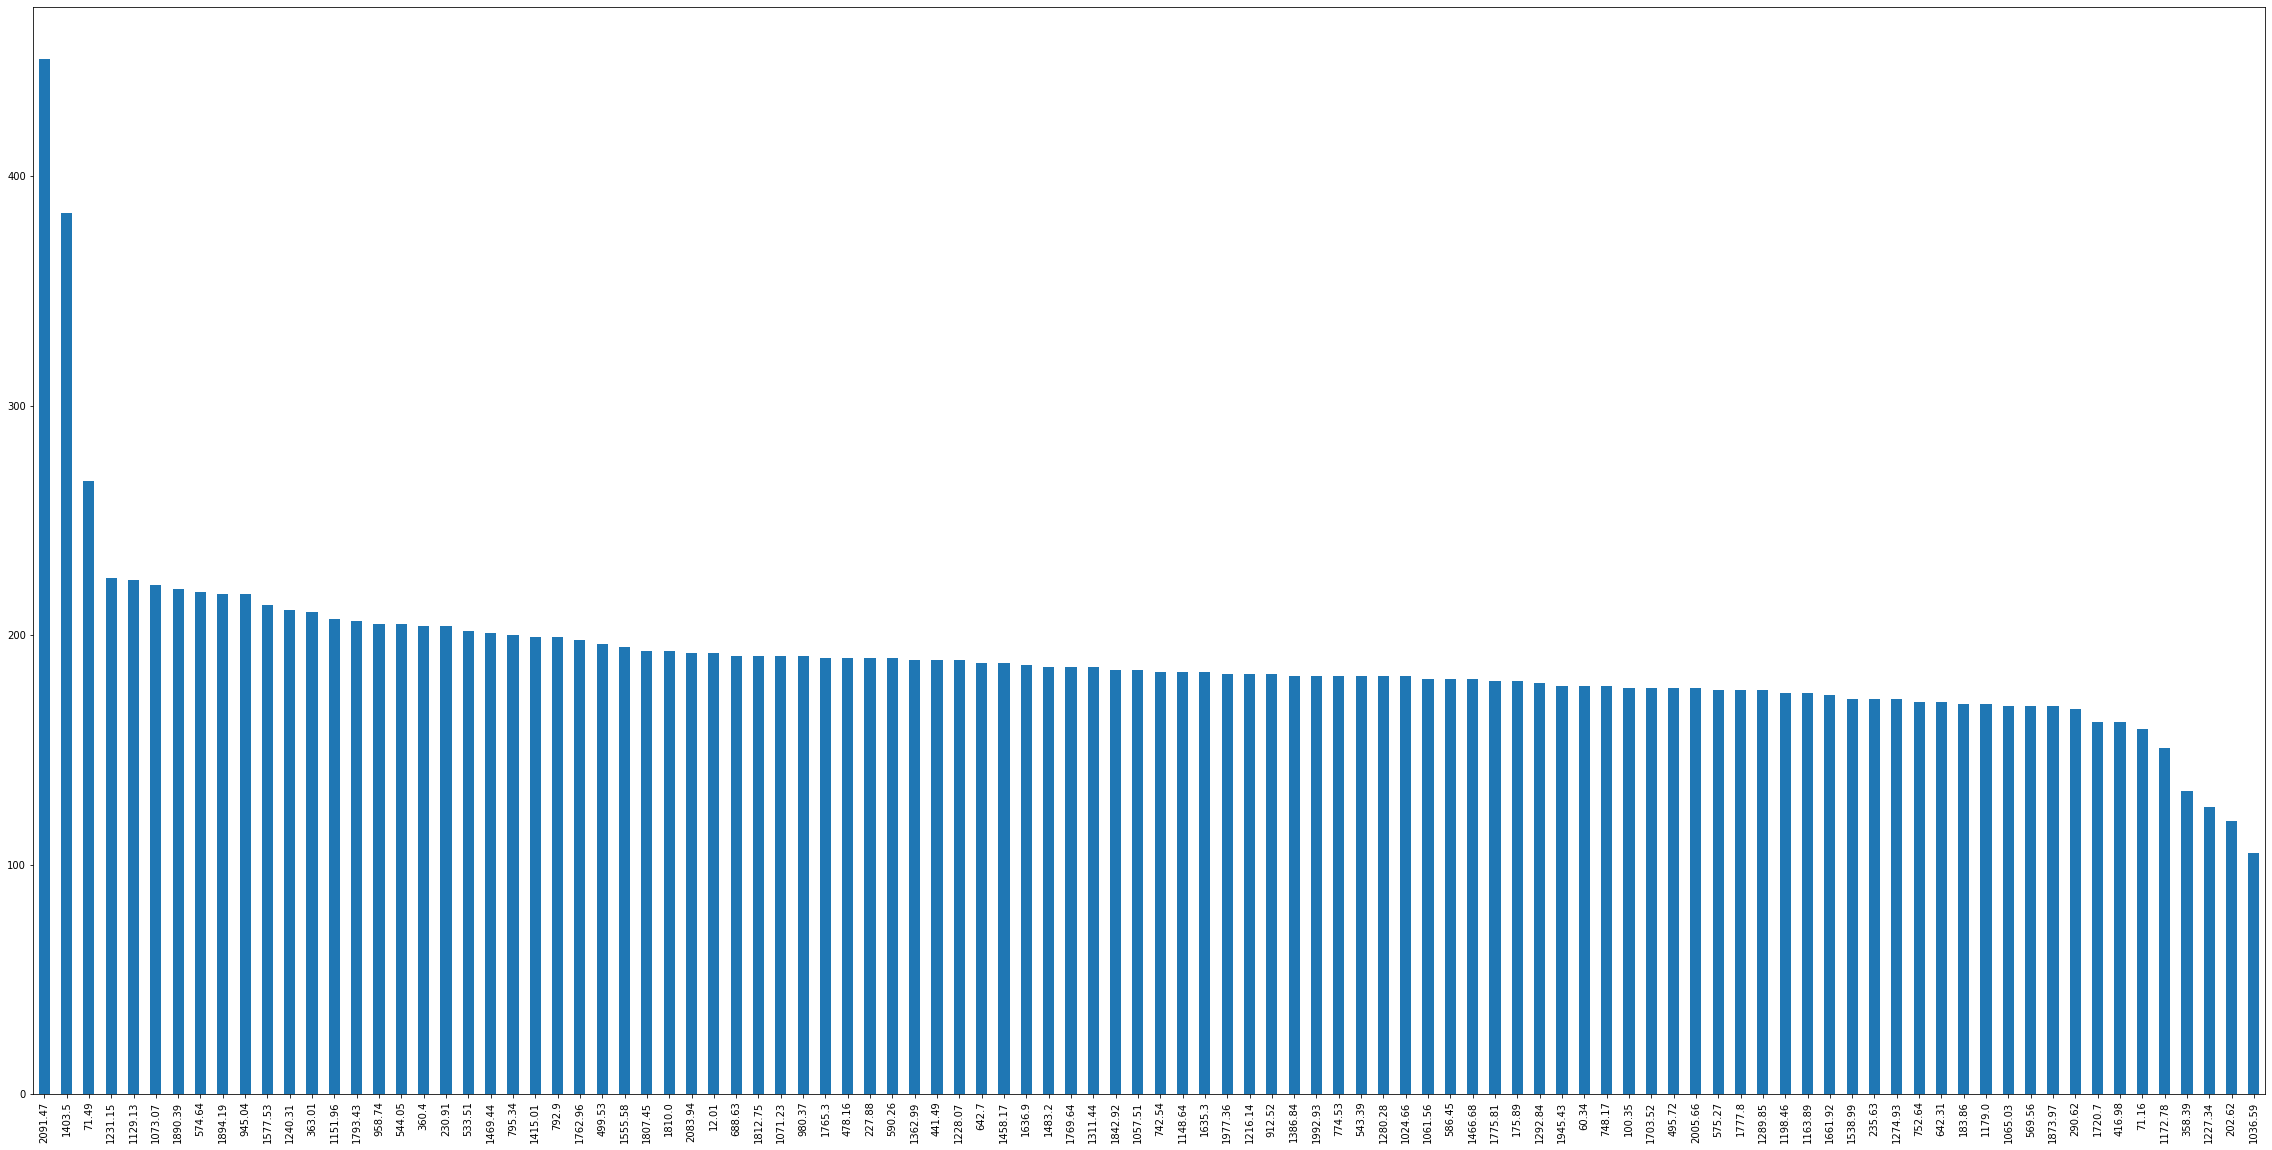

In [85]:
list_price = Data_glance(transactions, 'list_price')
public_method_names = [method for method in dir(list_price) if callable(getattr(list_price, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(list_price, method)()  # call

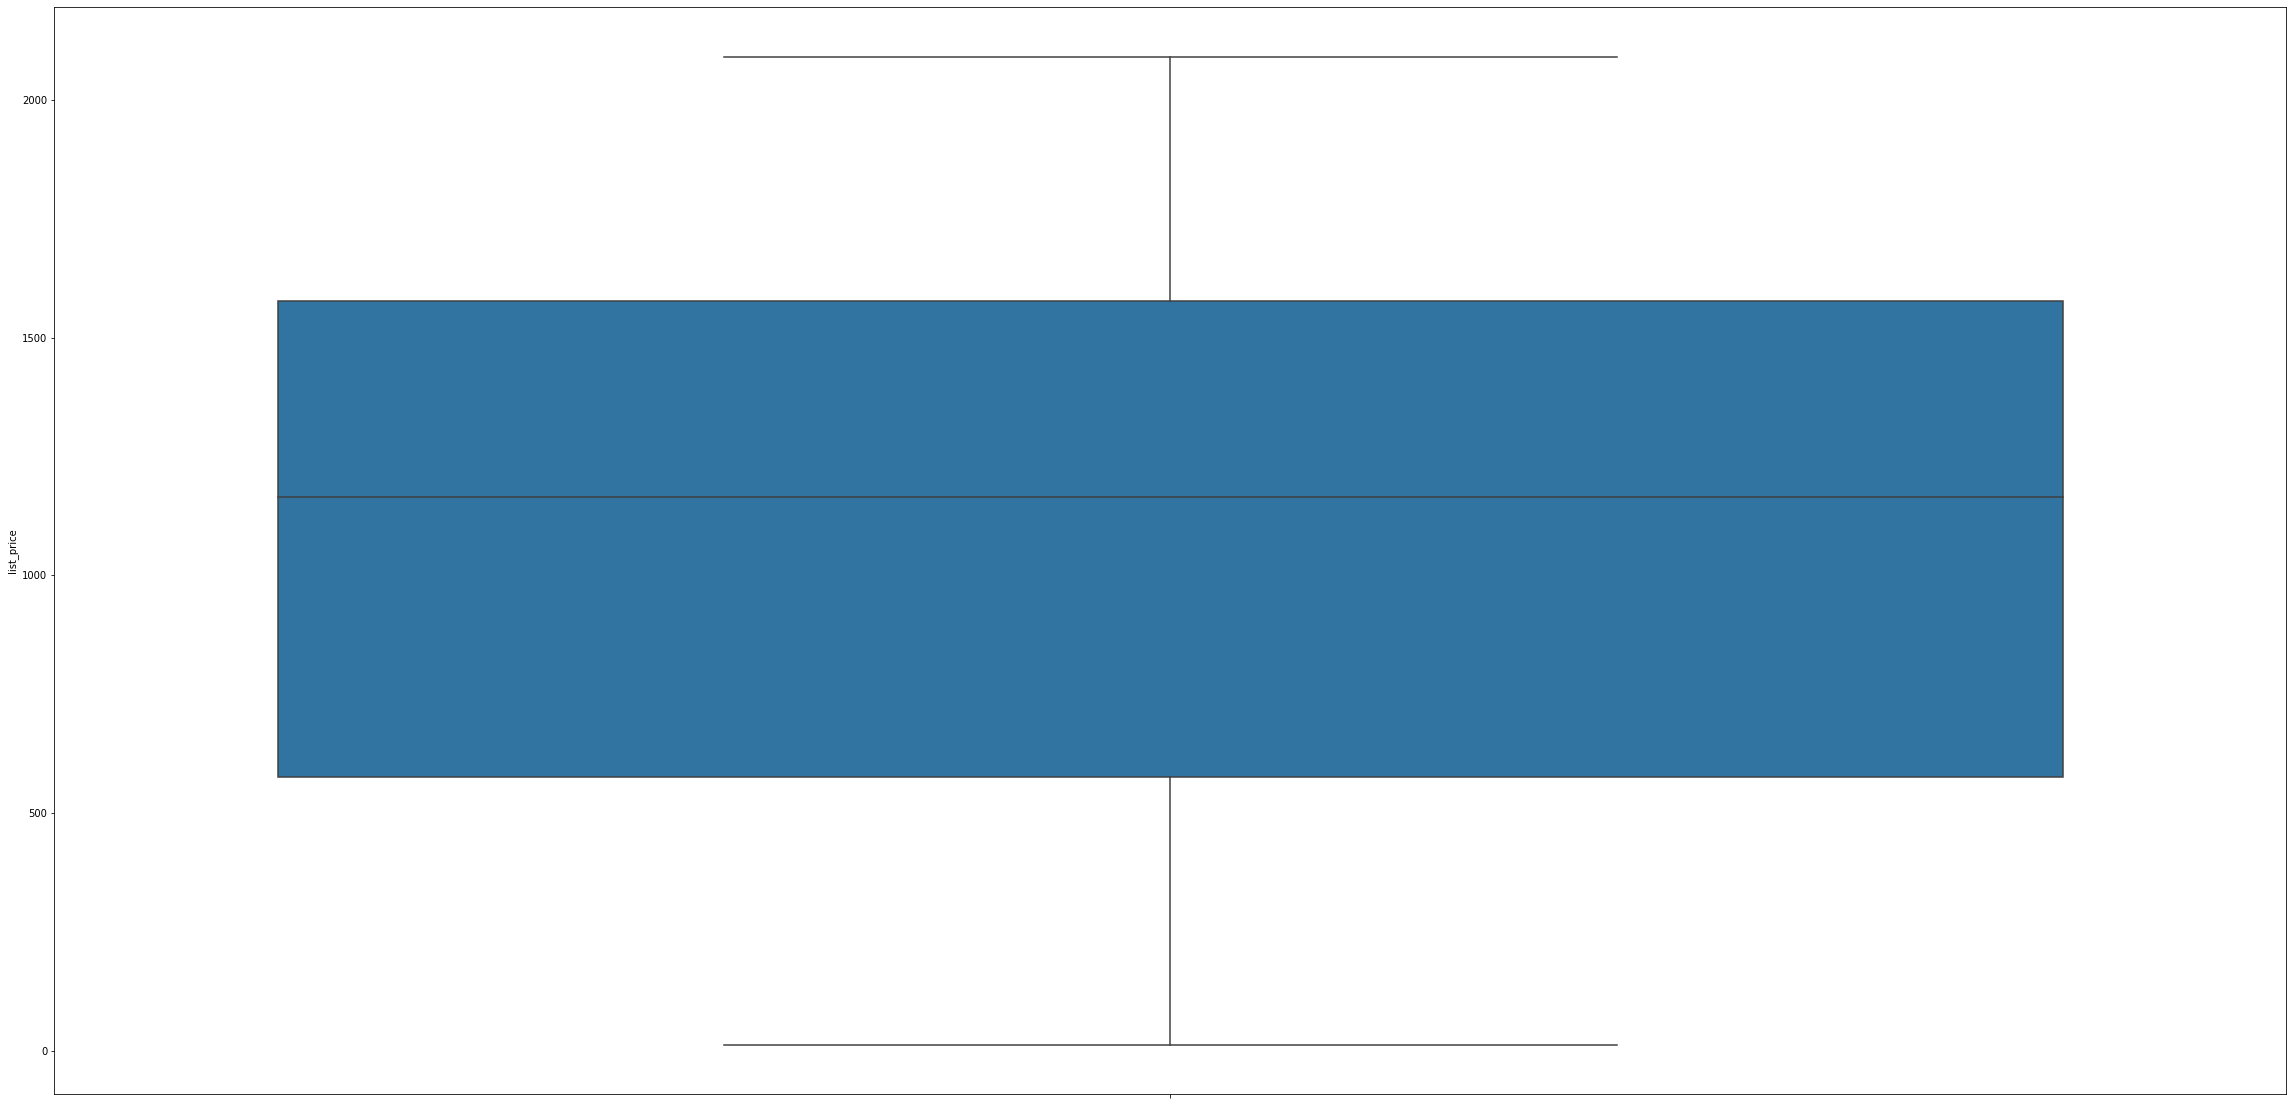

In [86]:
g_box(transactions, 'list_price')

__14. standard_cost__

Unique Values: [  53.62  388.92  248.82  381.1   709.48  829.65   45.26   13.44  380.74
  161.6   459.71   56.93  154.4  1479.11 1167.18  388.72   57.74  596.55
  270.3   513.85  954.82 1531.42  376.84 1259.36 1105.75  108.76  675.03
   74.51  598.76  589.27  649.49  125.07  211.37  795.1   993.66  136.73
  290.41   75.26  874.9     7.21 1082.36  677.48  137.9   141.4   131.92
  933.84  707.4   748.9   594.68  215.14  205.36  298.72  614.8   333.18
   84.99  528.43  689.18  297.43  818.01  762.63  582.48  507.58  215.03
  863.95 1610.9  1580.47  101.58  431.45 1043.77  230.09  778.69  764.96
 1759.85  260.14  234.43  312.74 1234.29  667.4   173.18  612.88  448.9
  363.25  151.96  206.35  400.91  521.94  950.52  400.13 1203.4    99.59
  525.33 1516.13  826.51   44.71  829.51  820.78  733.58  464.72  407.54
  770.89]

Value counts:
388.92     451
954.82     384
53.62      267
161.60     225
677.48     224
          ... 
1043.77    151
215.03     132
770.89     125
151.96     119
206.35  

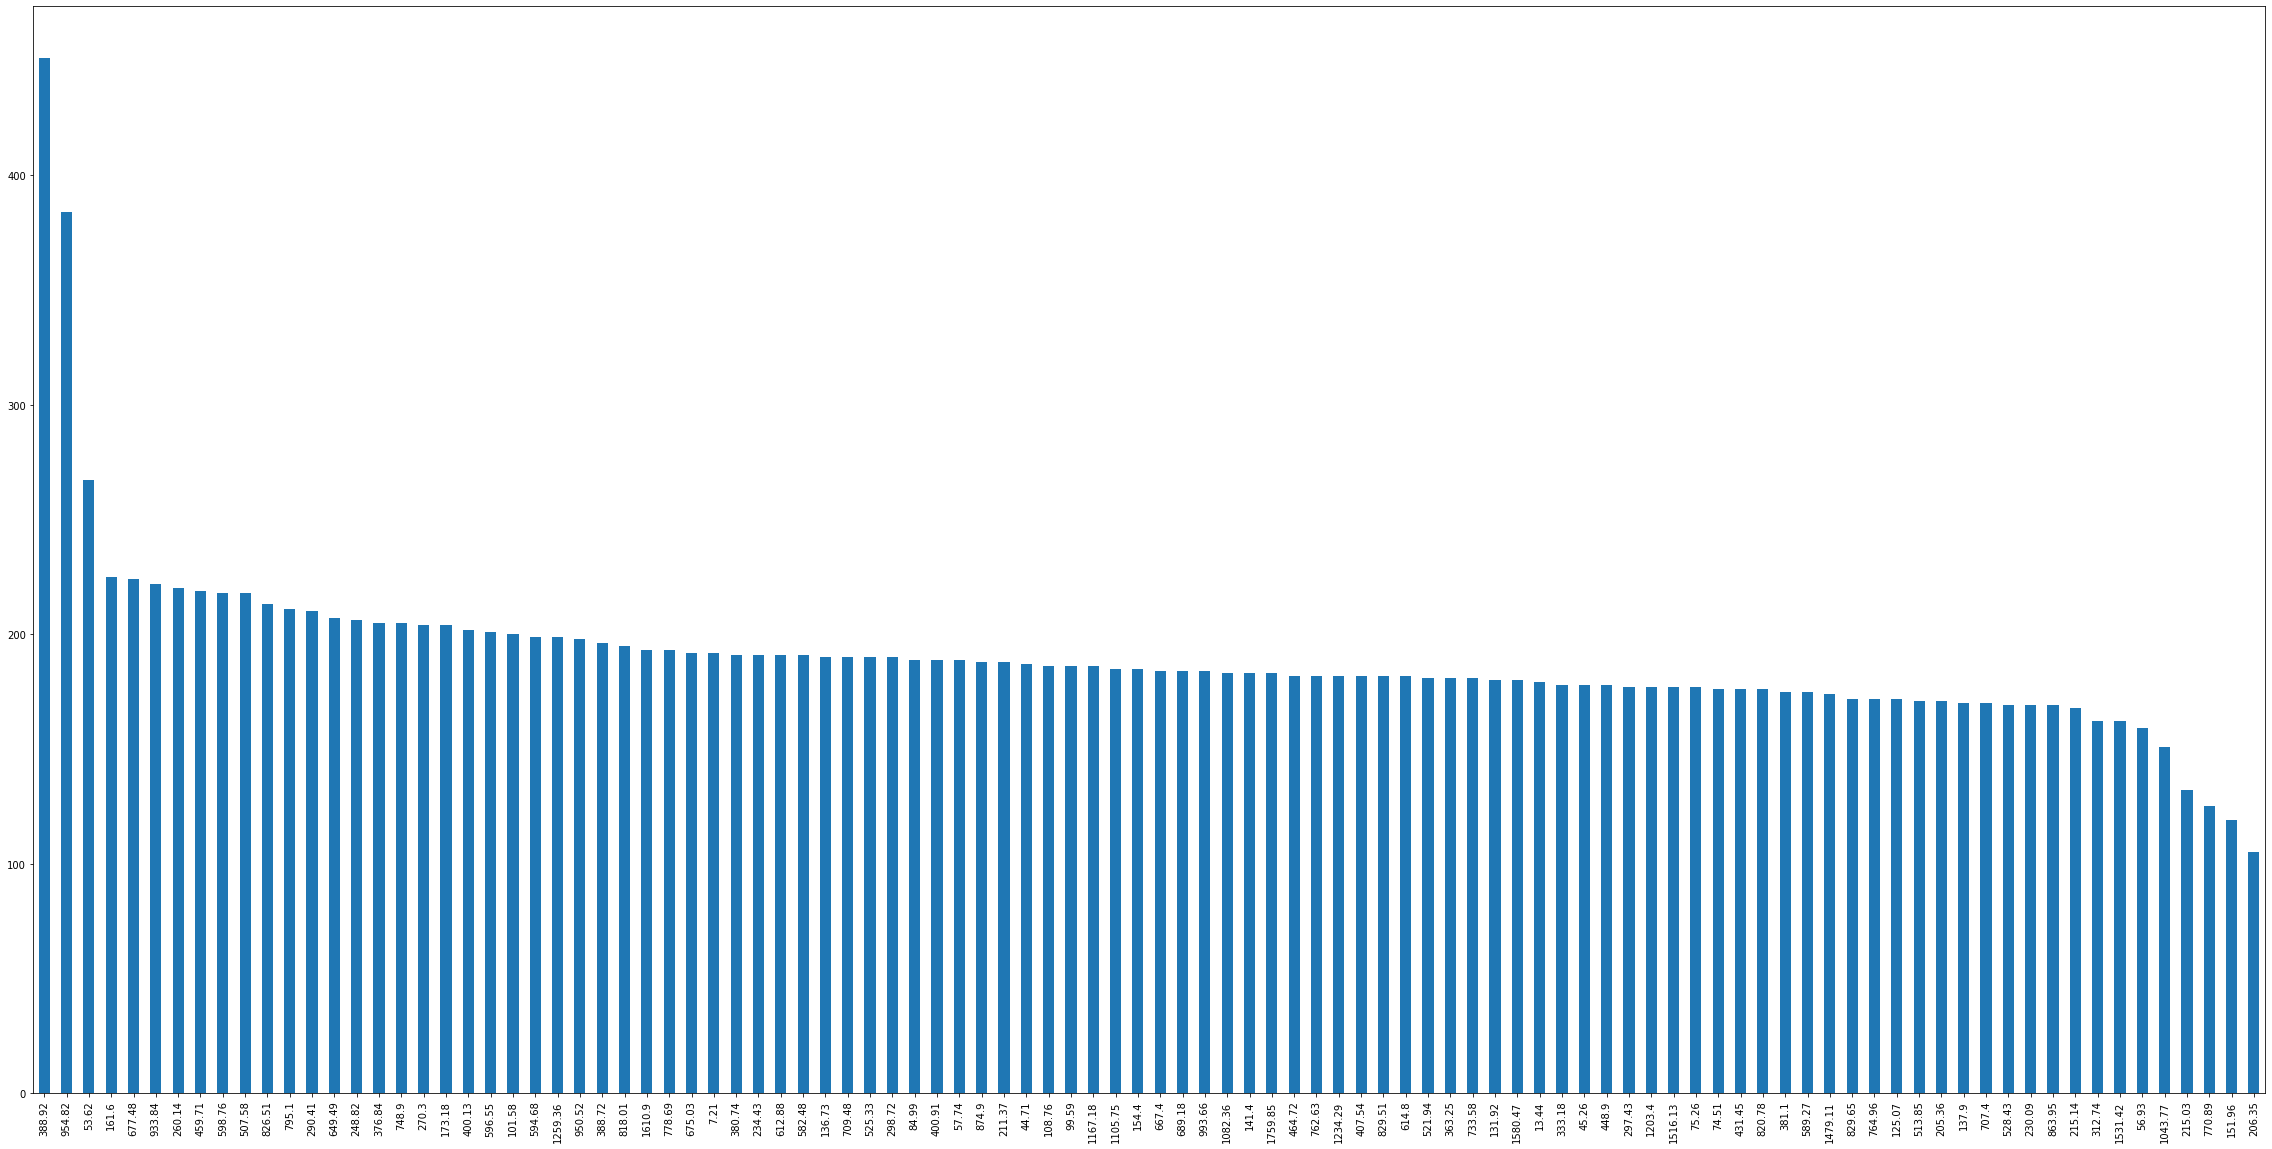

In [87]:
standard_cost = Data_glance(transactions, 'standard_cost')
public_method_names = [method for method in dir(standard_cost) if callable(getattr(standard_cost, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(standard_cost, method)()  # call

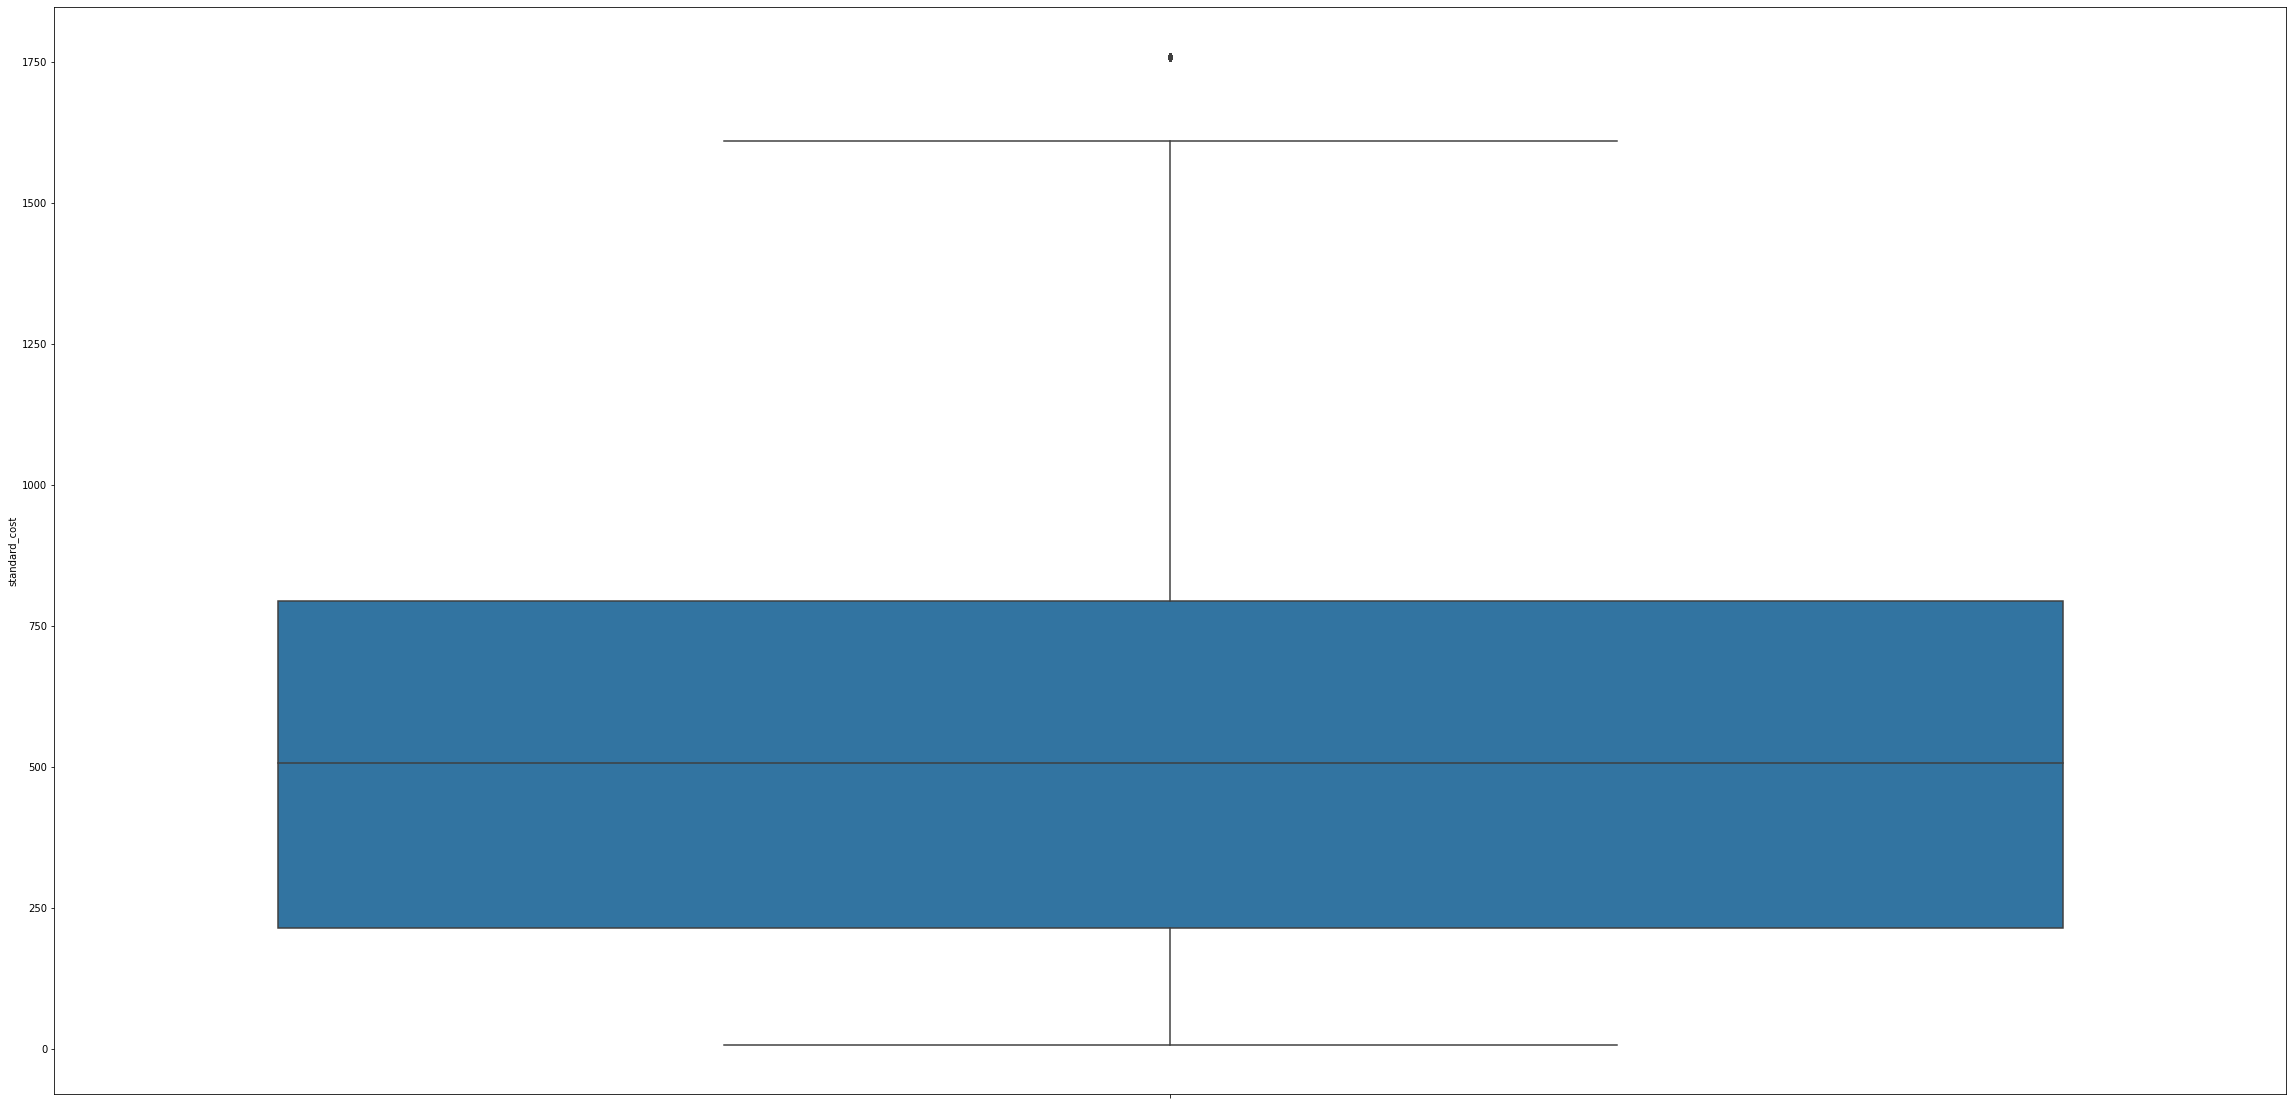

In [88]:
g_box(transactions, 'standard_cost')

__15. product_first_sold_date__

Unique Values: [41245. 41701. 36361. 36145. 42226. 39031. 34165. 39915. 33455. 38216.
 40784. 42172. 34527. 34586. 38193. 37873. 33888. 37337. 36334. 42145.
 42404. 34079. 41047. 42560. 42710. 41922. 37539. 42688. 38991. 38647.
 37874. 34996. 33549. 38693. 37668. 41533. 41009. 38206. 40553. 39427.
 38482. 35470. 41434. 36367. 38750. 34244. 42696. 38258. 41167. 40672.
 35707. 42295. 33552. 35667. 33879. 40670. 37626. 38339. 40303. 34143.
 35160. 36668. 36498. 34071. 40649. 36146. 42105. 34115. 35052. 33364.
 42218. 41345. 37823. 33429. 38859. 36833. 37499. 41064. 33259. 35560.
 37838. 37698. 35378. 38573. 38002. 39880. 41848. 40487. 40336. 40618.
 34170. 40410. 42458. 39298. 39526. 37220. 37659. 40779. 34556. 35455.]

Value counts:
33879.0    223
41064.0    219
39880.0    216
37823.0    213
38216.0    213
          ... 
42404.0    164
41848.0    163
41922.0    159
37659.0    159
34586.0    151
Name: product_first_sold_date, Length: 100, dtype: int64



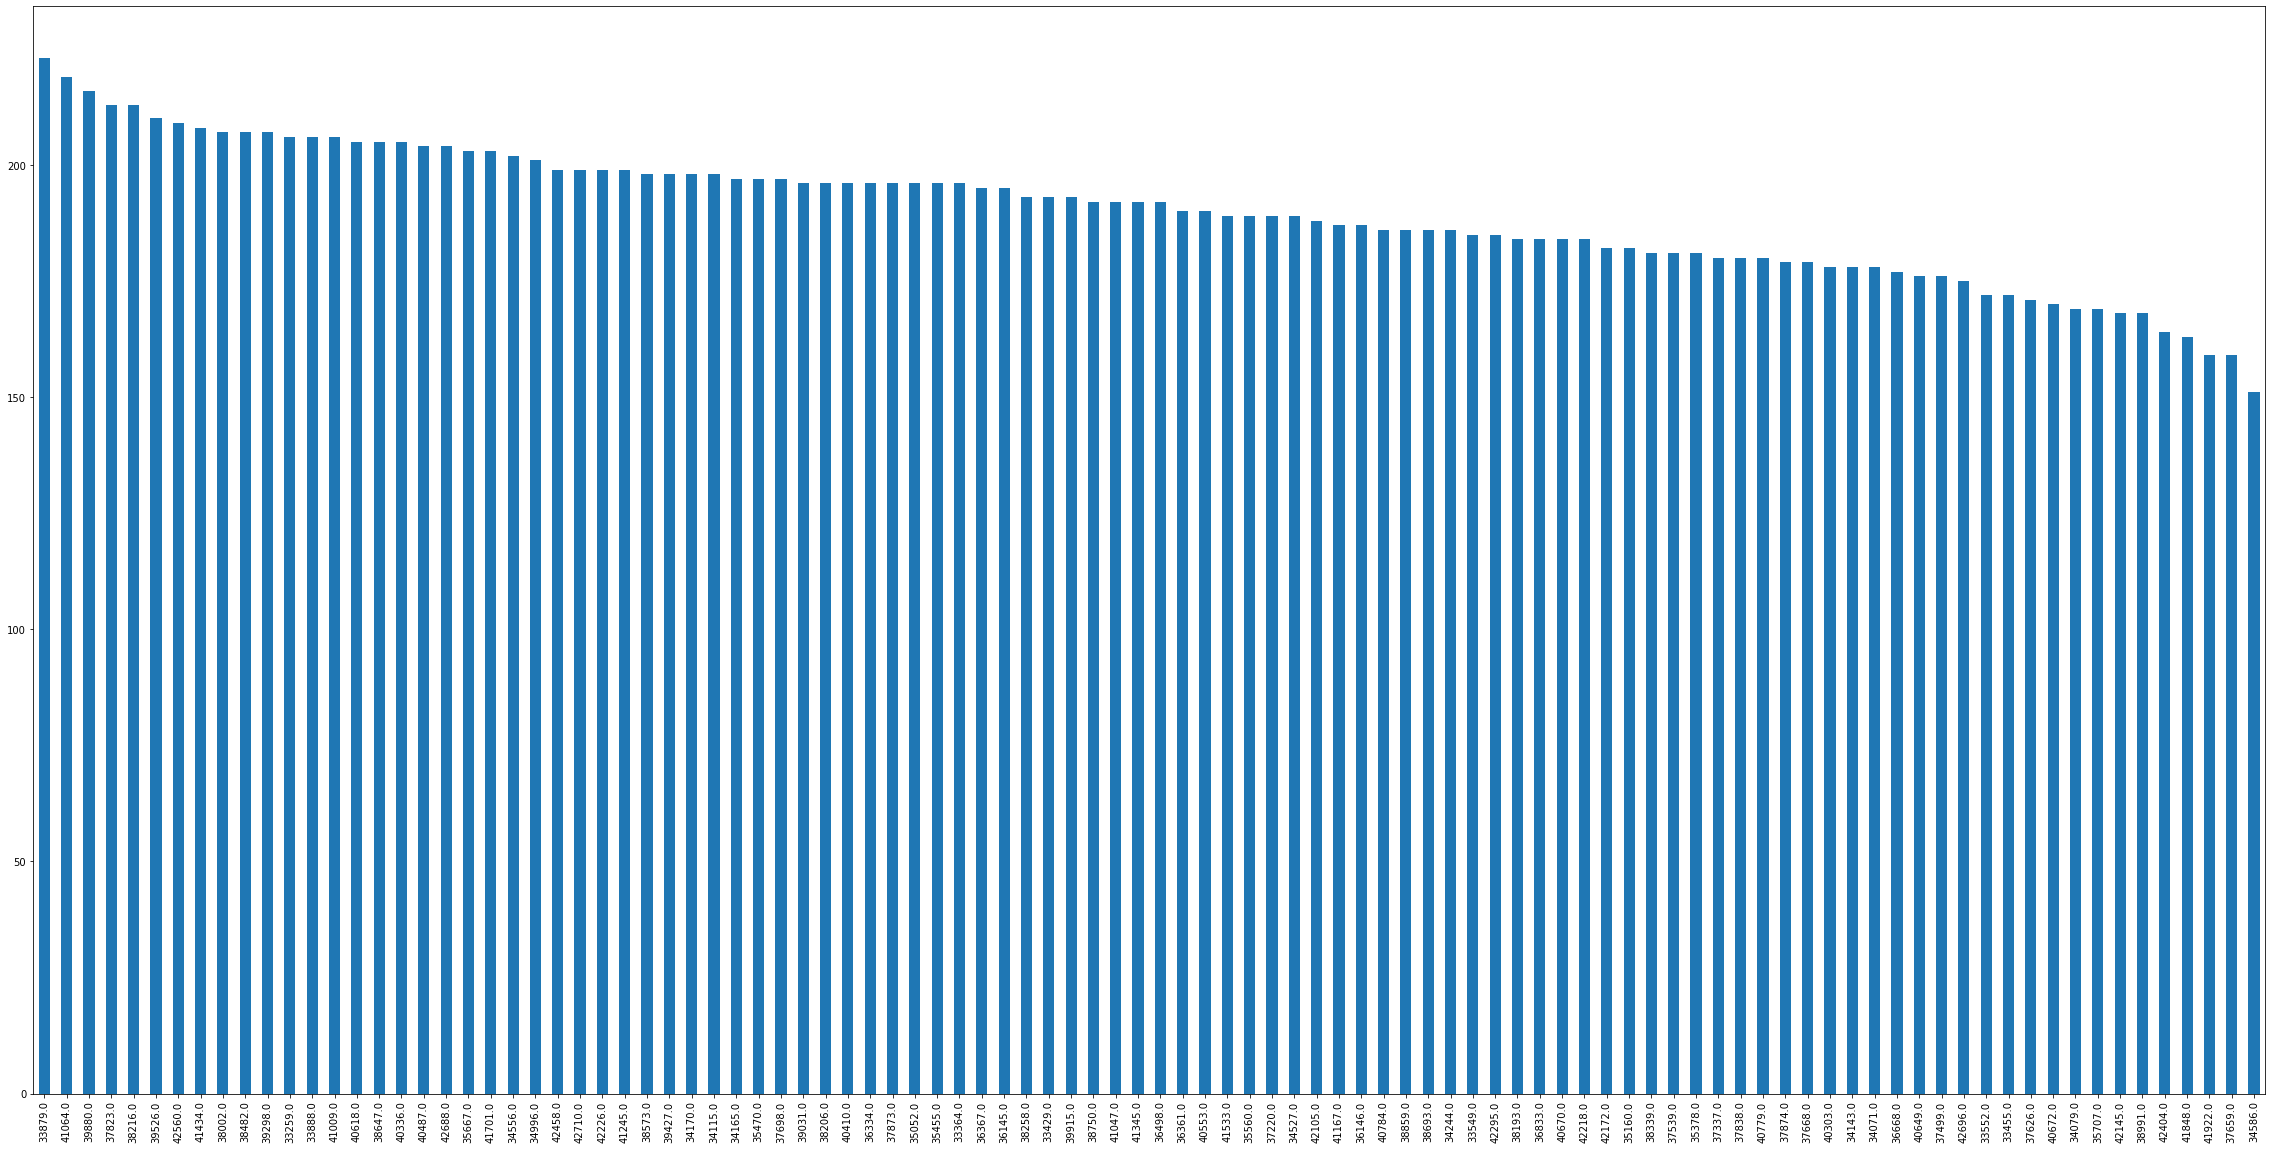

In [89]:
product_first_sold_date = Data_glance(transactions, 'product_first_sold_date')
public_method_names = [method for method in dir(product_first_sold_date) if callable(getattr(product_first_sold_date, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(product_first_sold_date, method)()  # call

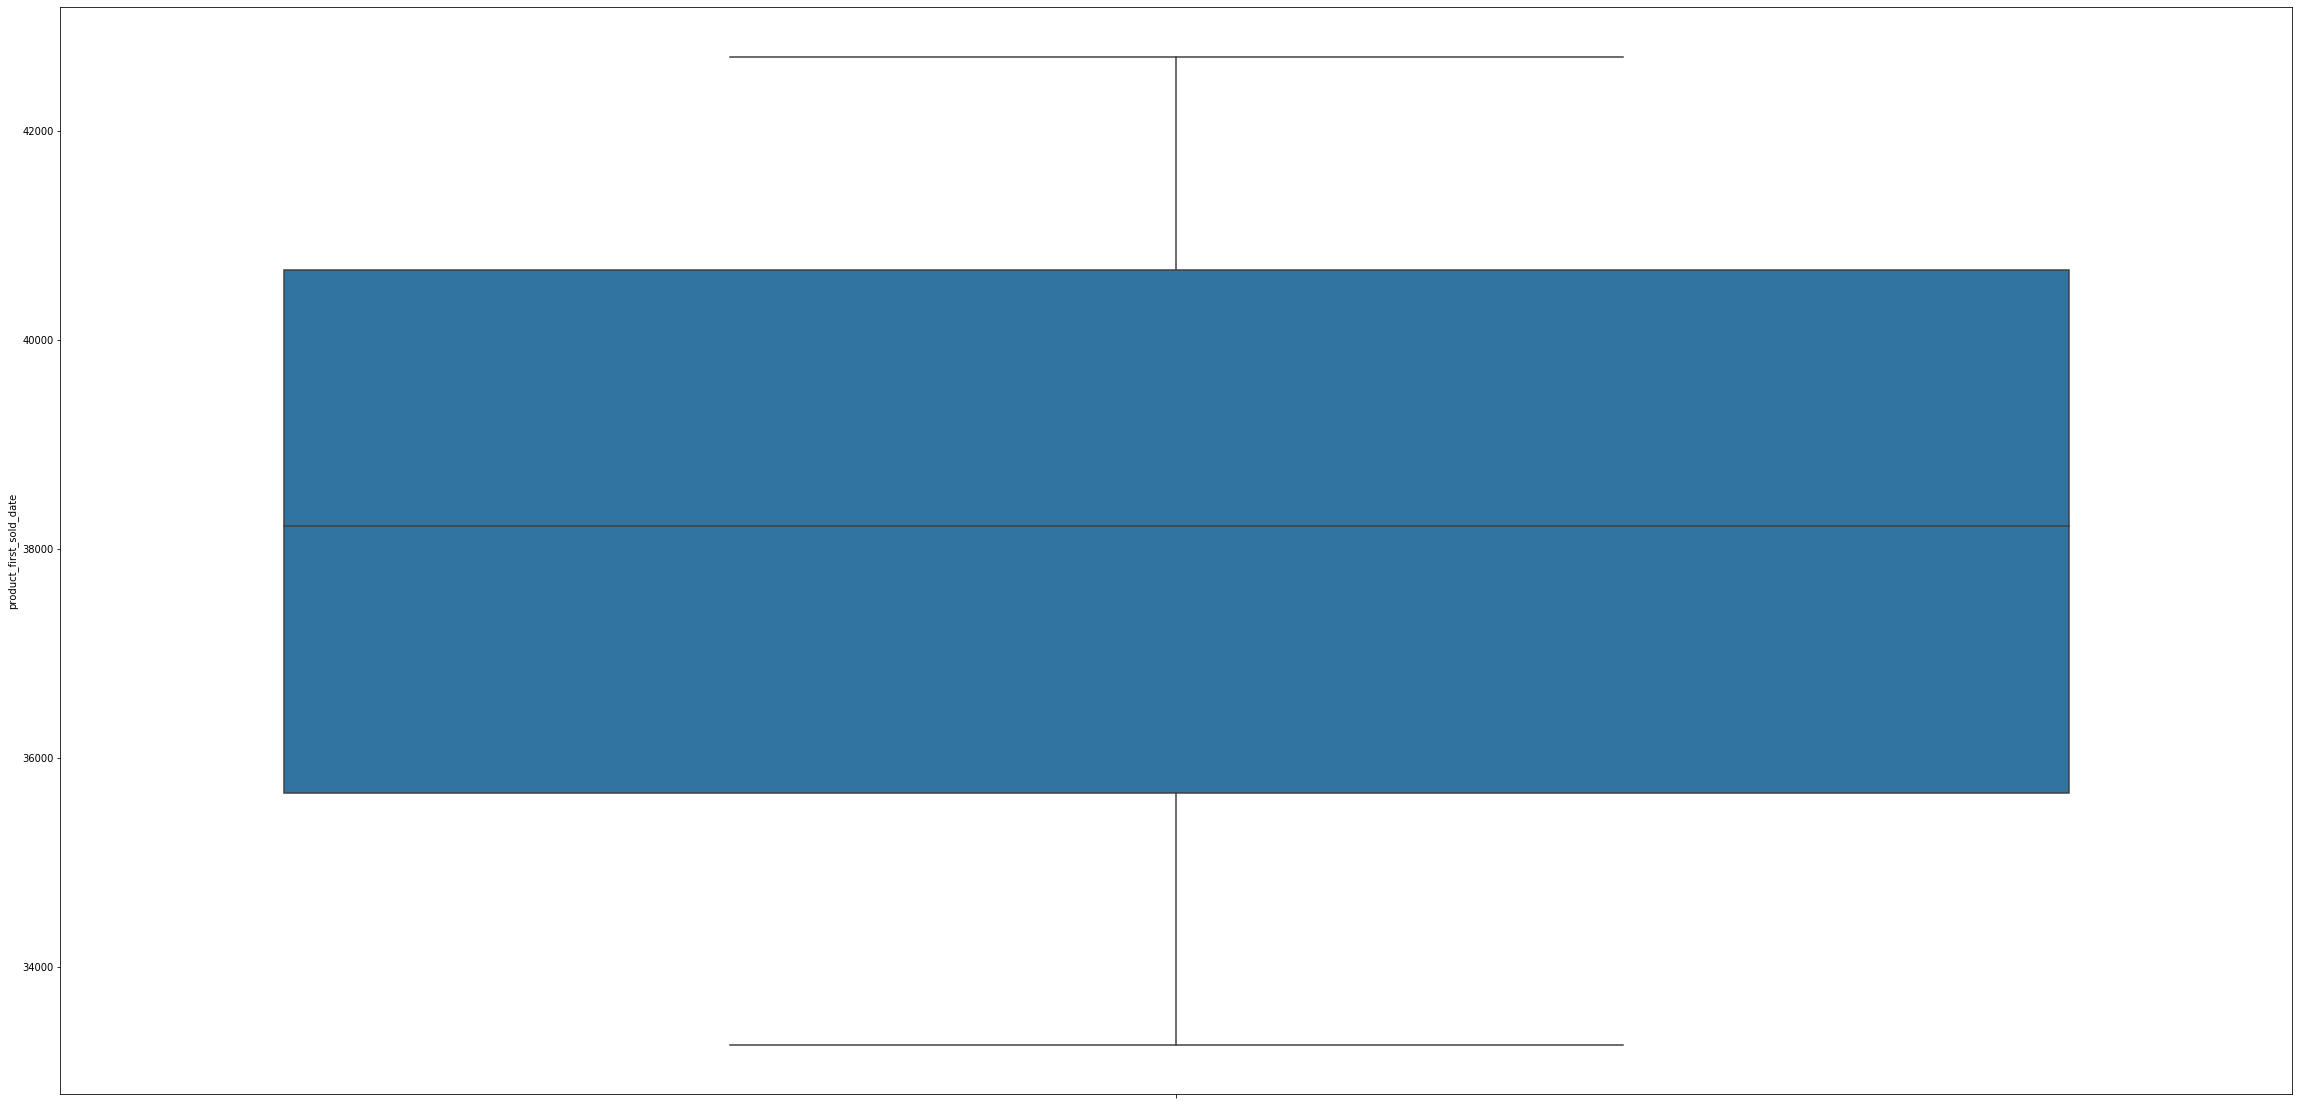

In [90]:
g_box(transactions, 'product_first_sold_date')

In [91]:
transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

### Out dataframe to excel file

In [93]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('KPMG_clean_data.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
custdemo.to_excel(writer, sheet_name='CustomerDemographic', index=False)
custadd.to_excel(writer, sheet_name='CustomerAddress', index=False)
transactions.to_excel(writer, sheet_name='Transactions', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()